In [50]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

path = str(Path(Path('thermo.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import scipy
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
import tools
from tools.cbook import pickle2Obj, interp_z, compute_thetae
from tools.FV3_tools import read_solo_fields
from tools.CM1_tools import read_cm1_fields

from pltbook import nice_clevels, nice_mxmnintvl, container, plot_contour_row

import matplotlib.colors as mcolors

cmap_data = [(1.0, 1.0, 1.0),
         (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
         (0.0, 1.0, 1.0),
         (0.0, 0.8784313797950745, 0.501960813999176),
         (0.0, 0.7529411911964417, 0.0),
         (0.501960813999176, 0.8784313797950745, 0.0),
         (1.0, 1.0, 0.0),
         (1.0, 0.6274510025978088, 0.0),
         (1.0, 0.0, 0.0),
         (1.0, 0.125490203499794, 0.501960813999176),
         (0.9411764740943909, 0.250980406999588, 1.0),
         (0.501960813999176, 0.125490203499794, 1.0),
         (0.250980406999588, 0.250980406999588, 1.0),
         (0.125490203499794, 0.125490203499794, 0.501960813999176),
         (0.125490203499794, 0.125490203499794, 0.125490203499794),
         (0.501960813999176, 0.501960813999176, 0.501960813999176),
         (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
         (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
         (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
         (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
         (0.4000000059604645, 0.20000000298023224, 0.0)]

# draw filled contours.
wclevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40, 50, 60, 70]

tclevs = list(-40.0 + 2*np.arange(41))

teclevs = list(300. + 5*np.arange(70))

bclevs = list(-0.4+ 0.02*np.arange(100))
pclevs = list(-15.0 + np.arange(31))

dclevs = list(-20.0 + np.arange(41))

zlevels = 10.0 + 100.*np.arange(200)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
paths = {}
paths['cm1_squall']  = '/work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13'
paths['solo_squall'] = '/work/wicker/climate_runs/FV3_Solo/bubble/euler/3km/QV13'

models = {}
for key in paths:
    print("Reading: ",key)
    if key[0:3] == 'cm1':
        models[key] = ( read_cm1_fields(paths[key], vars = ['w'], zinterp=zlevels, ret_beta=True, ret_ds=False) )
    if key[0:4] == 'solo':
        models[key] = ( read_solo_fields(paths[key], vars = ['w'], zinterp=zlevels, ret_beta=True, ret_ds=False) )

Reading:  cm1_squall
------------------------------------------------------------------------------------------------------------------------
 Now reading... /work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13/cm1out.nc
Reading buoyancy acceleration file w_b_accel.nc from /work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13
 Completed reading in:  /work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13/cm1out.nc

 Interpolating fields to single column z-grid: /work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13/cm1out.nc 

 Finished interp fields to single column z-grid:  /work/wicker/climate_runs/cm1r20.3/run/bubble/3km/QV13 

Reading:  solo_squall
------------------------------------------------------------------------------------------------------------------------
 Now reading... /work/wicker/climate_runs/FV3_Solo/bubble/euler/3km/QV13/atmos_hifreq.nc
Reading buoyancy acceleration file w_b_accel.nc from /work/wicker/climate_runs/FV3_Solo/bubble/euler/3km/QV13
 Completed readi

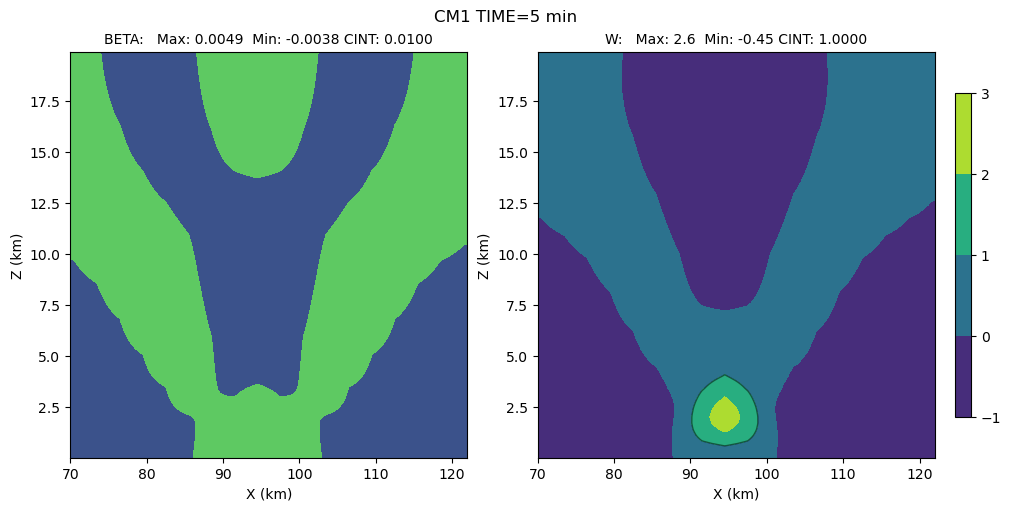

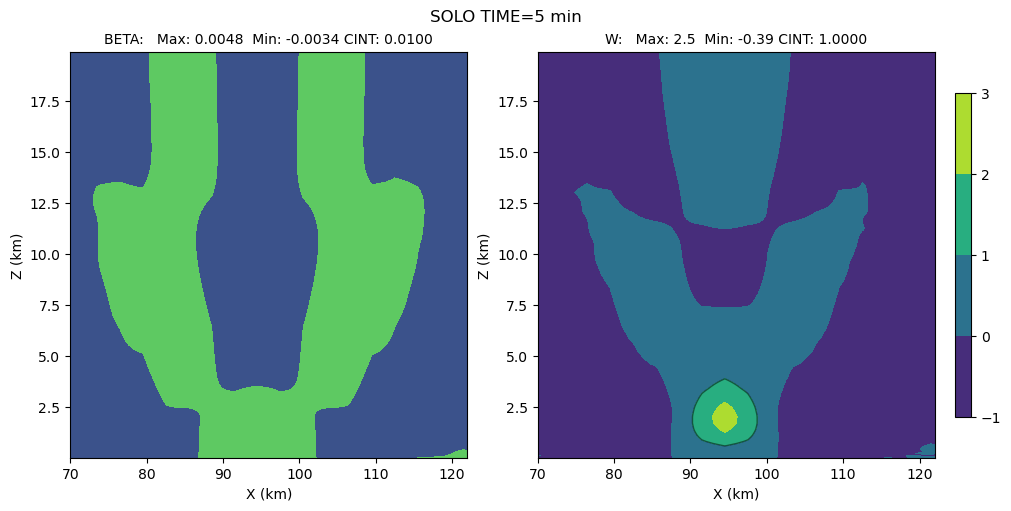

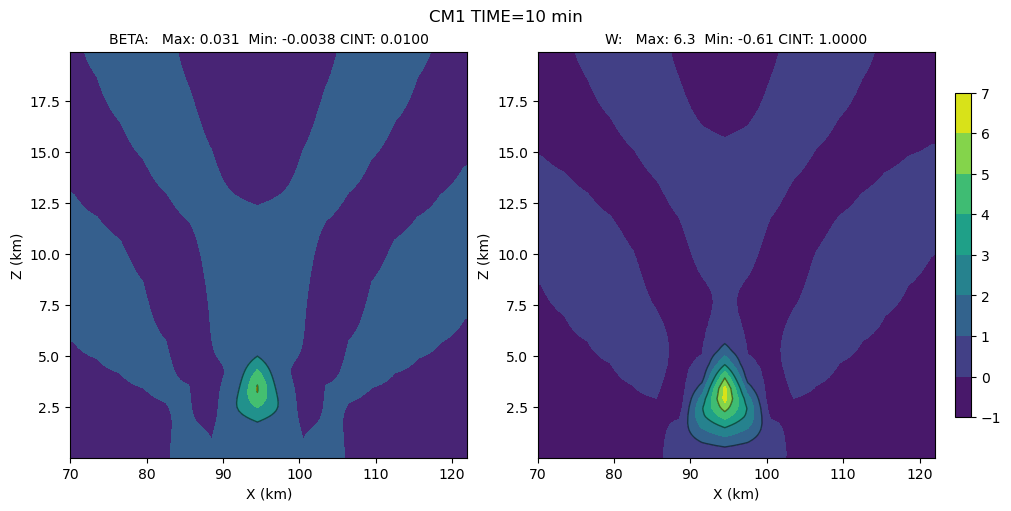

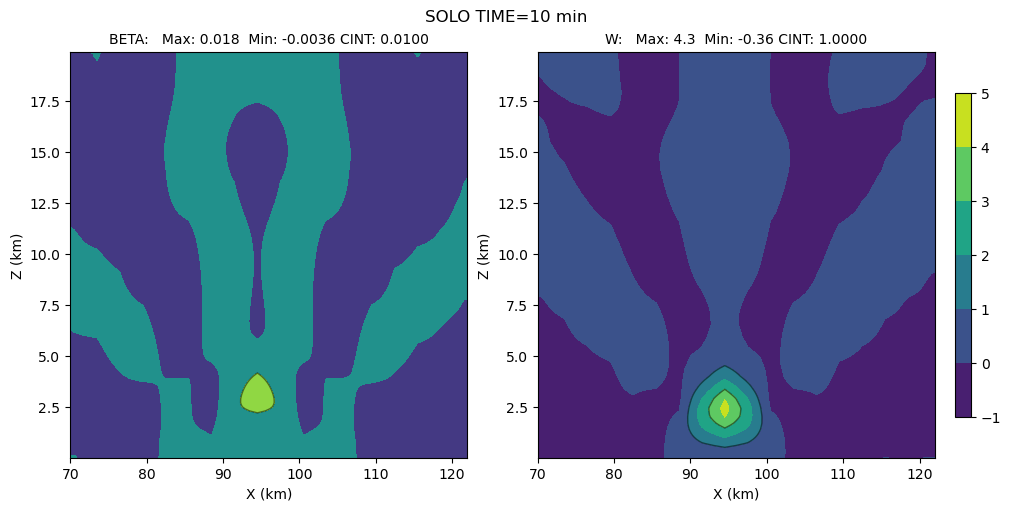

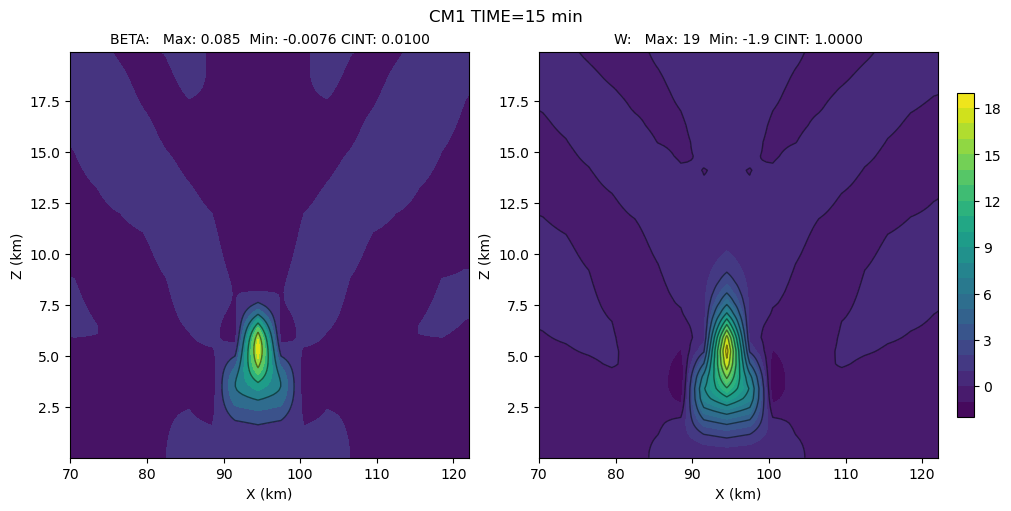

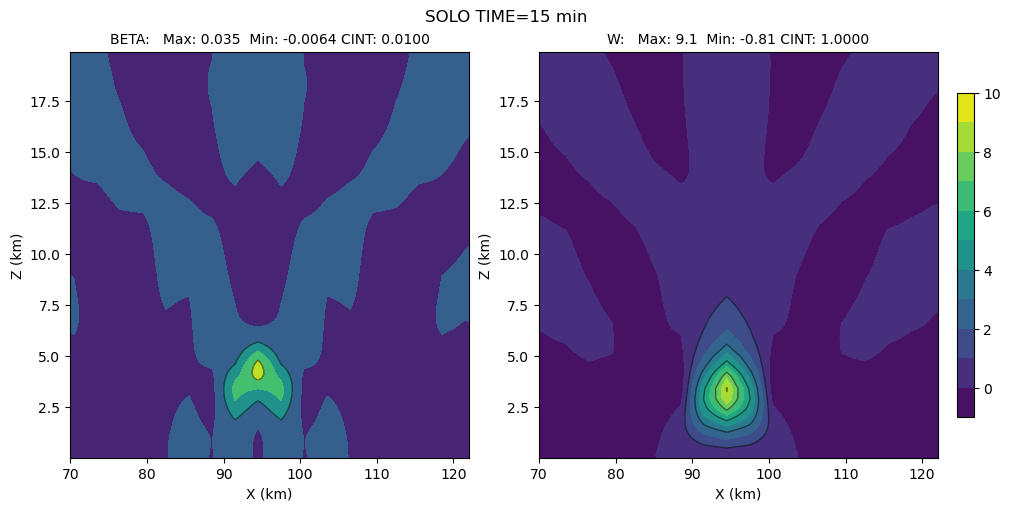

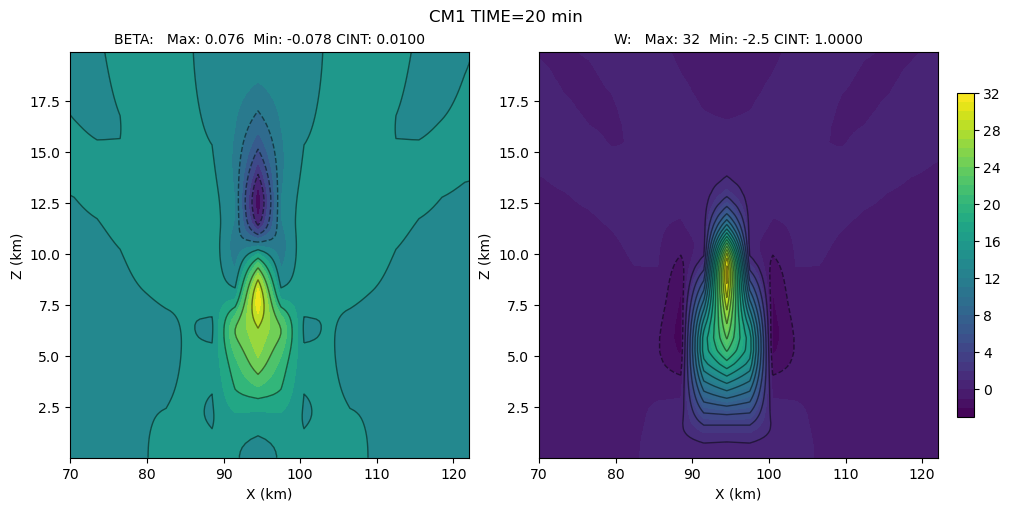

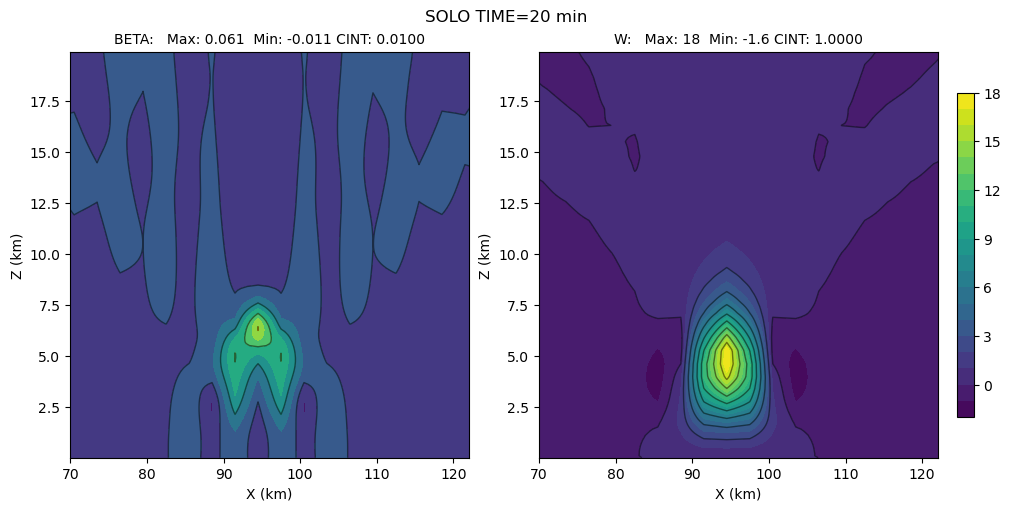

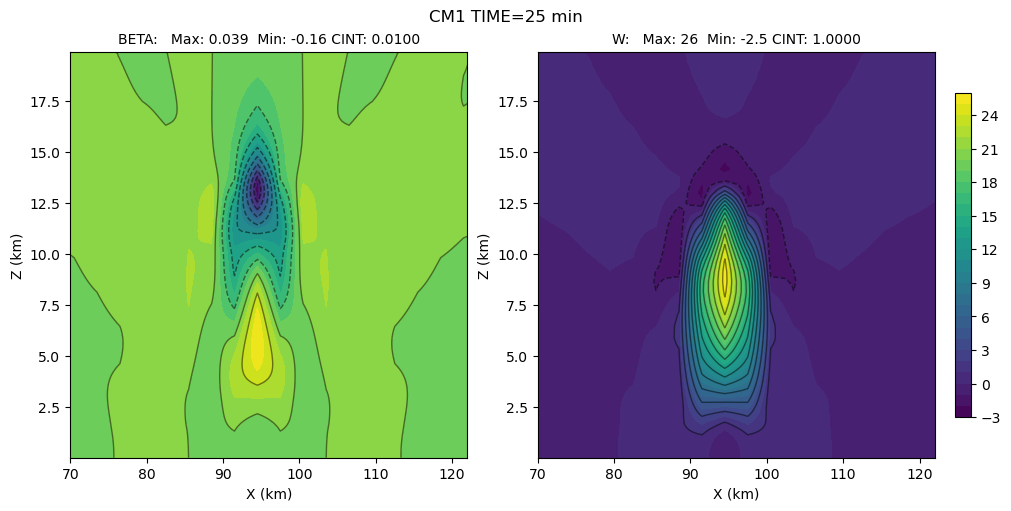

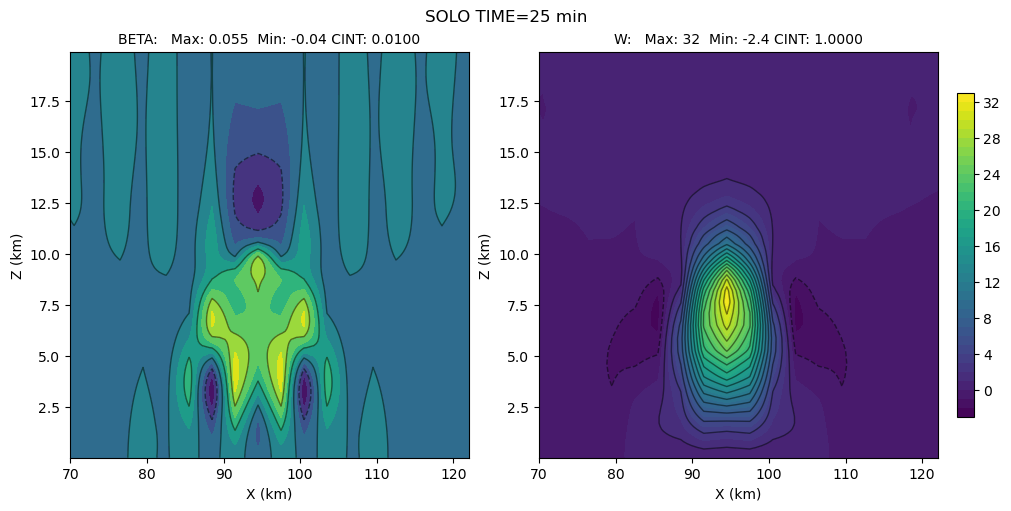

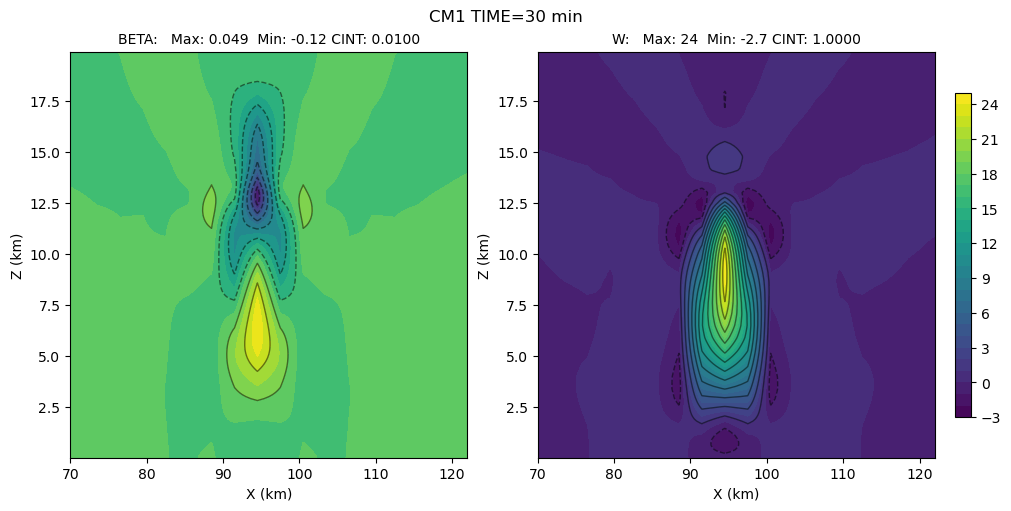

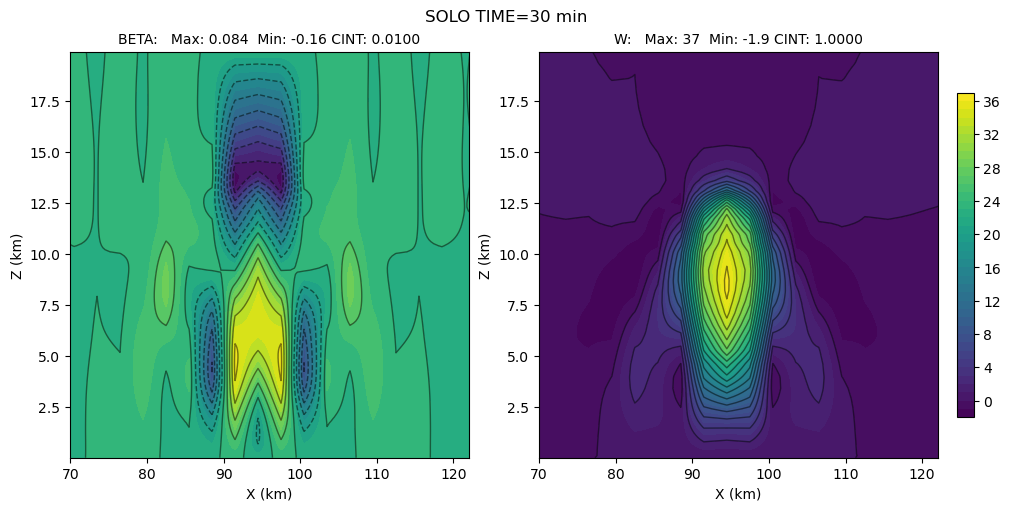

In [59]:
solo = models['solo_squall']
cm1  = models['cm1_squall']

time1 = solo['min'][:]
time2 = cm1['min'][:]
xc    = cm1['xc']/1000.
yc    = cm1['yc']/1000.

ny2 = (xc.shape[0]//2) - 1

clevs = list(-3. + 0.25*np.arange(25))

time1 = solo['min'][:]
time2 = cm1['min'][:]
xc    = cm1['xc']/1000.
yc    = cm1['yc']/1000.

ny2 = (xc.shape[0]//2) - 1

for tlevel in [5, 10, 15, 20, 25, 30]:

    fields = []
    fields.append(container( cm1['beta'][tlevel,  :,:,ny2], yc, zlevels/1000. ))
    fields.append(container( cm1['w'][tlevel,  :,:,ny2], yc, zlevels/1000. ))
    plot_contour_row(fields, ptitle=['BETA', 'W'], suptitle=f"CM1 TIME={tlevel} min", xlabel='X (km)', ylabel='Z (km)', xlim=[70.,122.],  input_cint=[0.01,1.0]);

    fields = []
    fields.append(container(solo['beta'][tlevel-1,:,:,ny2], yc, zlevels/1000. ))
    fields.append(container(solo['w'][tlevel-1,:,:,ny2], yc, zlevels/1000. ))
    
    plot_contour_row(fields, ptitle=['BETA', 'W'], suptitle=f"SOLO TIME={tlevel} min", xlabel='X (km)', ylabel='Z (km)', xlim=[70.,122.],  input_cint=[0.01,1.0]);

#plt.savefig(f"XZ_3km.png")

    # klevel = 10
    
    # fields = []
    # fields.append(container( cm1['beta'][tlevel,   klevel, :, :], yc, xc))
    # fields.append(container(solo['beta'][tlevel-1, klevel, :, :], yc, xc))
    # plot_contour_row(fields, ptitle=['CM1', 'SOLO'], suptitle=f"BUBBLE TIME={tlevel} min", xlabel='X (km)', ylabel='Y (km)', cmap=plt.cm.rainbow, cint=0.01);

# plt.savefig(f"Initial_Condition_XY_K10_3km.png")

# fields = []
# fields.append(container(cm1['pert_th'][0,:,96:160,23]-solo['theta_IC'][:,96:160,23], xc[96:160], zlevels/1000.))
# plot_contour_row(fields, ptitle=['DIFF'], title='BUBBLE', xlabel='X (km)', ylabel='Z (km)',  cmap=plt.cm.rainbow, cint=0.001)


# fields = []
# fields.append(container(cm1['pert_th'][0,klevel,96:160,0:64]-solo['theta_IC'][klevel,96:160,0:64], xc[96:160], yc[0:64]))
# plot_contour_row(fields, ptitle=['DIFF'], title='BUBBLE', xlabel='X (km)', ylabel='Y (km)', cmap=plt.cm.rainbow, cint=0.001);

# print((cm1['pert_th'][0,klevel,96:160,0:64]-solo['theta_IC'][klevel,96:160,0:64]).min())

In [14]:
paths = {}
paths['cm1_3km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noHDD_C2000_00'
#paths['cm1_2km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_test_hdd125_C2000_00'
#paths['cm1_1km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_1km_dt01_hdd125_C2000_00'

cm1 = []

for key in paths:
    
    beta_file = os.path.join(beta_dir, "%s_%s_beta_out.nc" % ('cm1', os.path.basename(paths[key]) ))
    print("Reading: ",key, beta_file)
    cm1.append( read_cm1_fields(paths[key], vars = ['w','den','buoy'], ret_beta=beta_file, zinterp=zlevels) )
    paths = {}
    
# paths['solo1'] = '/work/wicker/Odin_scr/solo/bubble_3km_dt20_hdd125_C2000_00'
# paths['solo2'] = '/work/wicker/Odin_scr/solo/bubble_3km_makenh_hdd125_C2000_00'
# paths['solo3'] = '/work/wicker/Odin_scr/solo/bubble_1km_dt06_hdd125_C2000_00'
paths['solo1'] = '/work/wicker/Odin_scr/solo/bubble_3km_C2000_00'

# solo = []
# for key in paths:
#     beta_file = os.path.join(beta_dir, "%s_%s_beta_out.nc" % ('solo', os.path.basename(paths[key]) ))
#     print("Reading: ",key, beta_file)
#     solo.append( read_solo_fields(paths[key], vars = ['w','den','buoy'], ret_beta=beta_file, zinterp=zlevels) )



Reading:  cm1_3km_hdd125 /work/wicker/CAM_analysis_tools/ideal_cases/beta_diagnostic/cm1_bubble_3km_noHDD_C2000_00_beta_out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noHDD_C2000_00/cm1out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noHDD_C2000_00/cm1out.nc 

 Reading BETA from /work/wicker/CAM_analysis_tools/ideal_cases/beta_diagnostic/cm1_bubble_3km_noHDD_C2000_00_beta_out.nc


FileNotFoundError: [Errno 2] No such file or directory: '/work/wicker/CAM_analysis_tools/ideal_cases/beta_diagnostic/cm1_bubble_3km_noHDD_C2000_00_beta_out.nc'

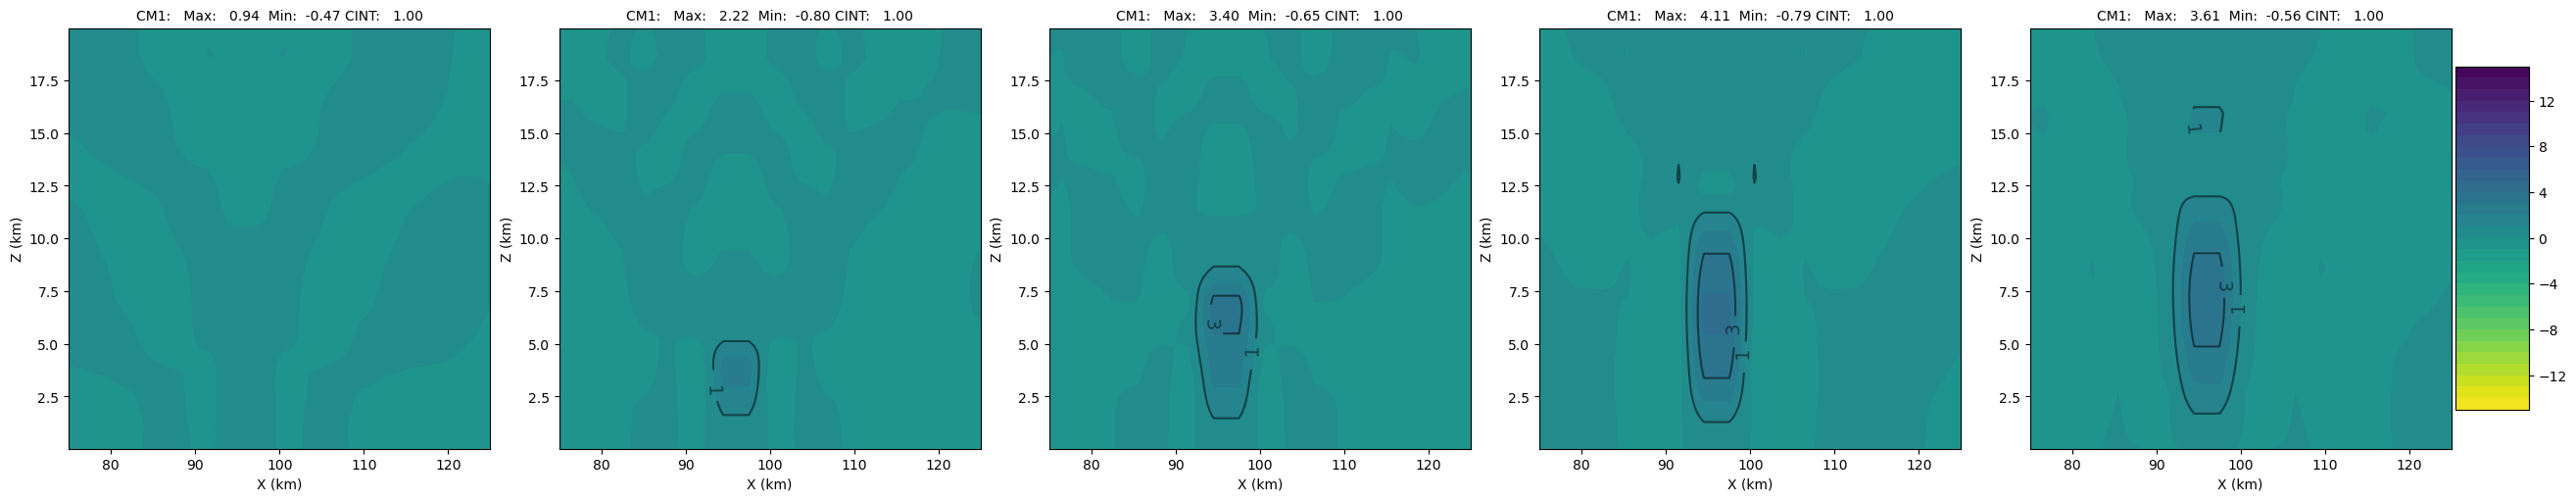

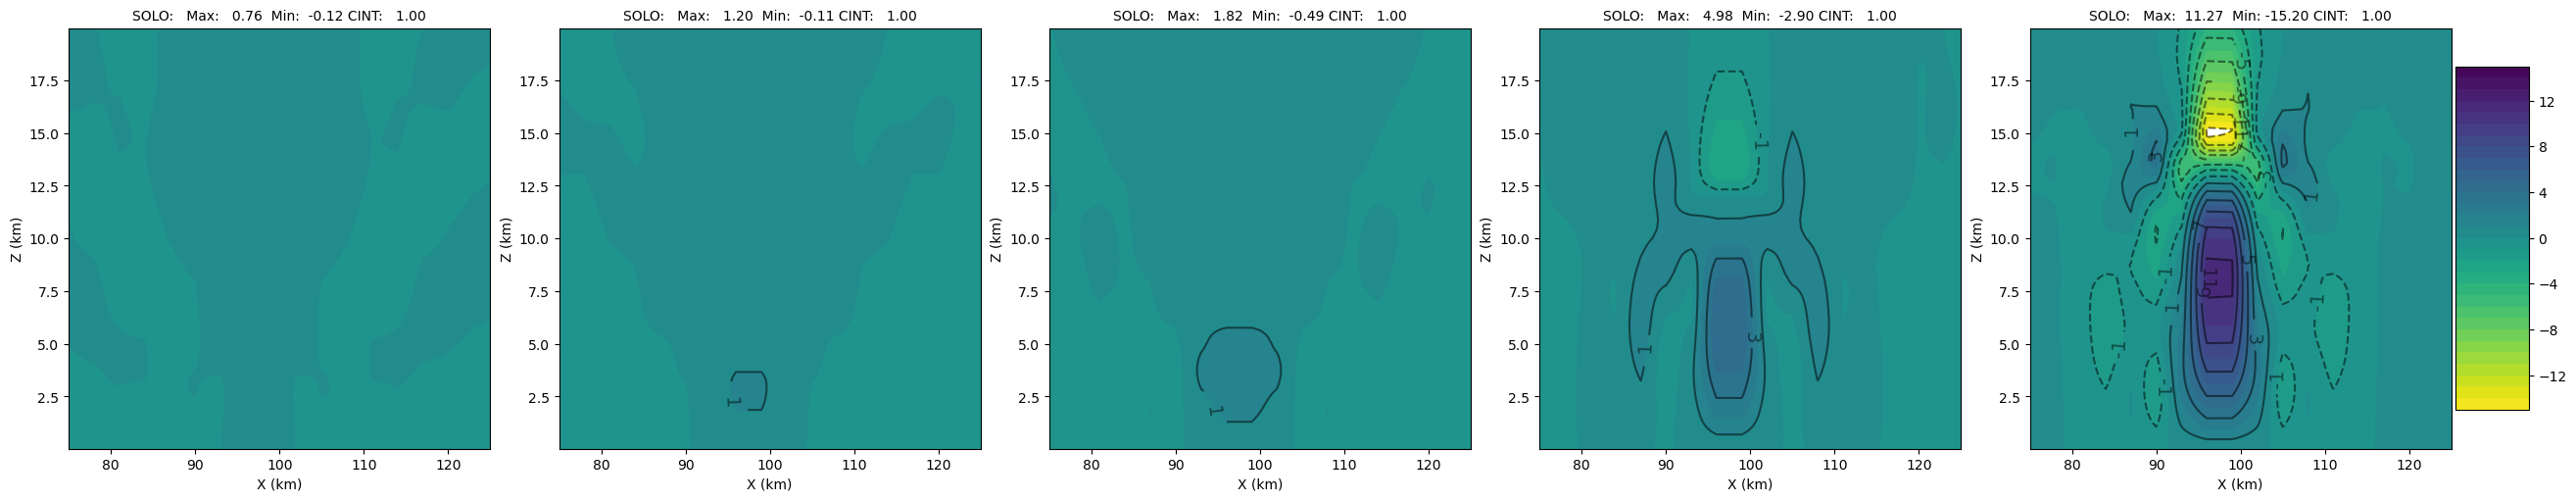

In [3]:
t0 = [10, 15, 20, 30, 40]

cm1_list  = []
solo_list = []

for tloc in t0:

    jloc = 31

    cm1_list.append( container( cm1[0]['xc'][:]*.001,  zlevels*.001,  50*cm1[0]['beta'][tloc+1,:,jloc, :]) )
    solo_list.append( container(solo[0]['xc'][:]*.001, zlevels*.001,  50*solo[0]['beta'][tloc,:,jloc, :]) )

plot_contour_row(cm1_list, levels=pclevs, title='CM1', xlabel='X (km)', ylabel='Z (km)', range=[75.,125.], cmap=plt.cm.viridis_r);
plot_contour_row(solo_list, levels=pclevs, title='SOLO', xlabel='X (km)', ylabel='Z (km)', range=[75.,125.],cmap=plt.cm.viridis_r);




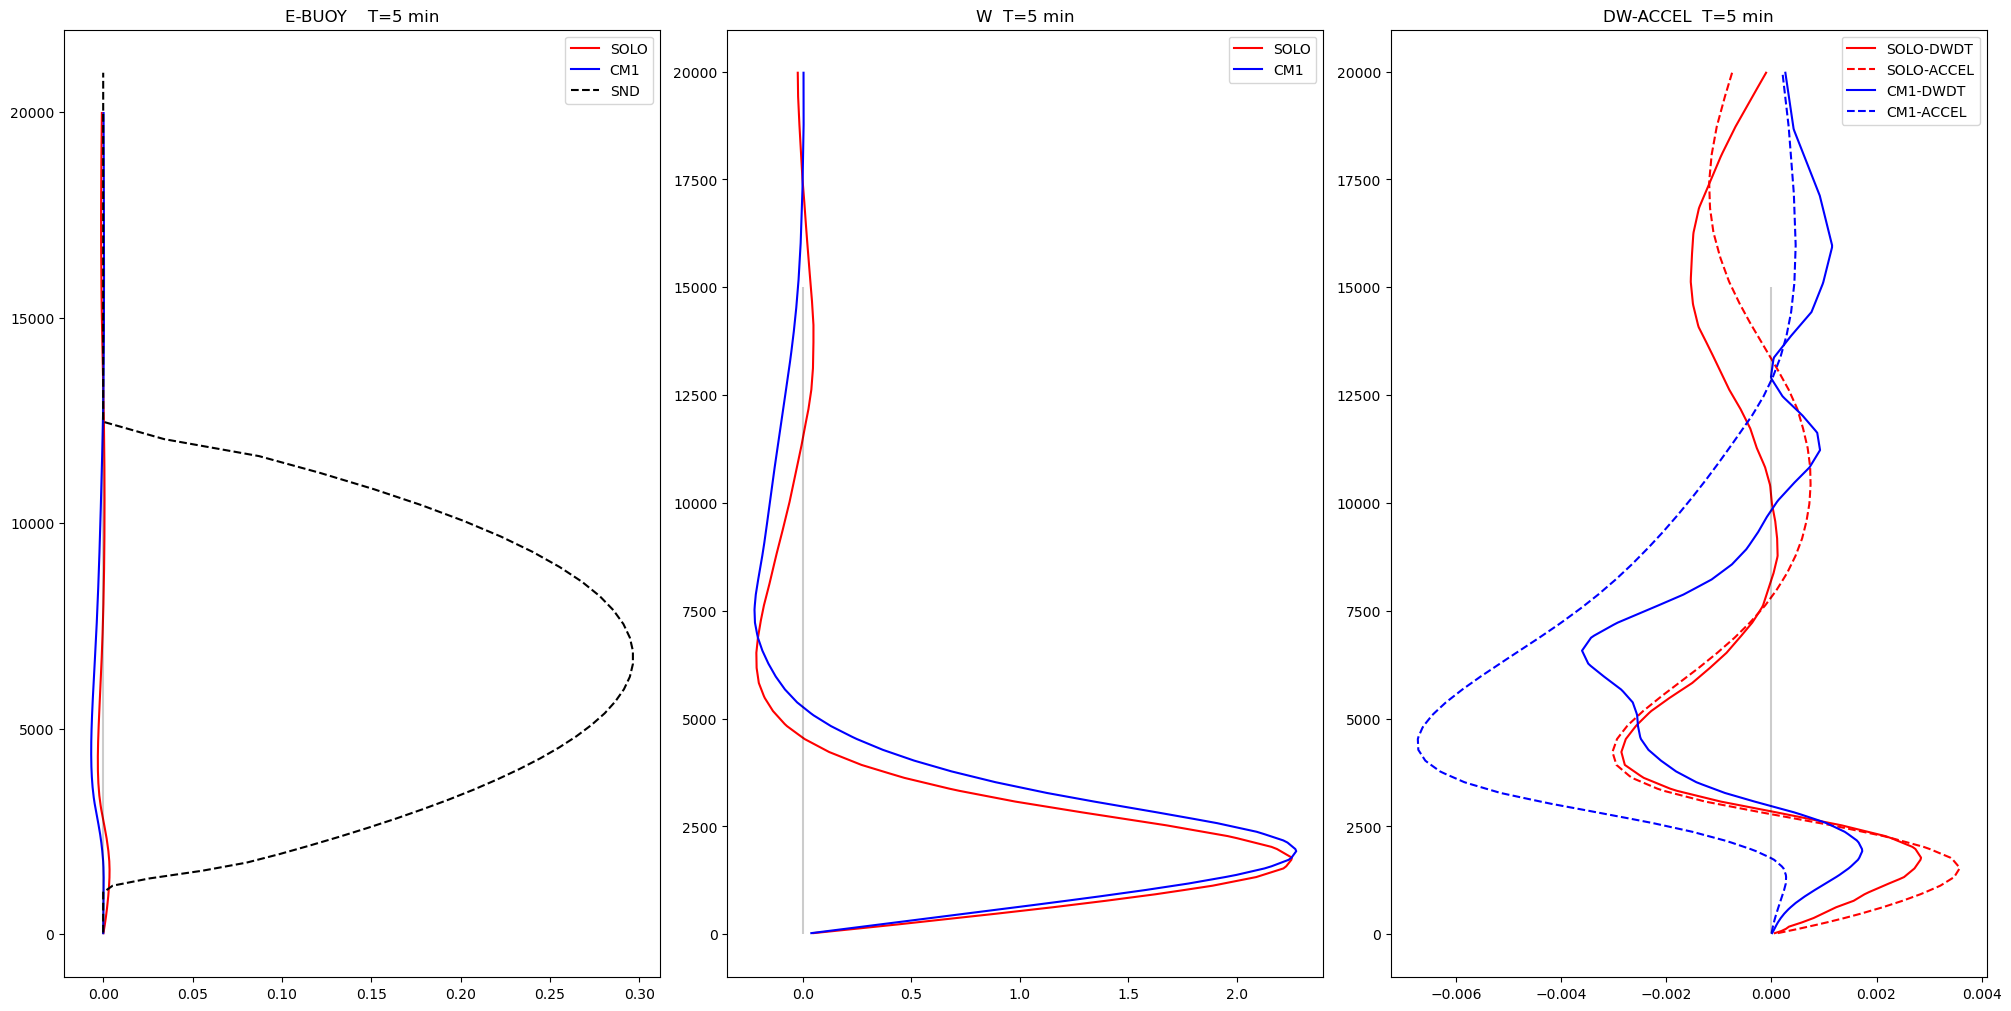

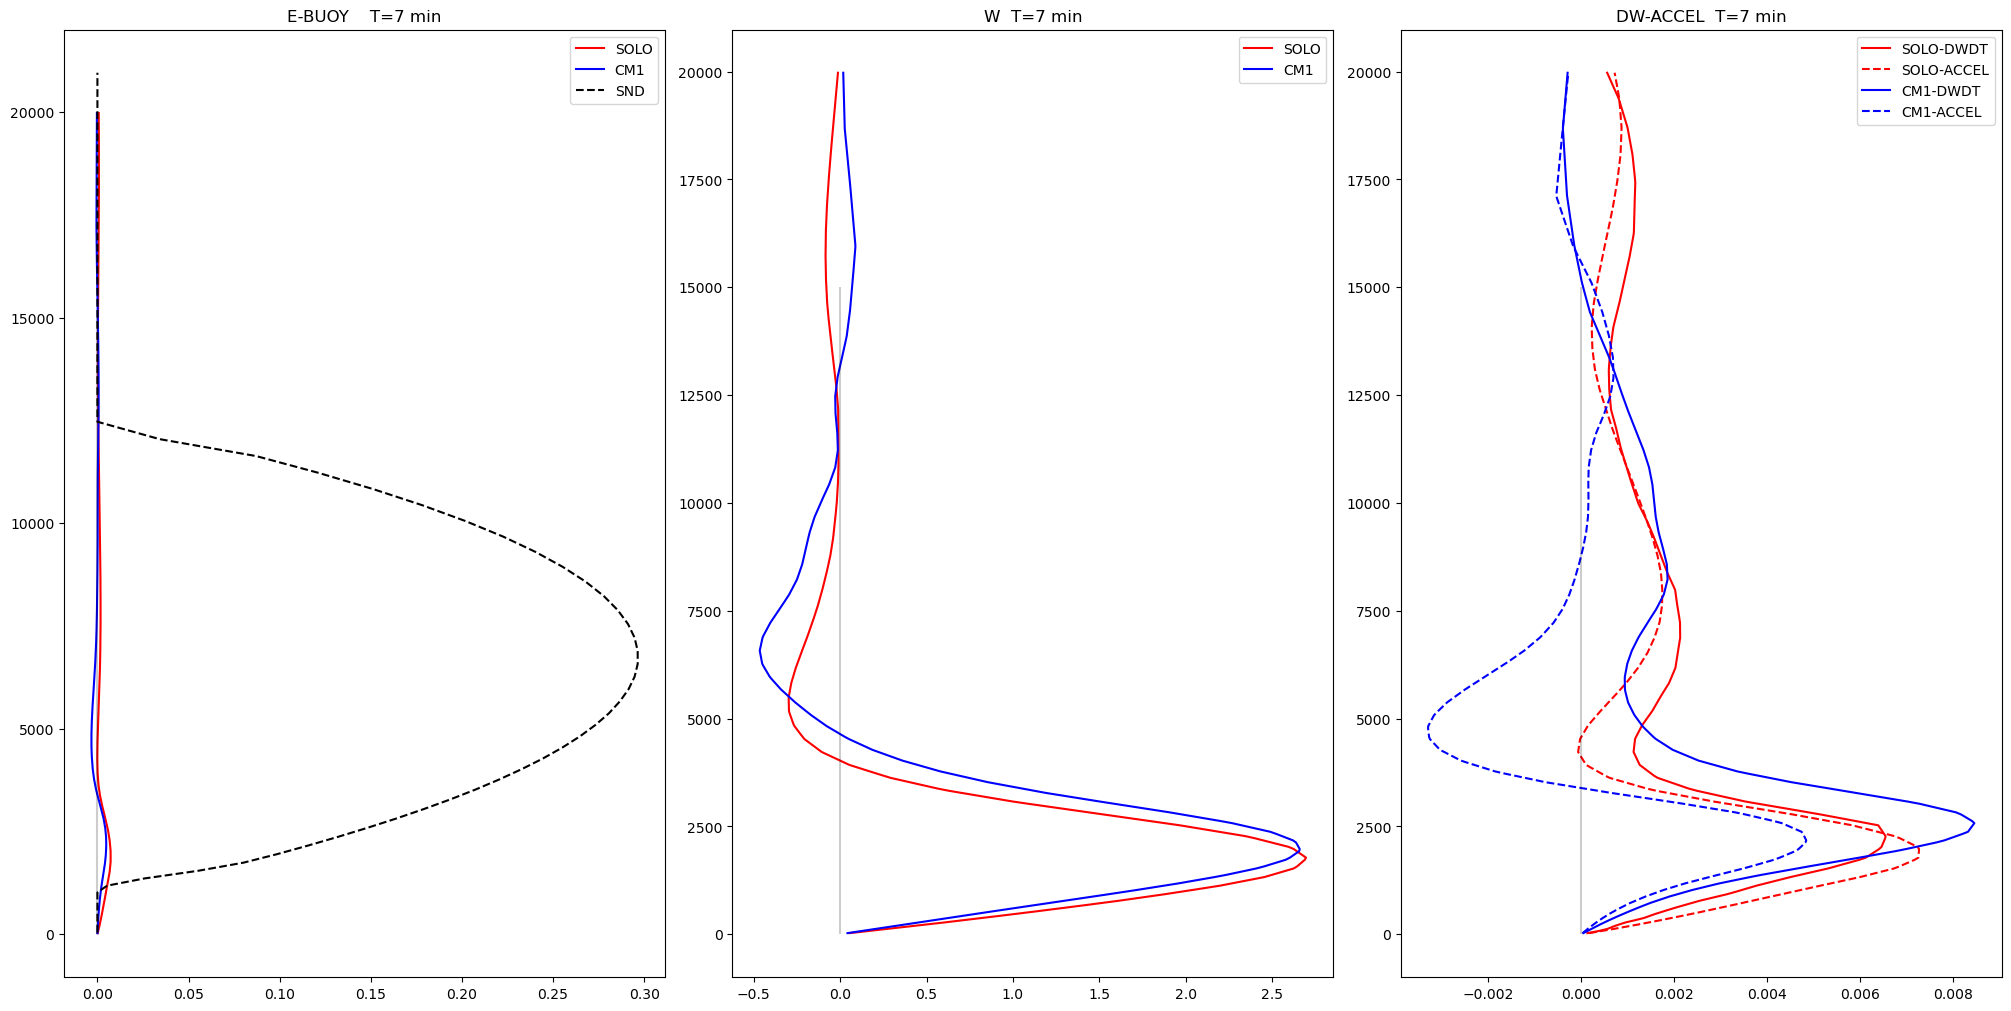

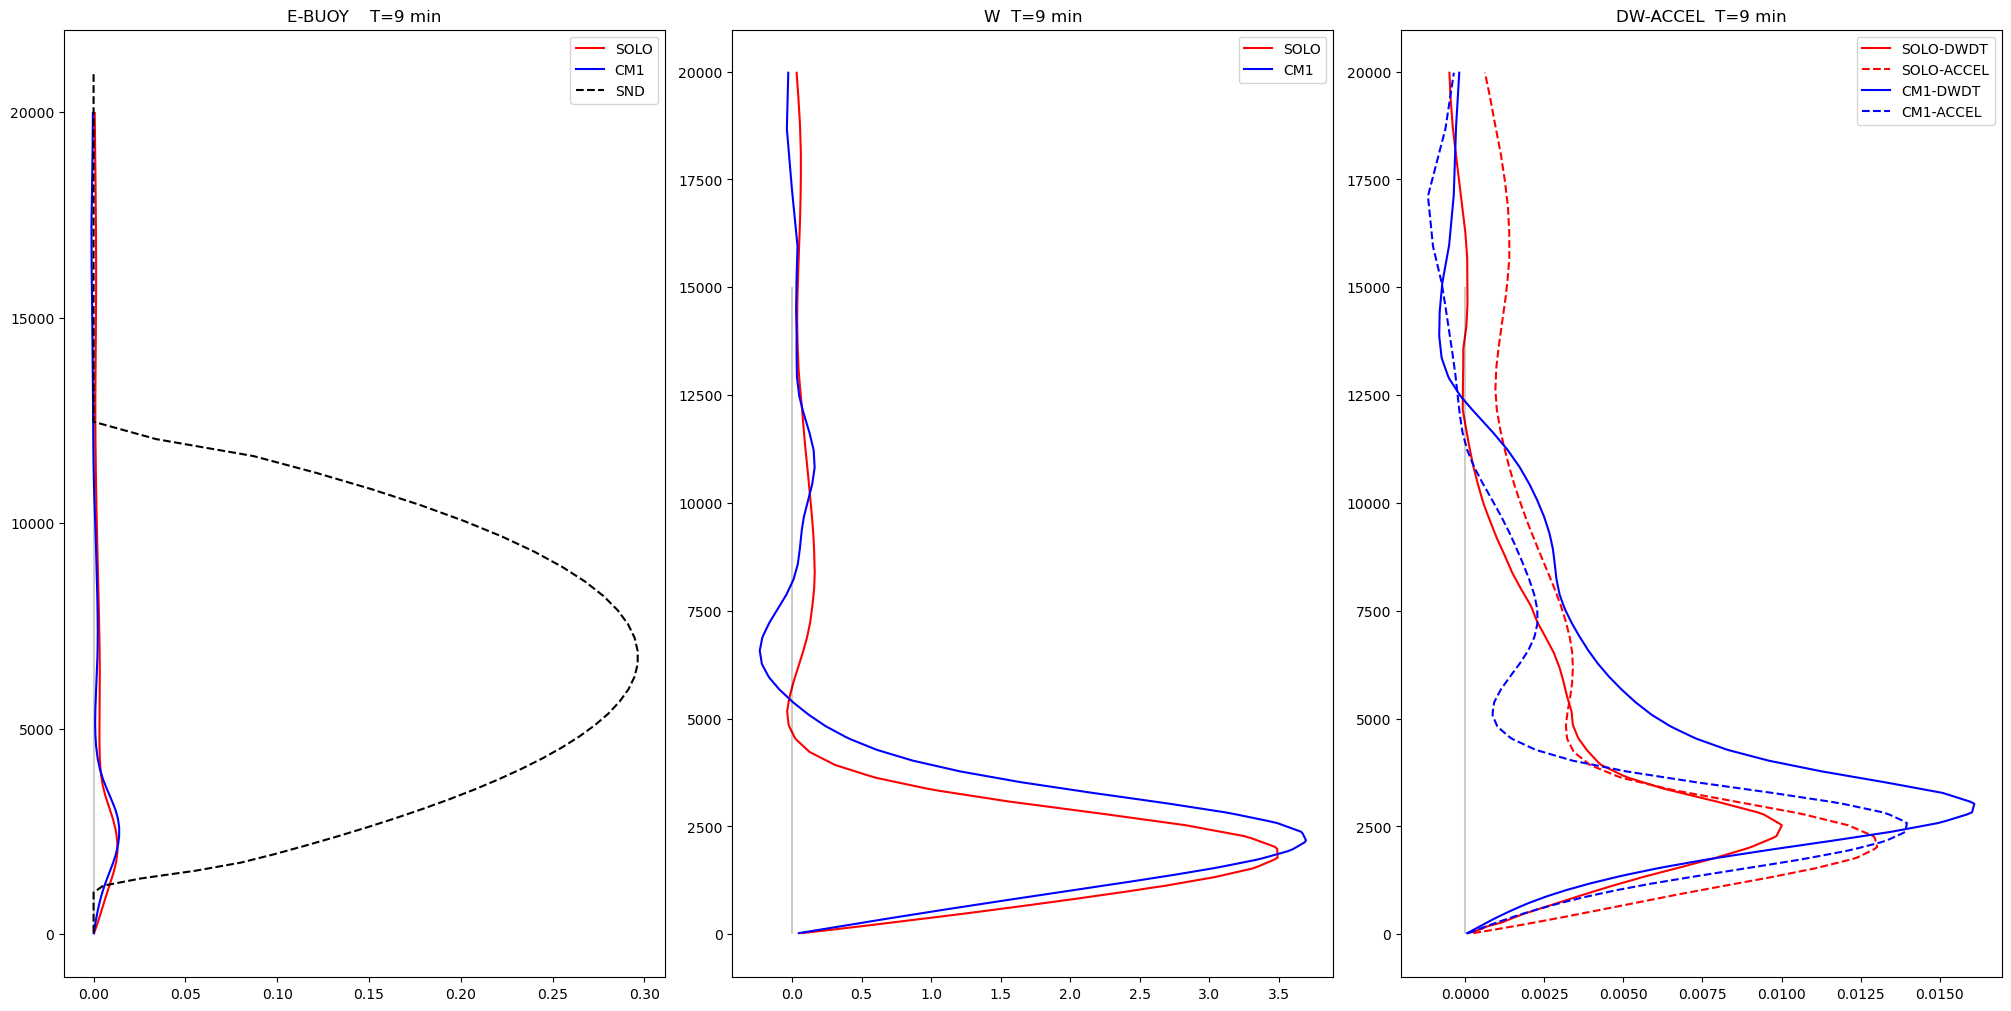

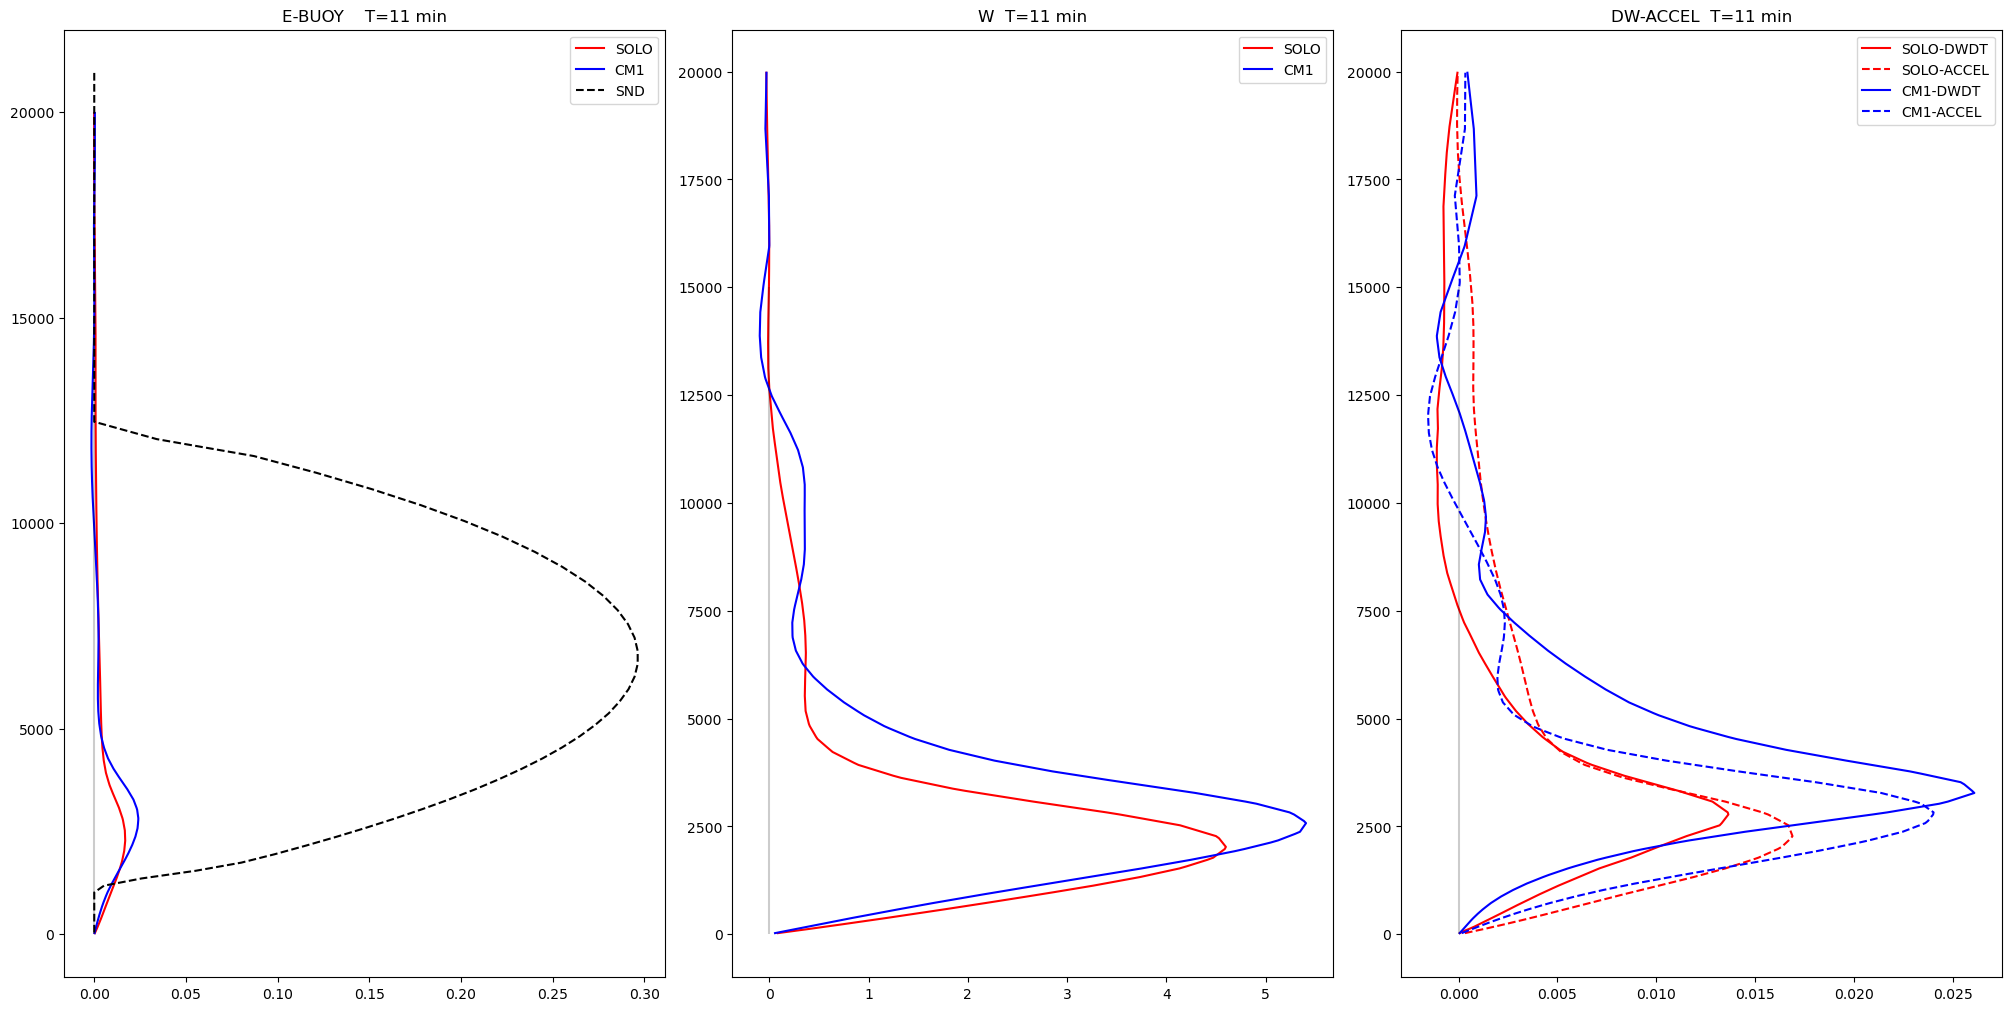

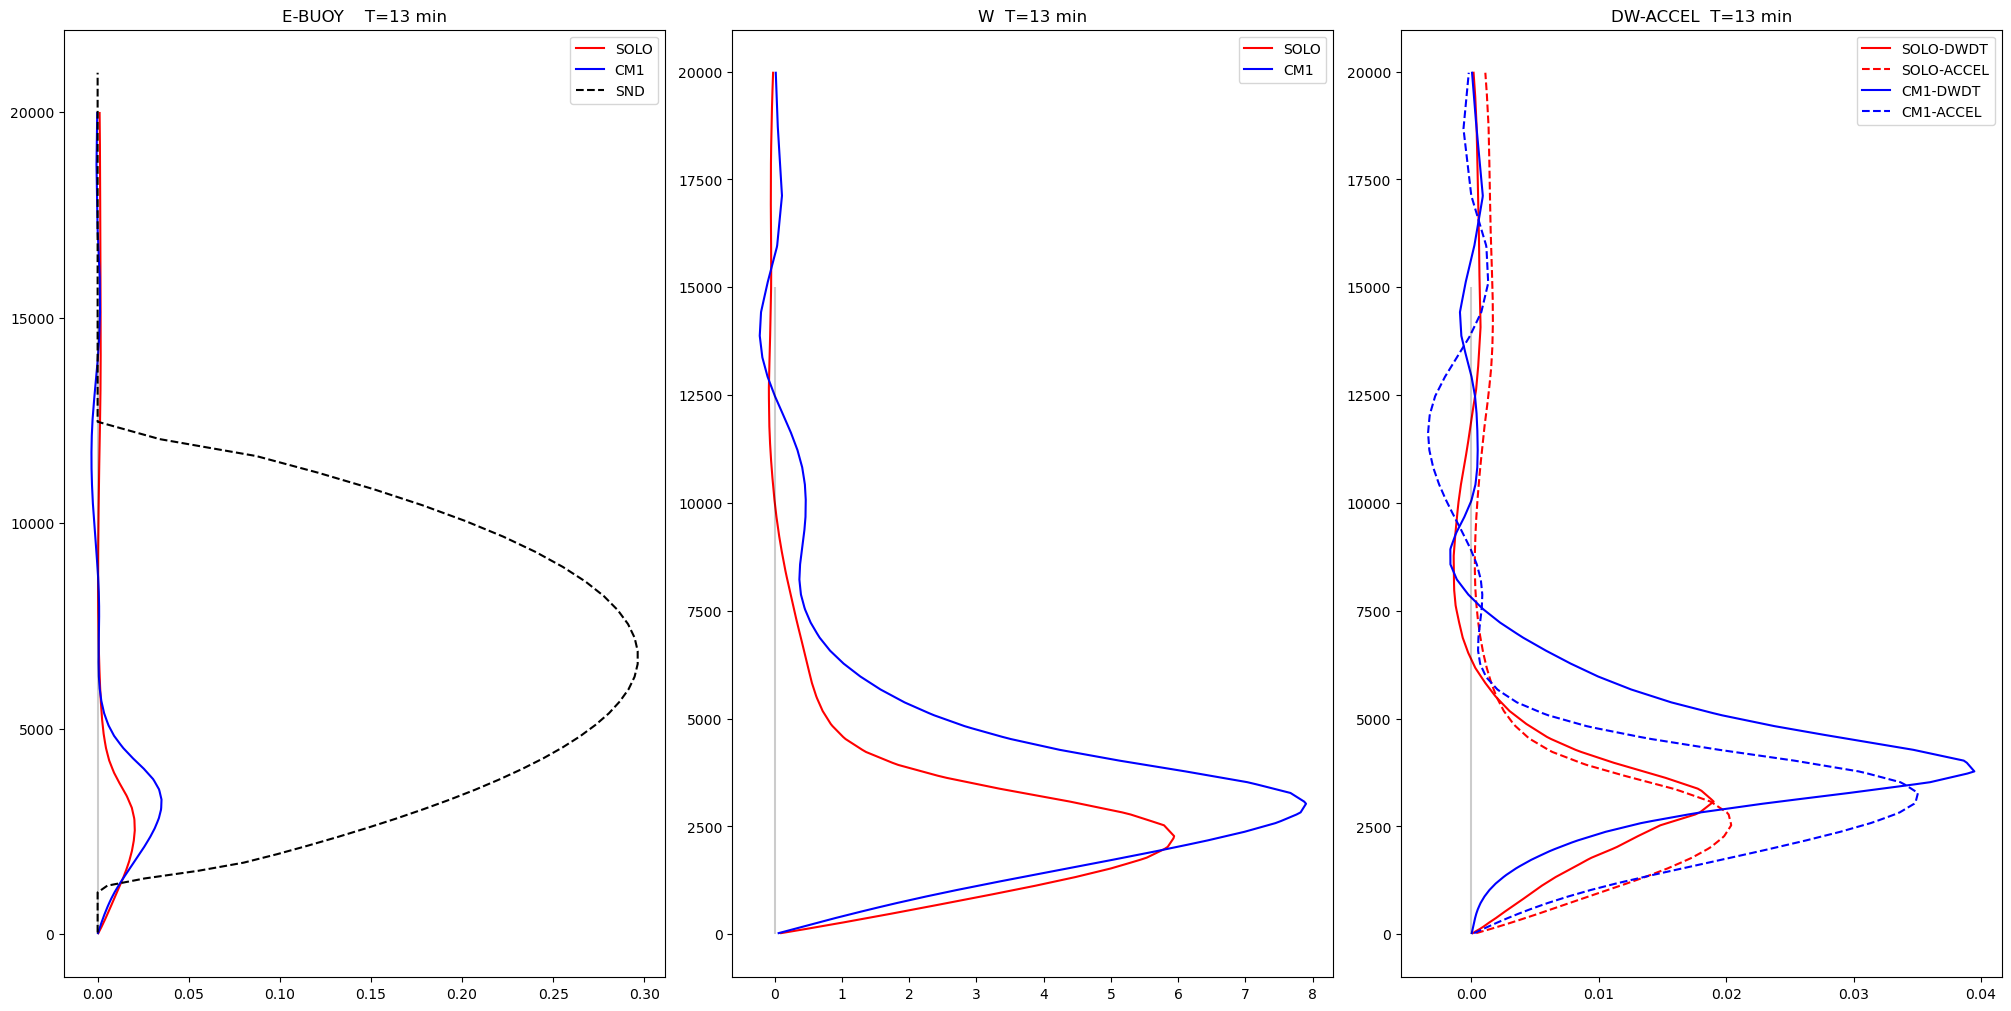

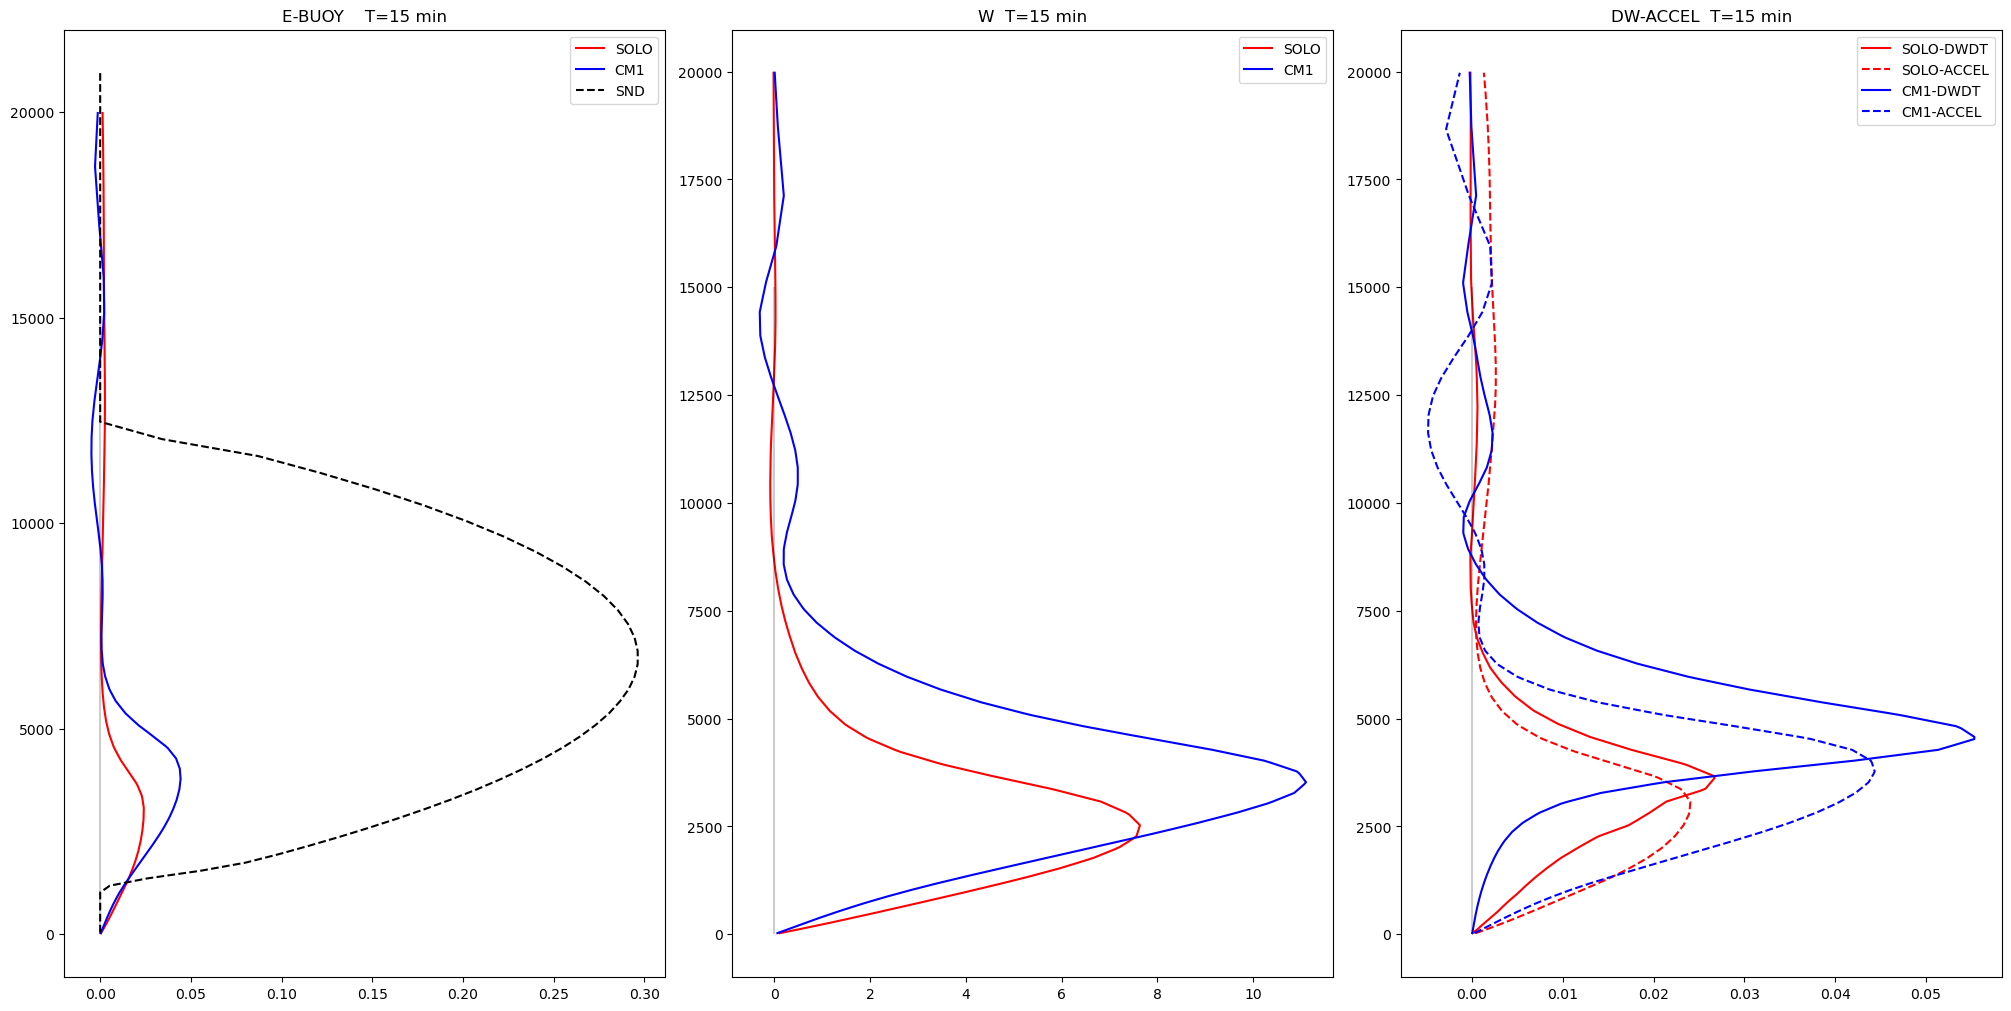

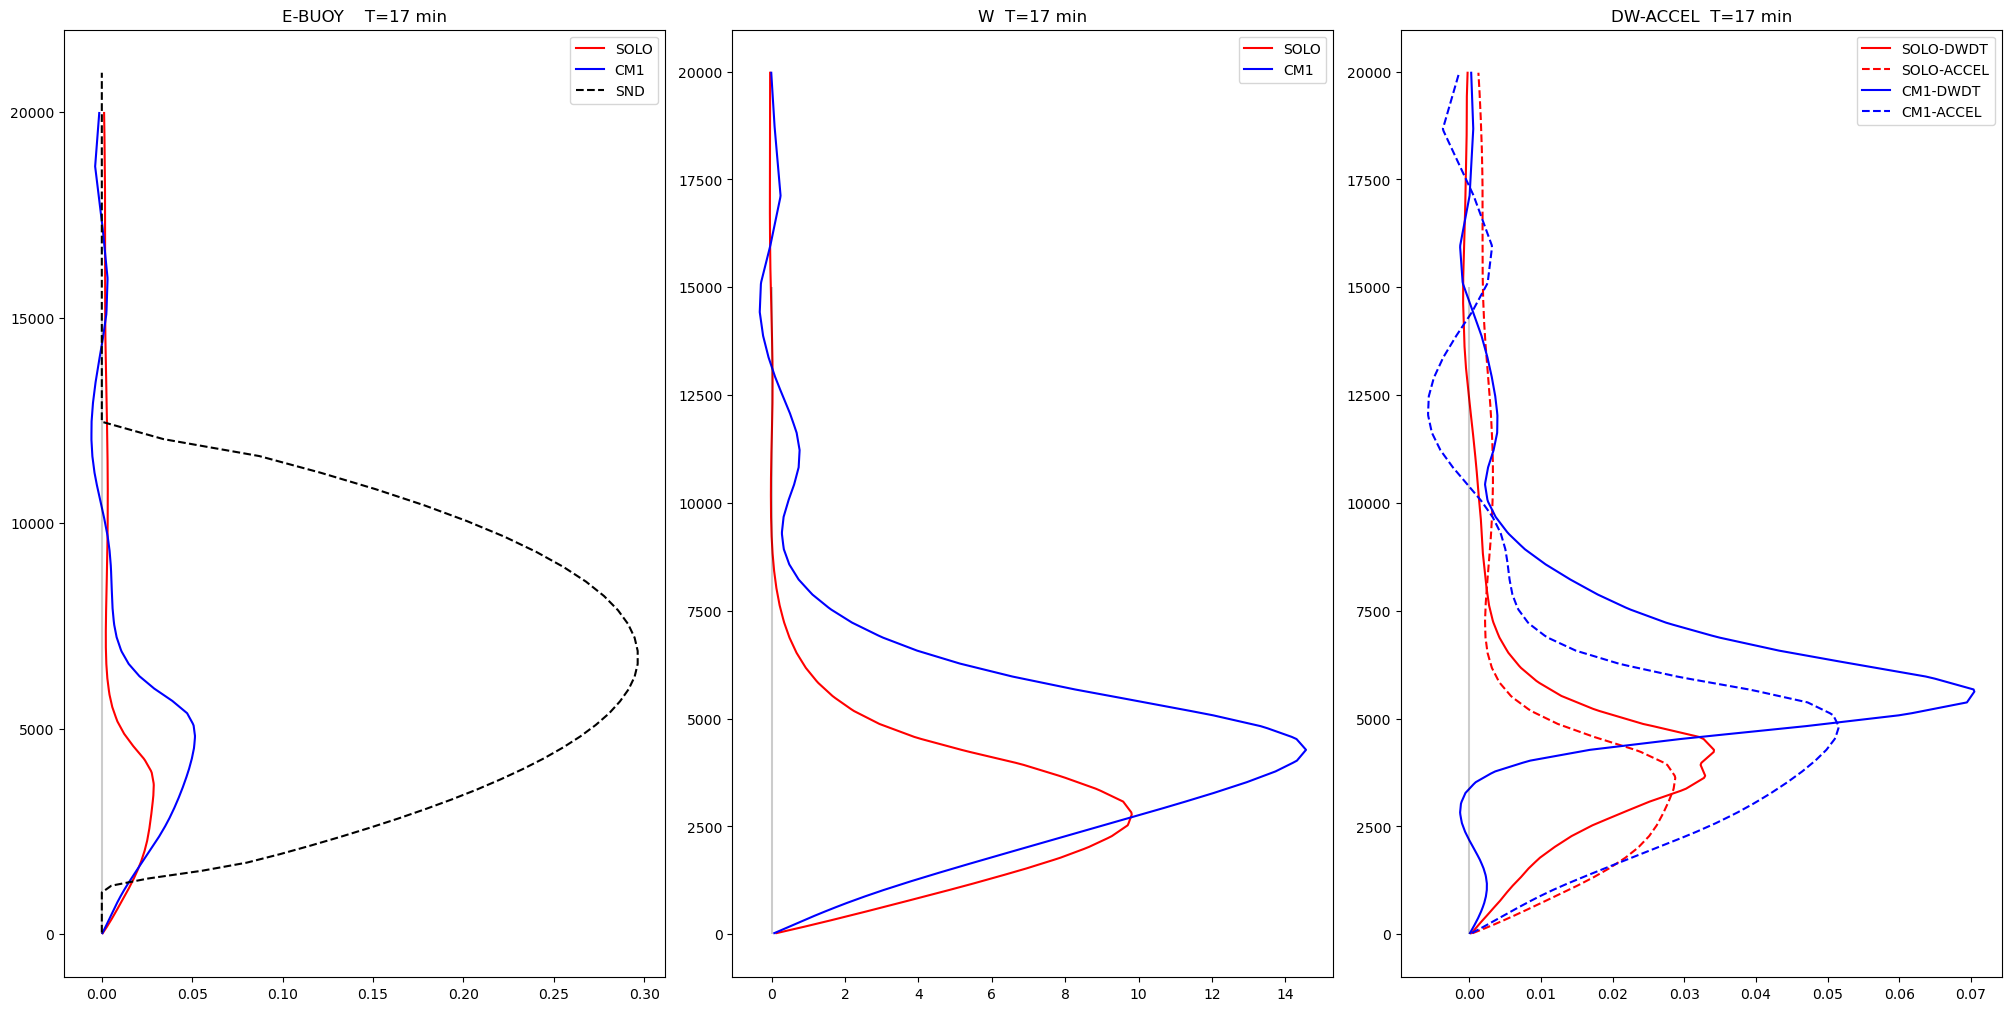

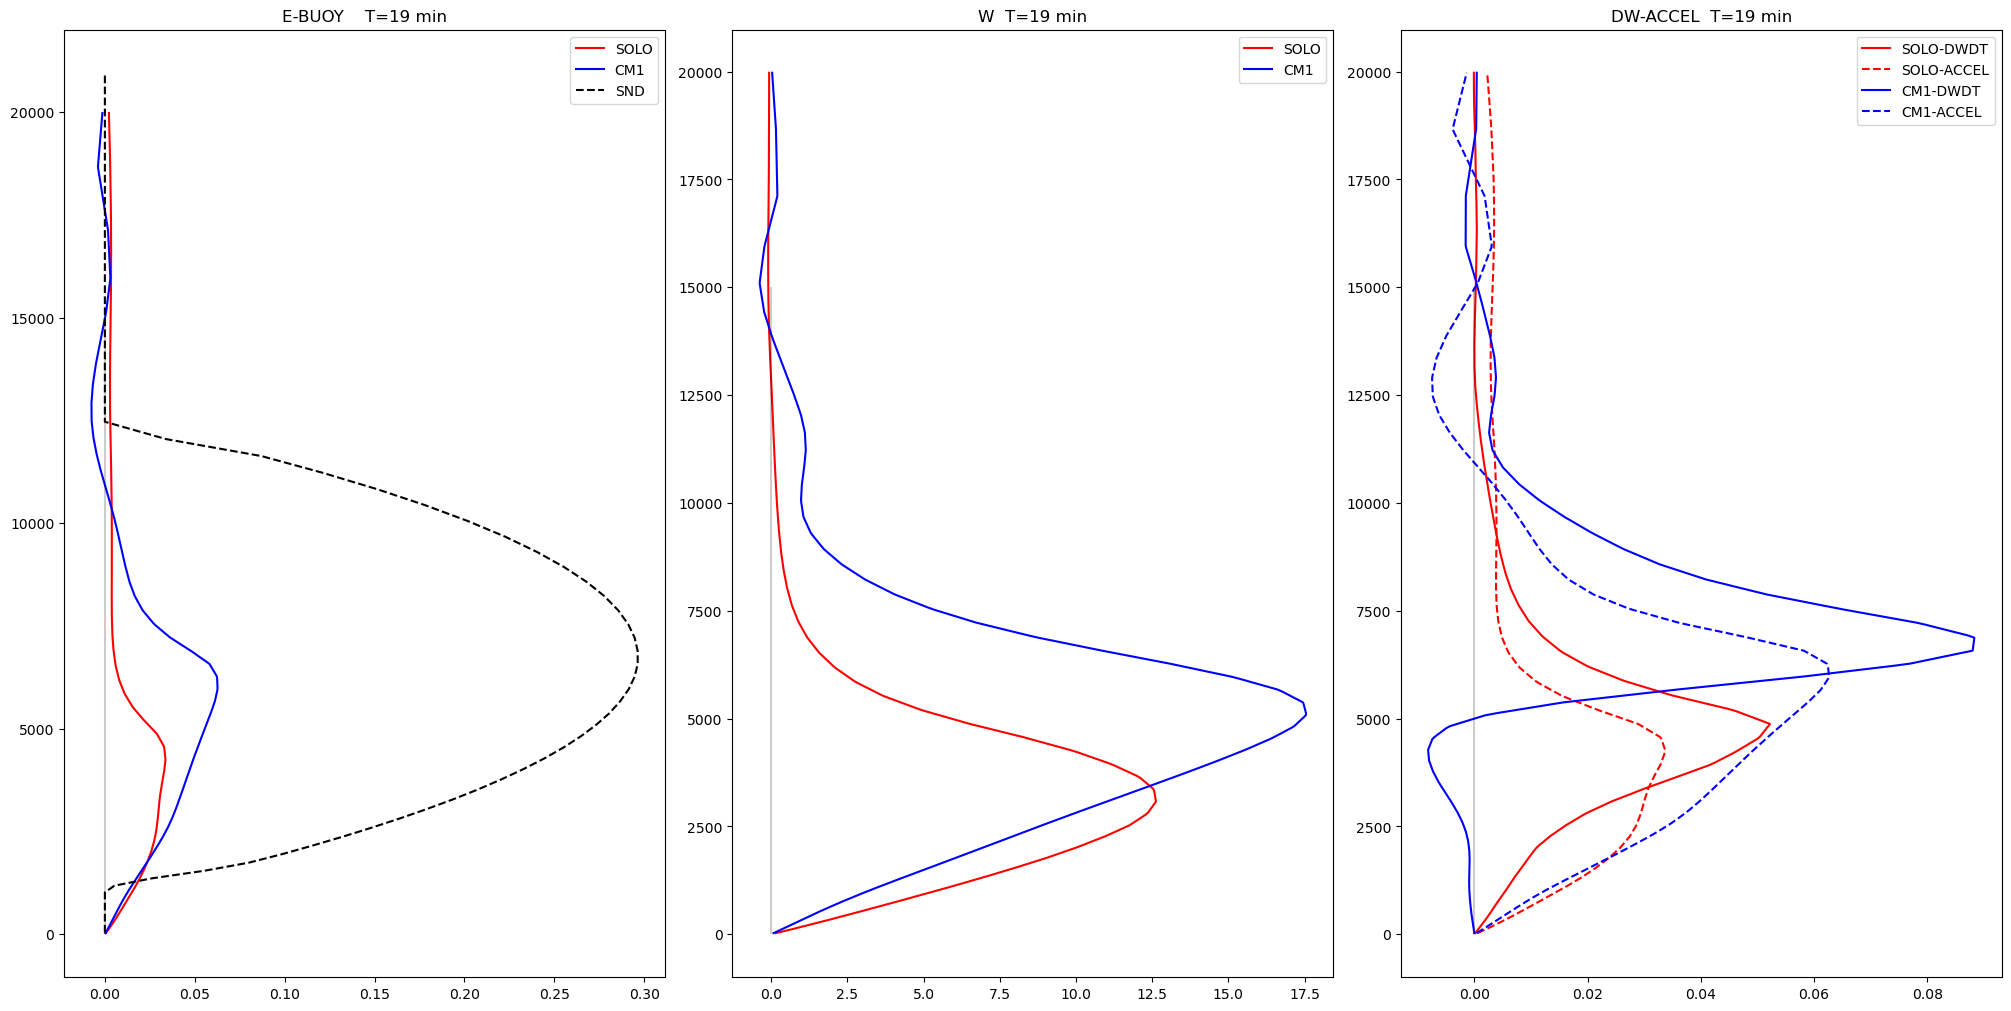

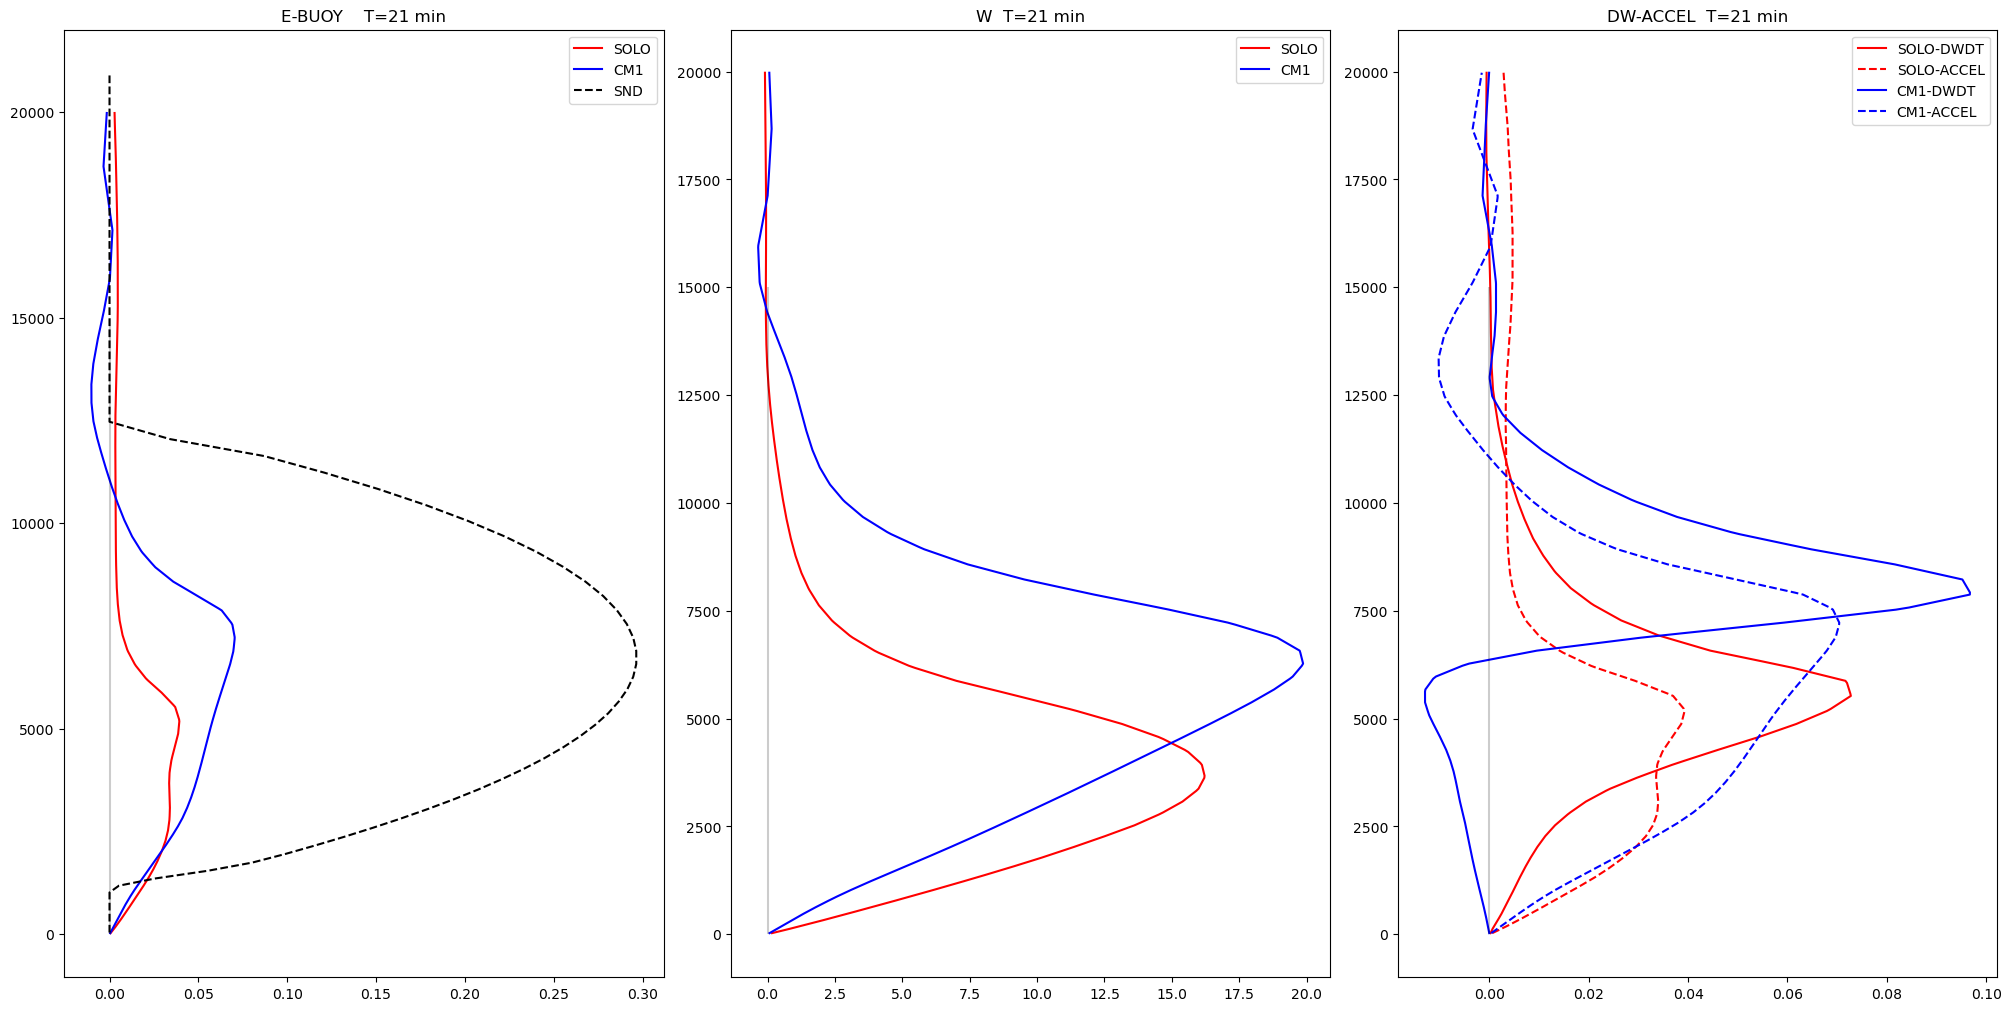

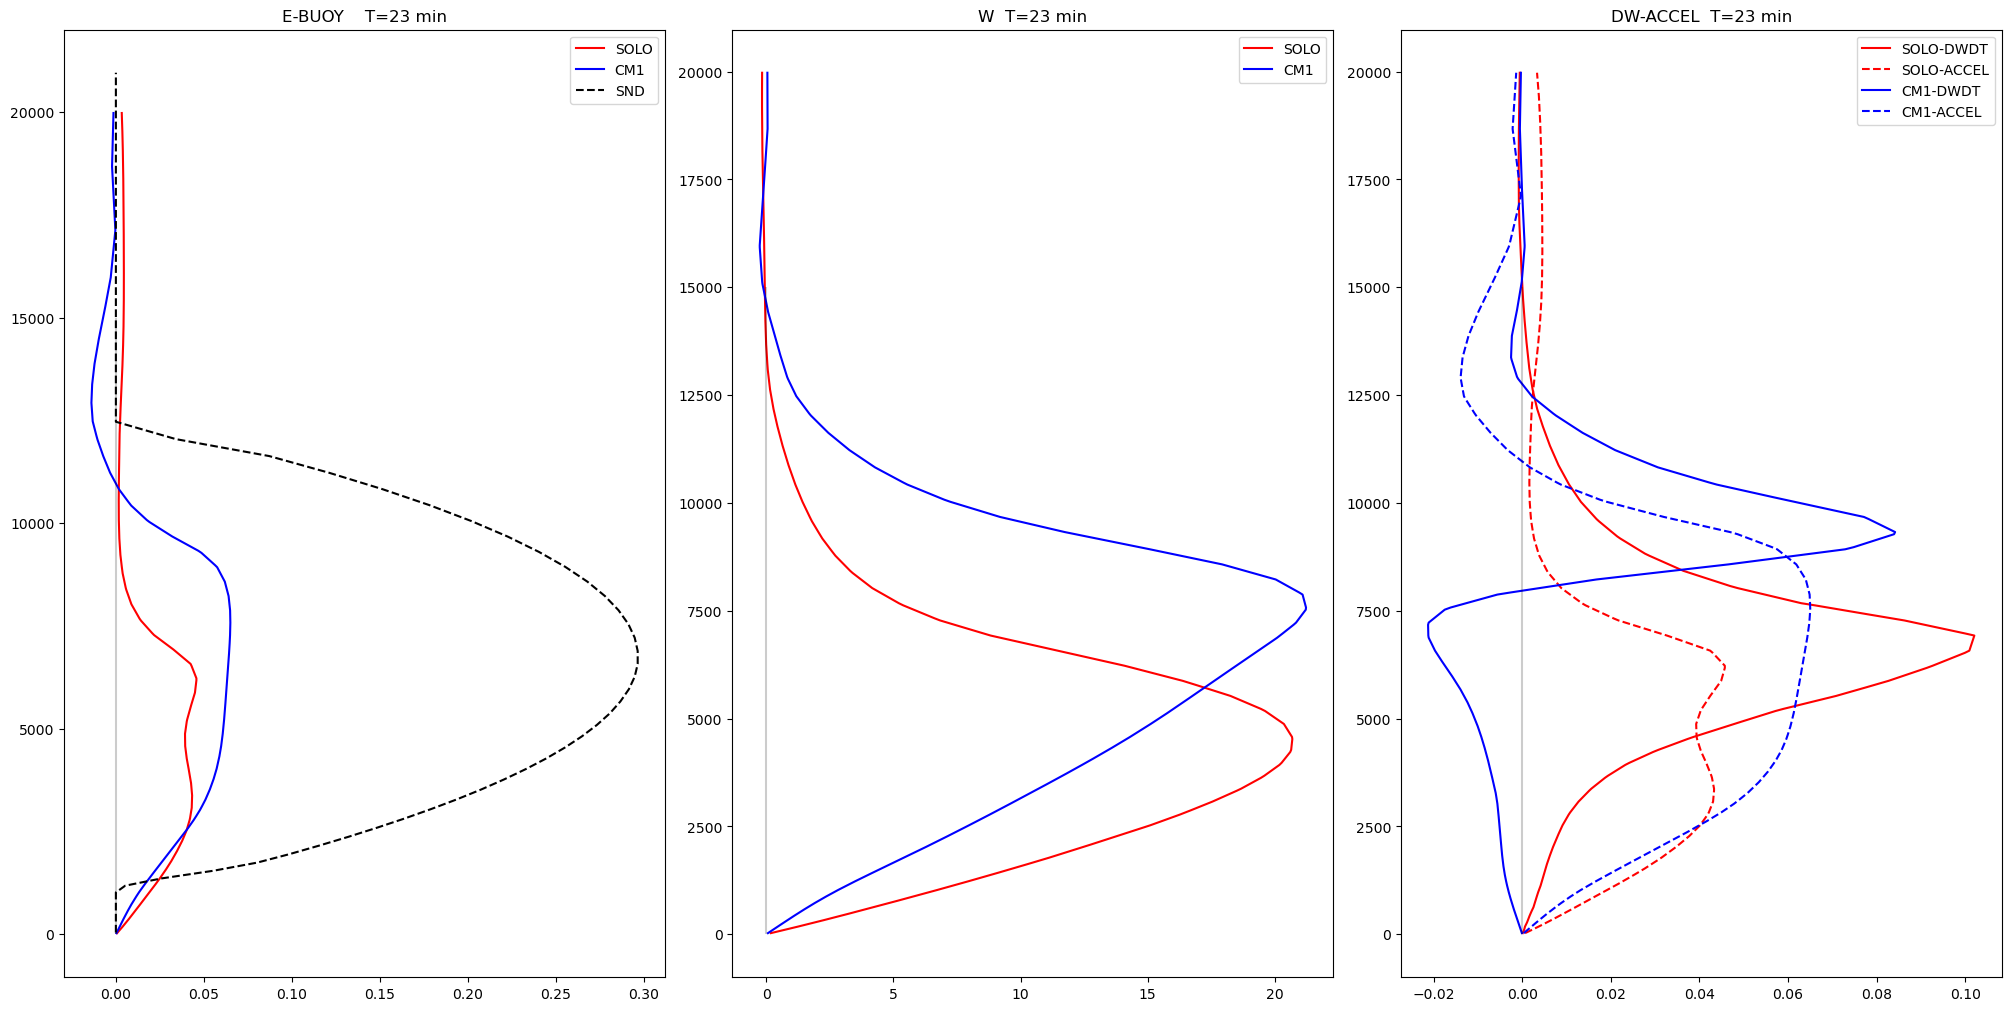

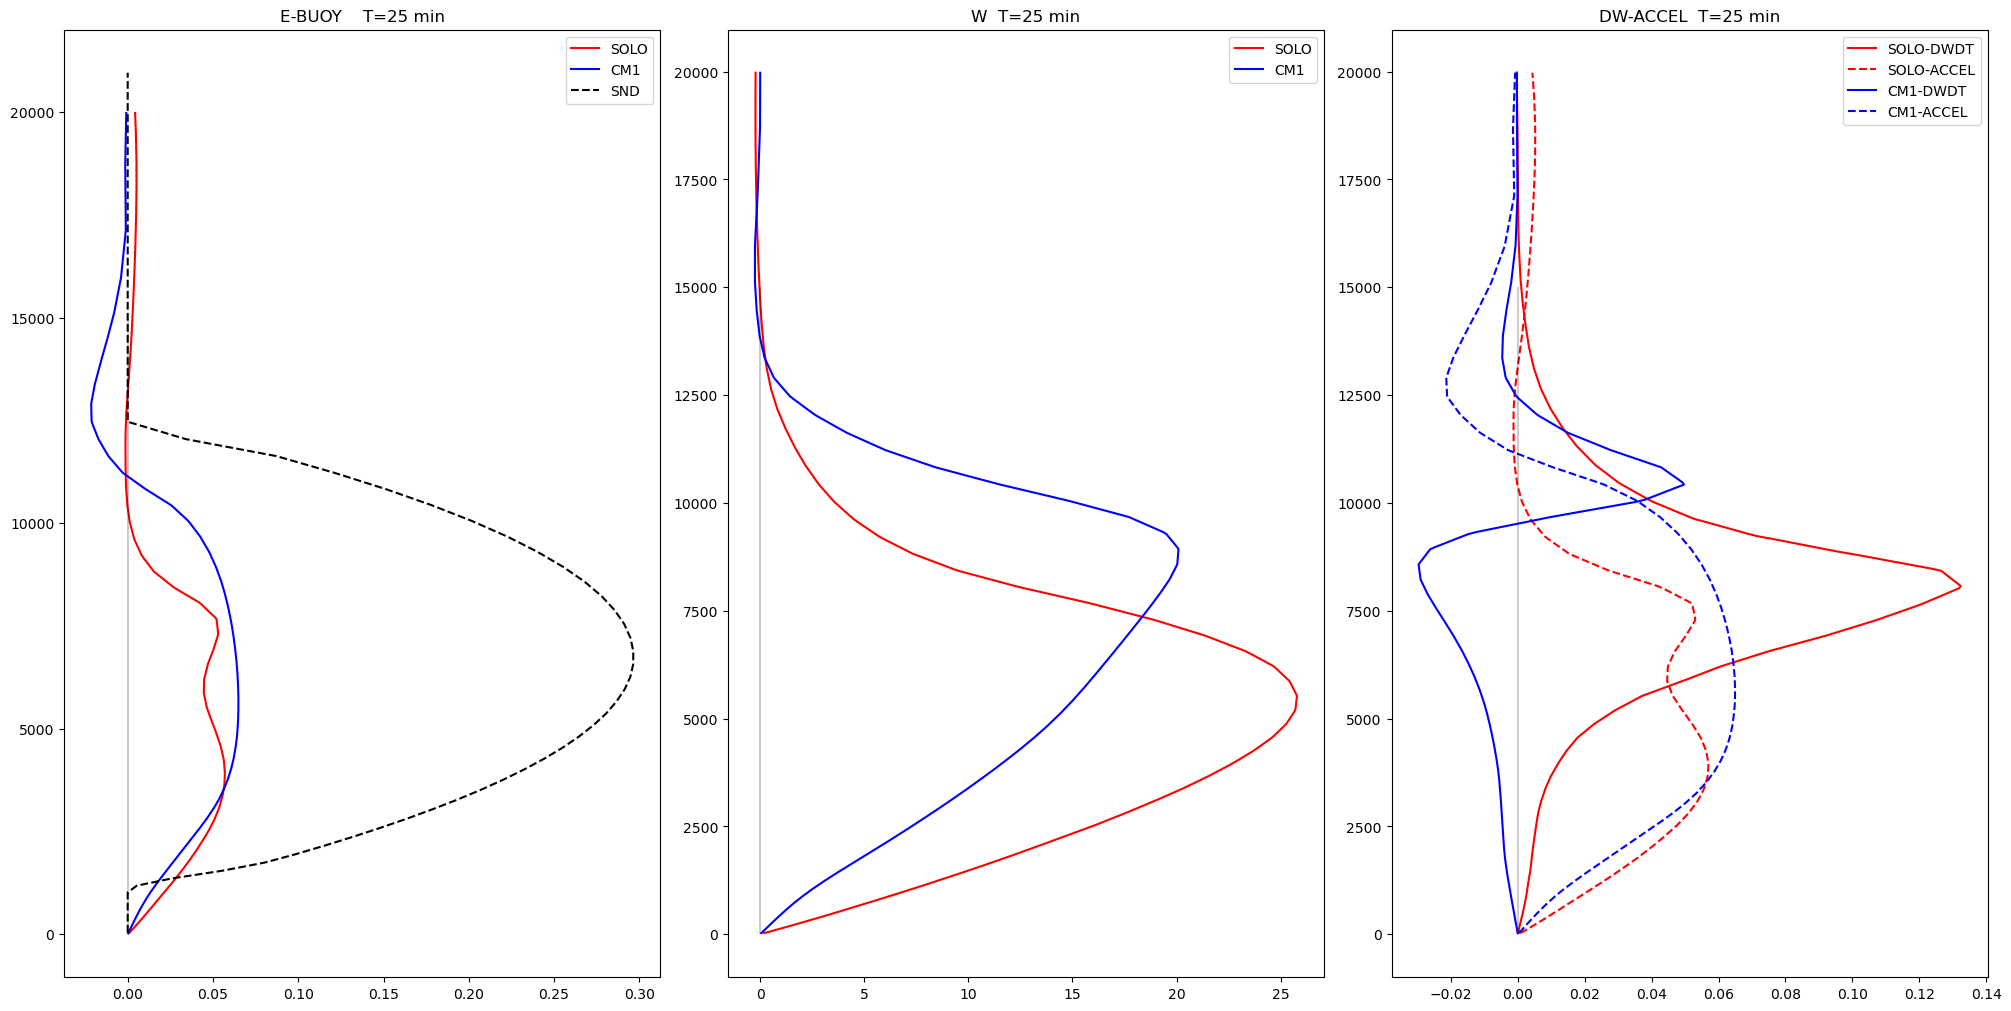

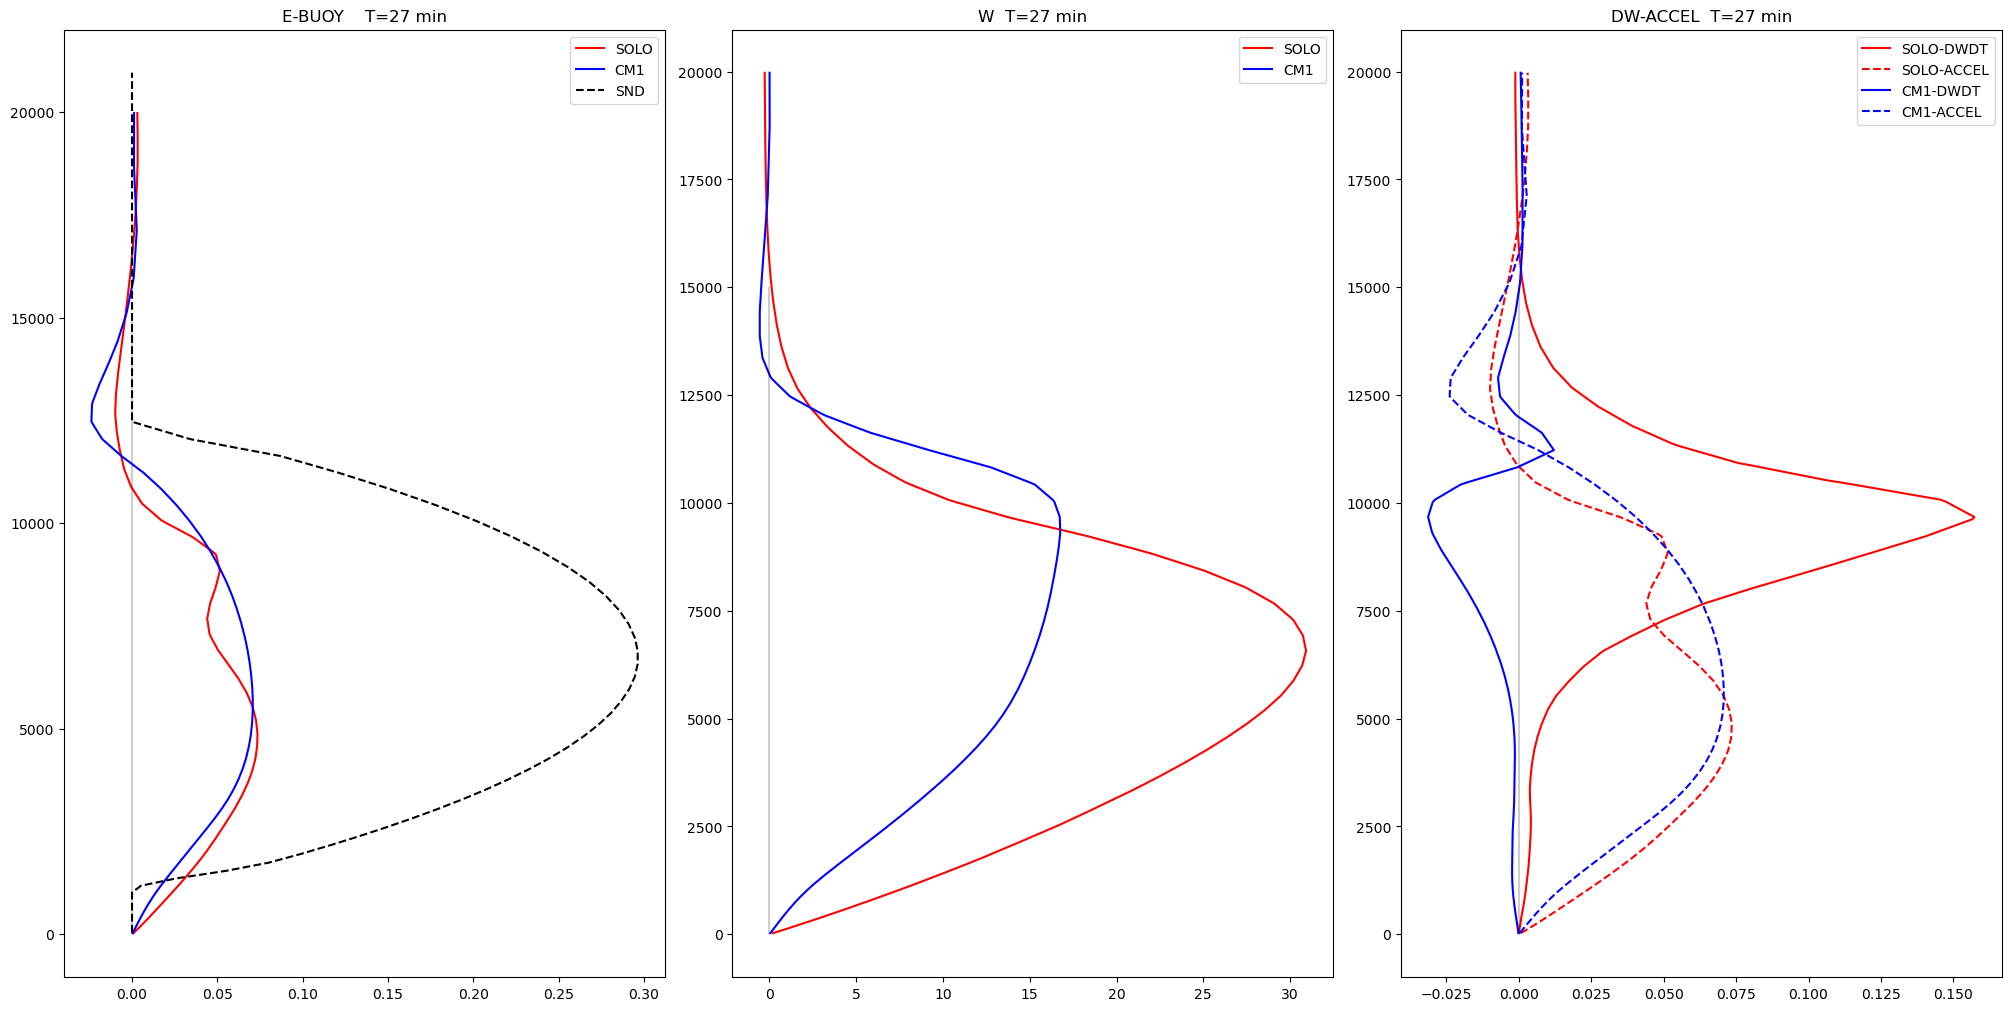

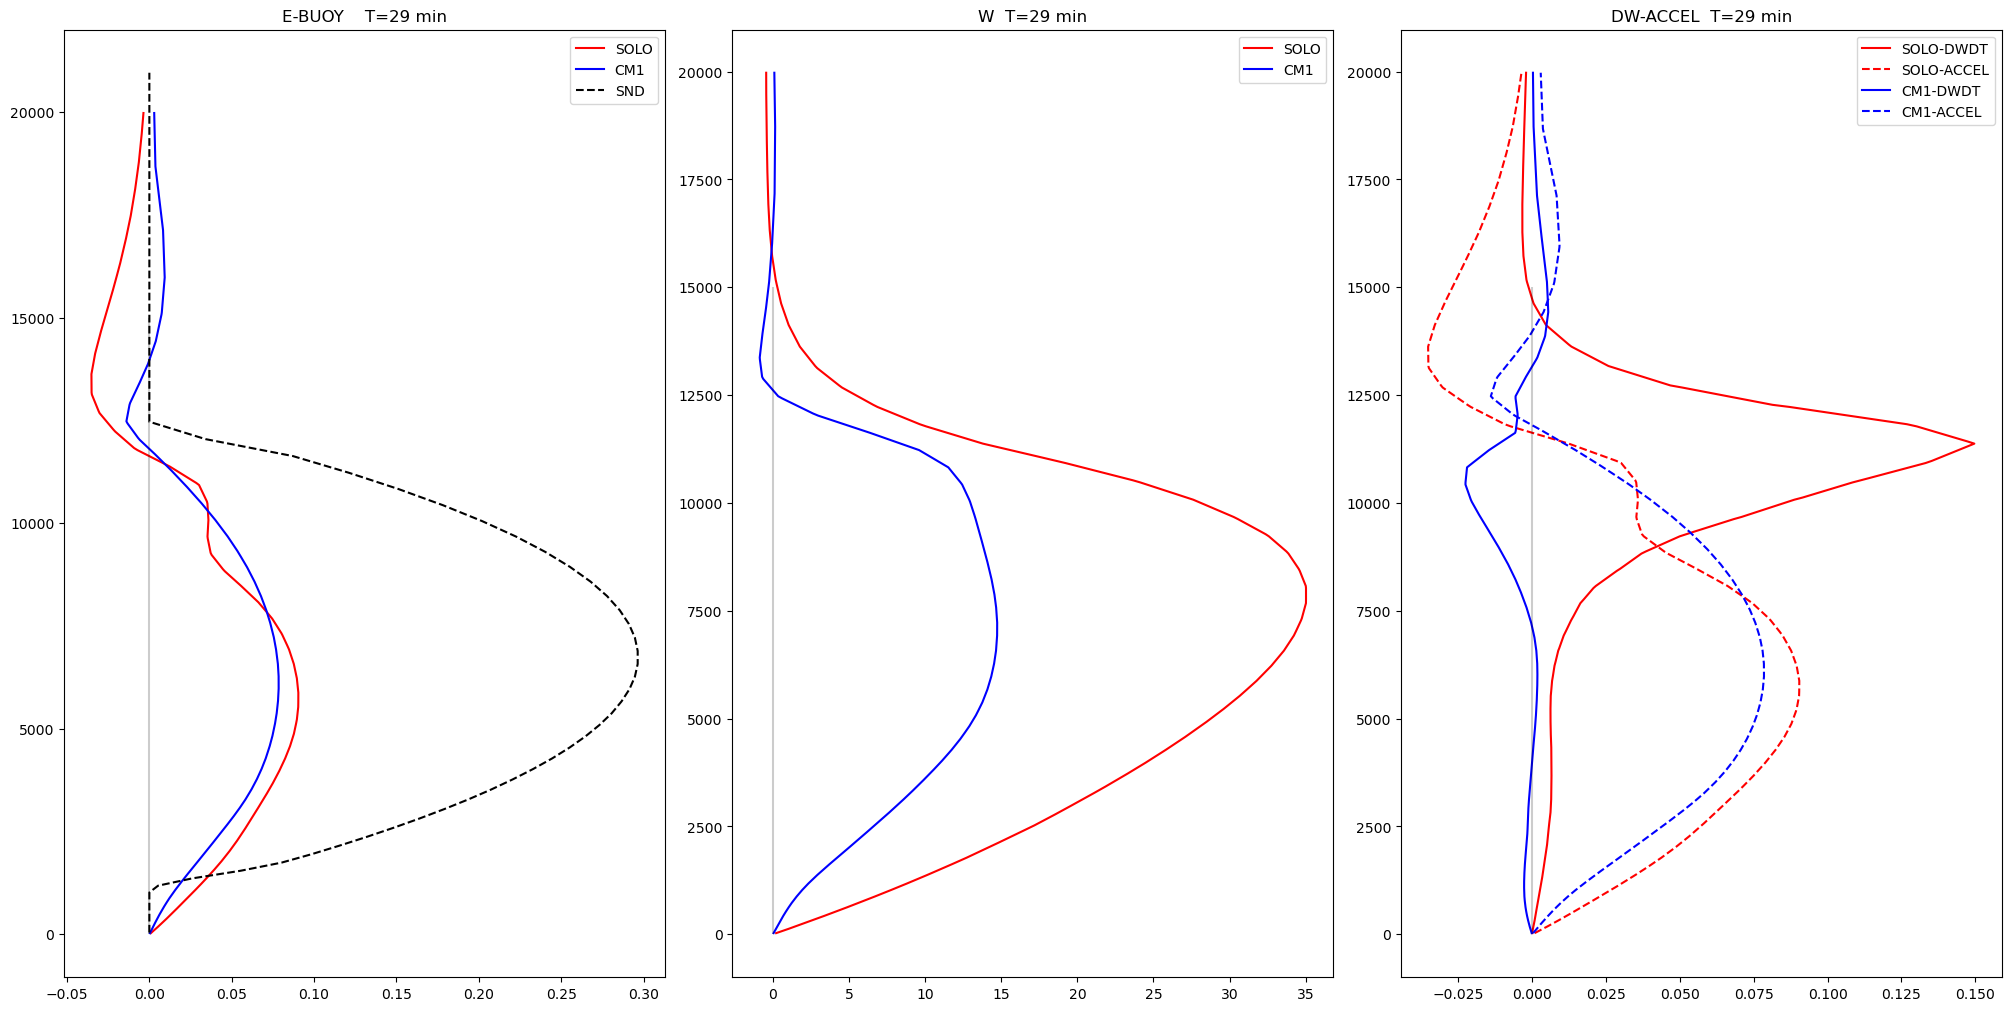

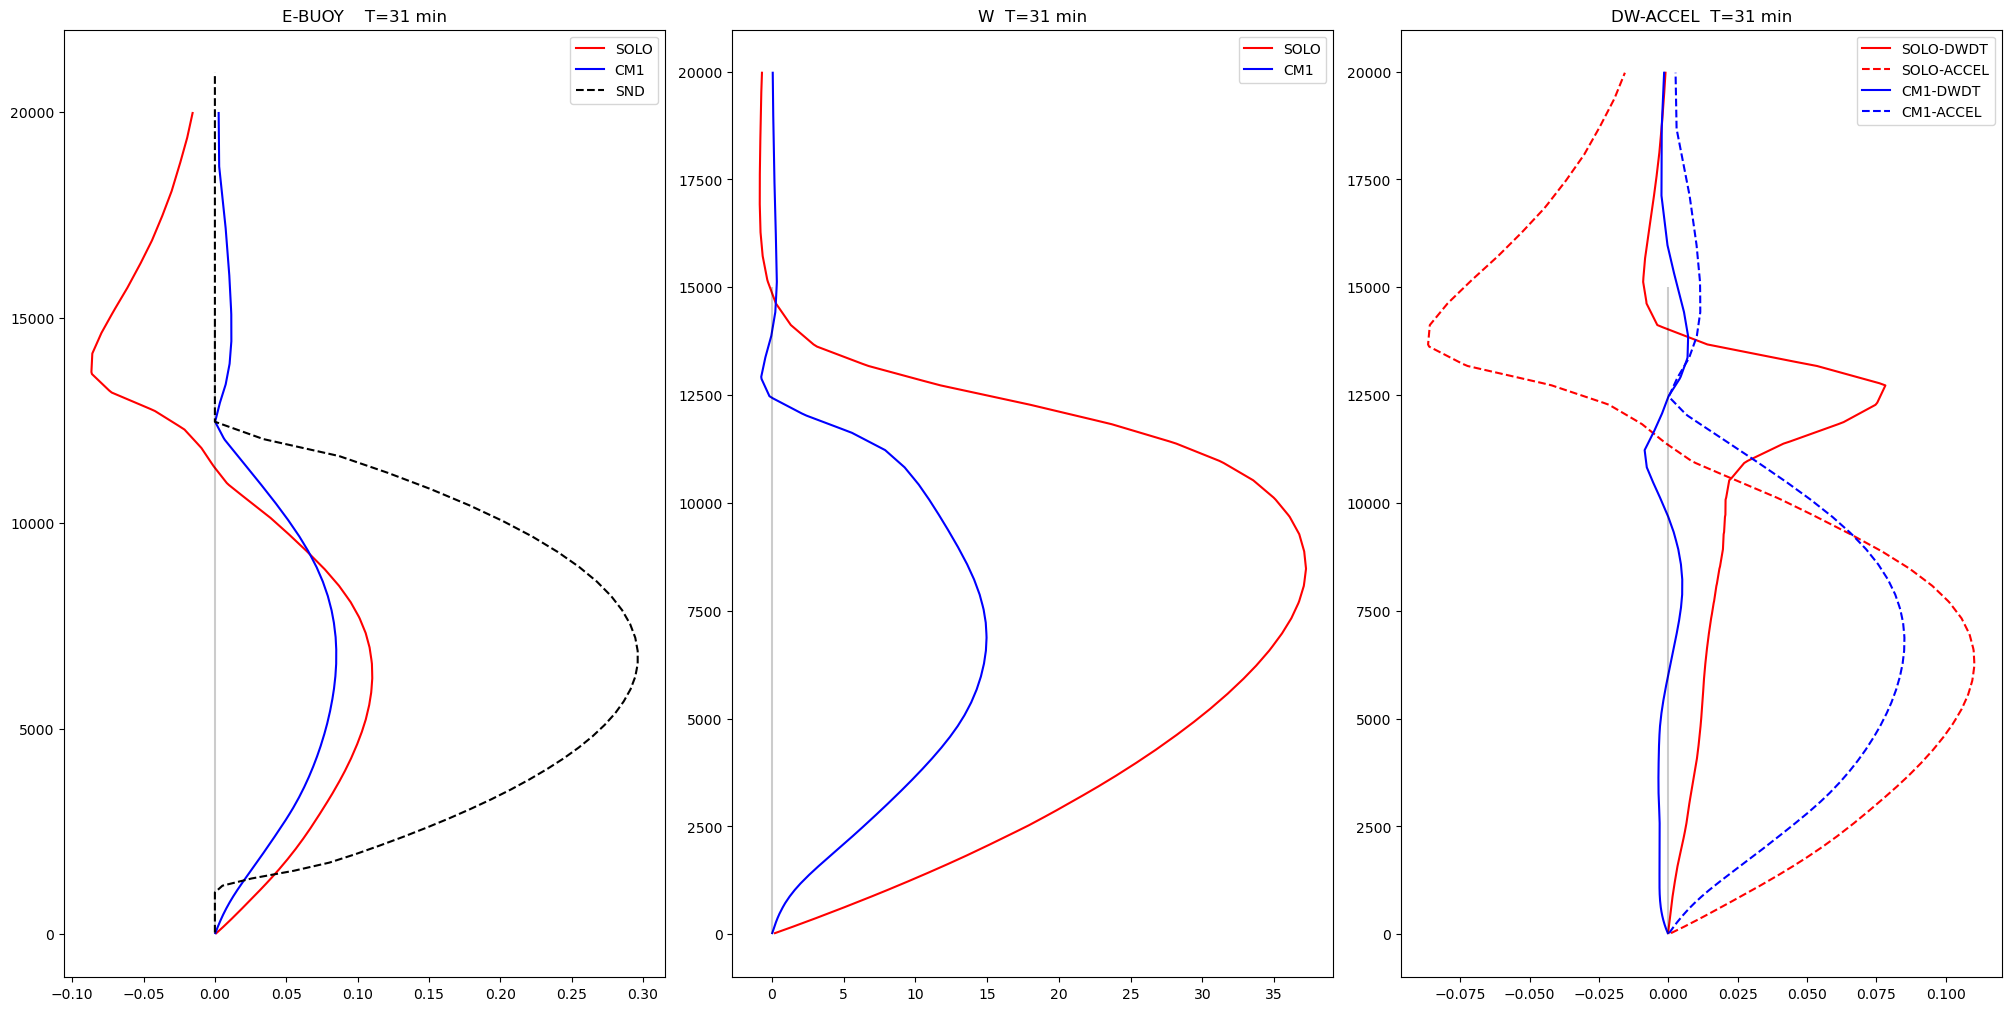

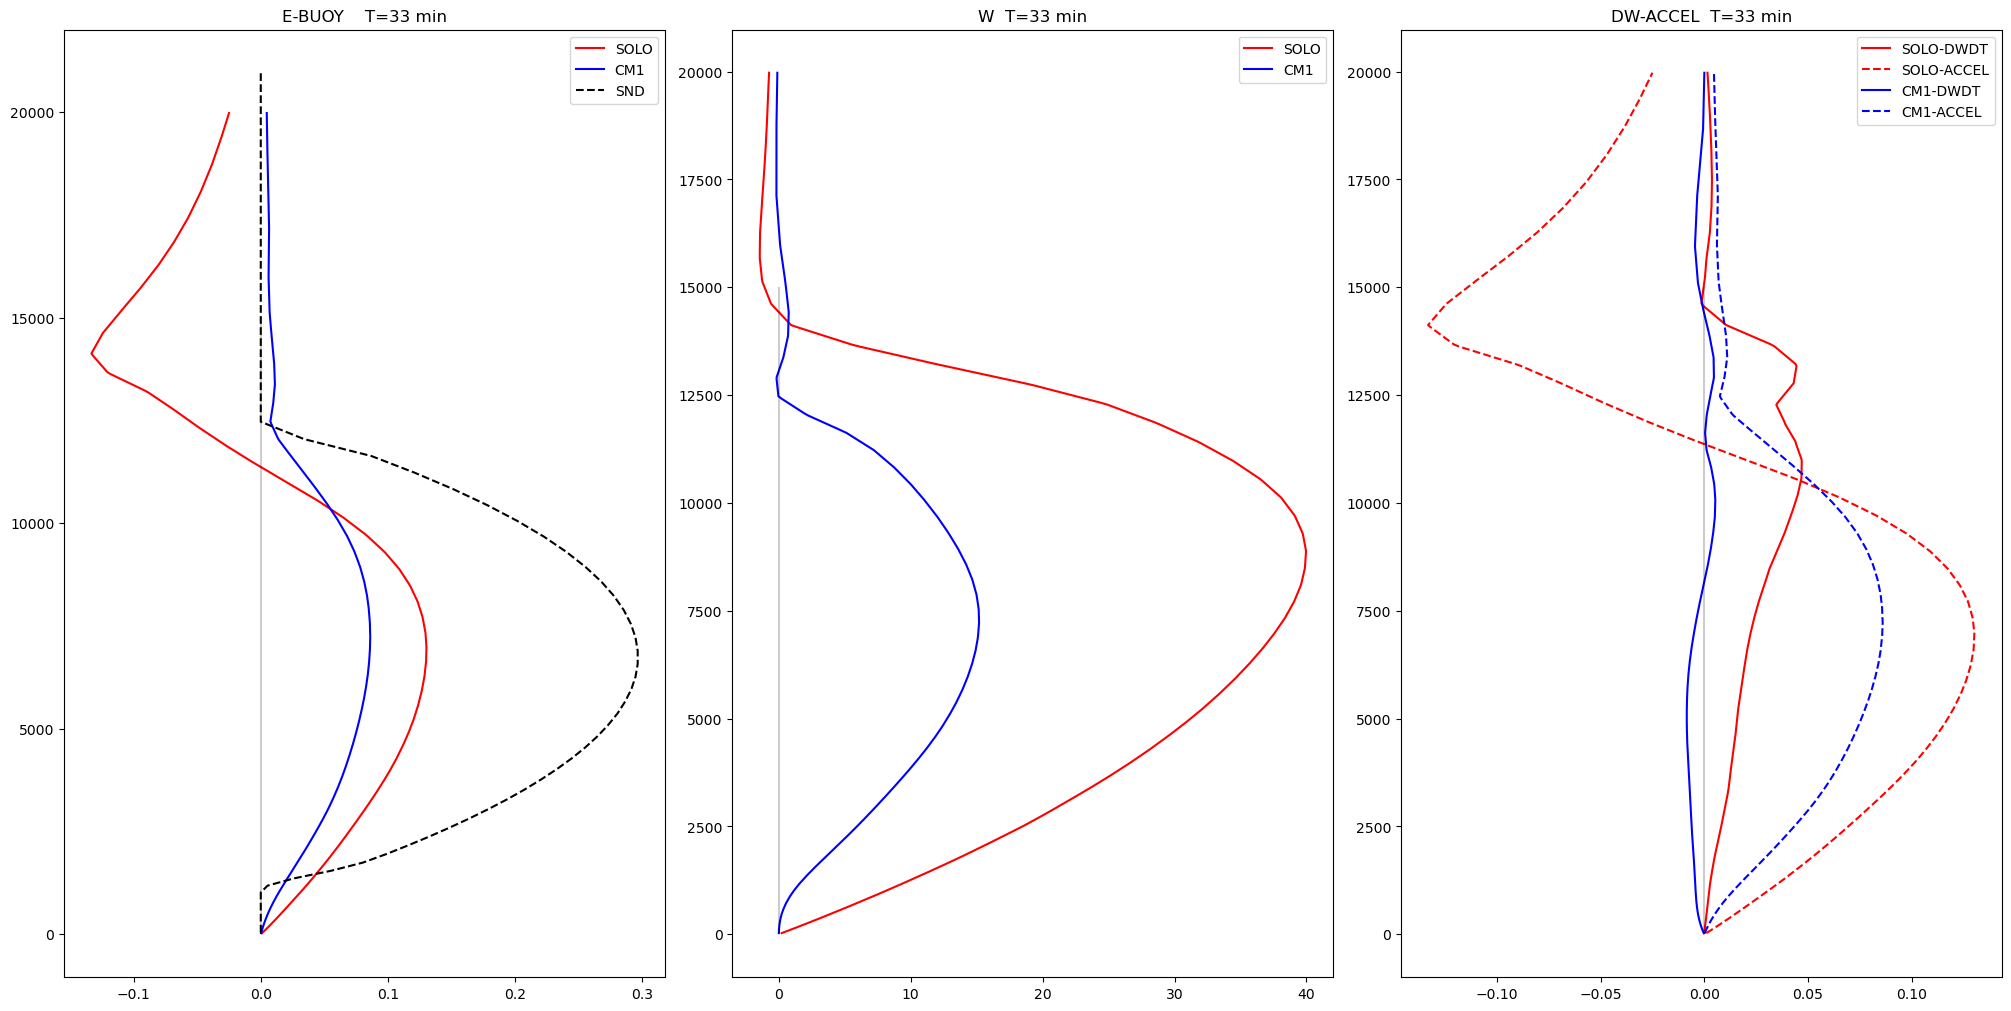

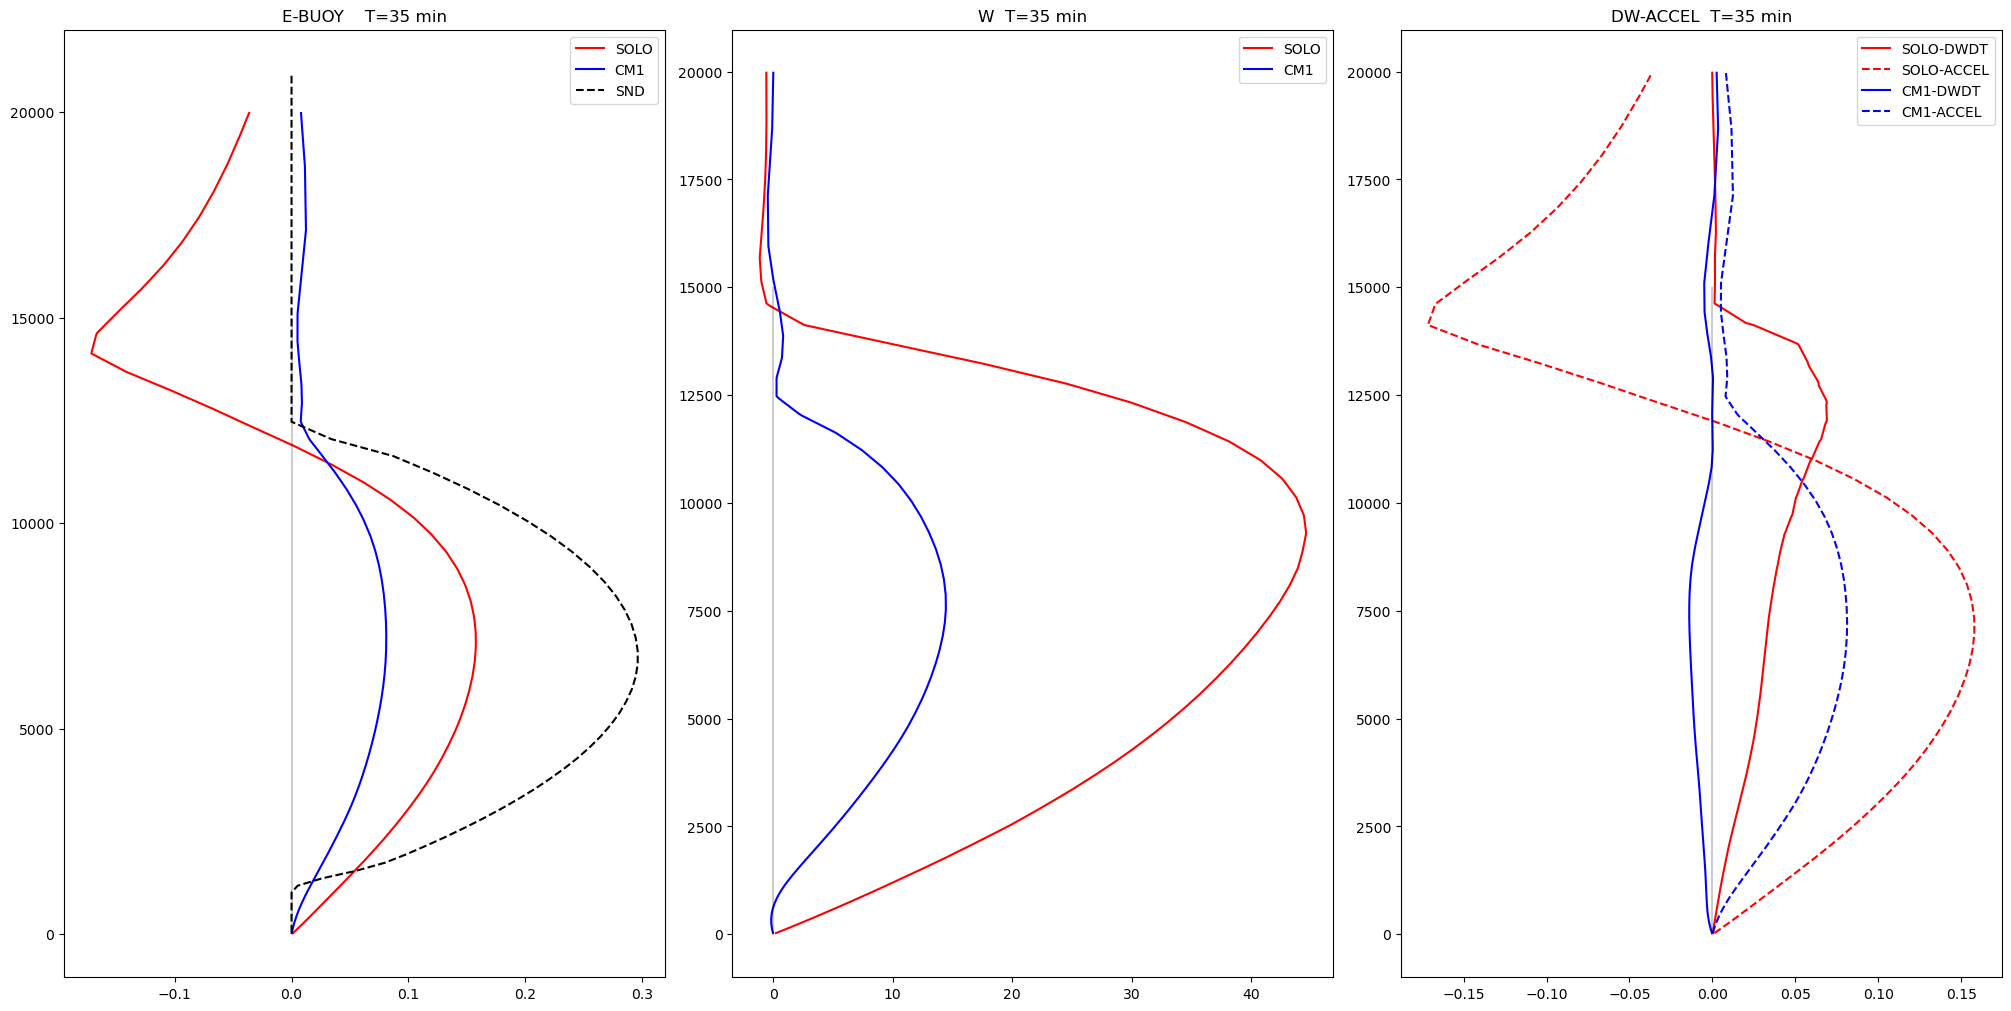

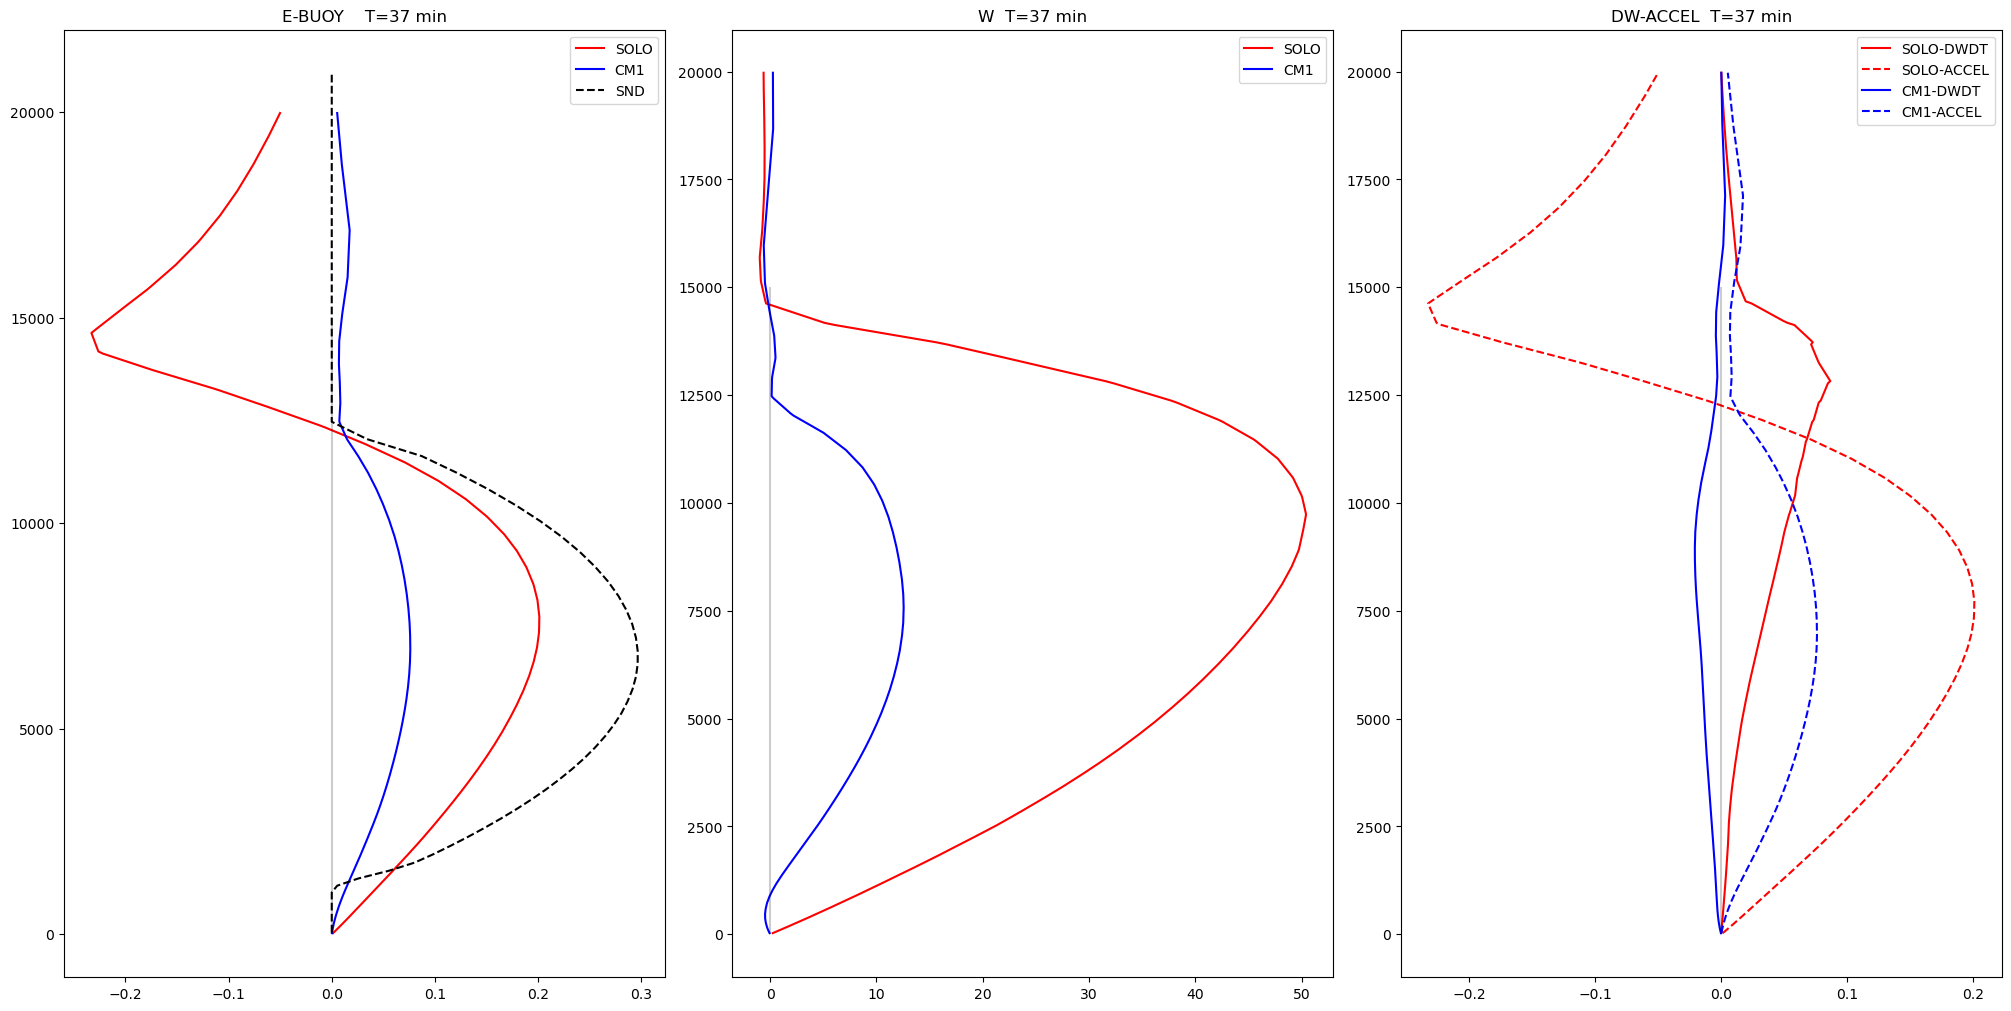

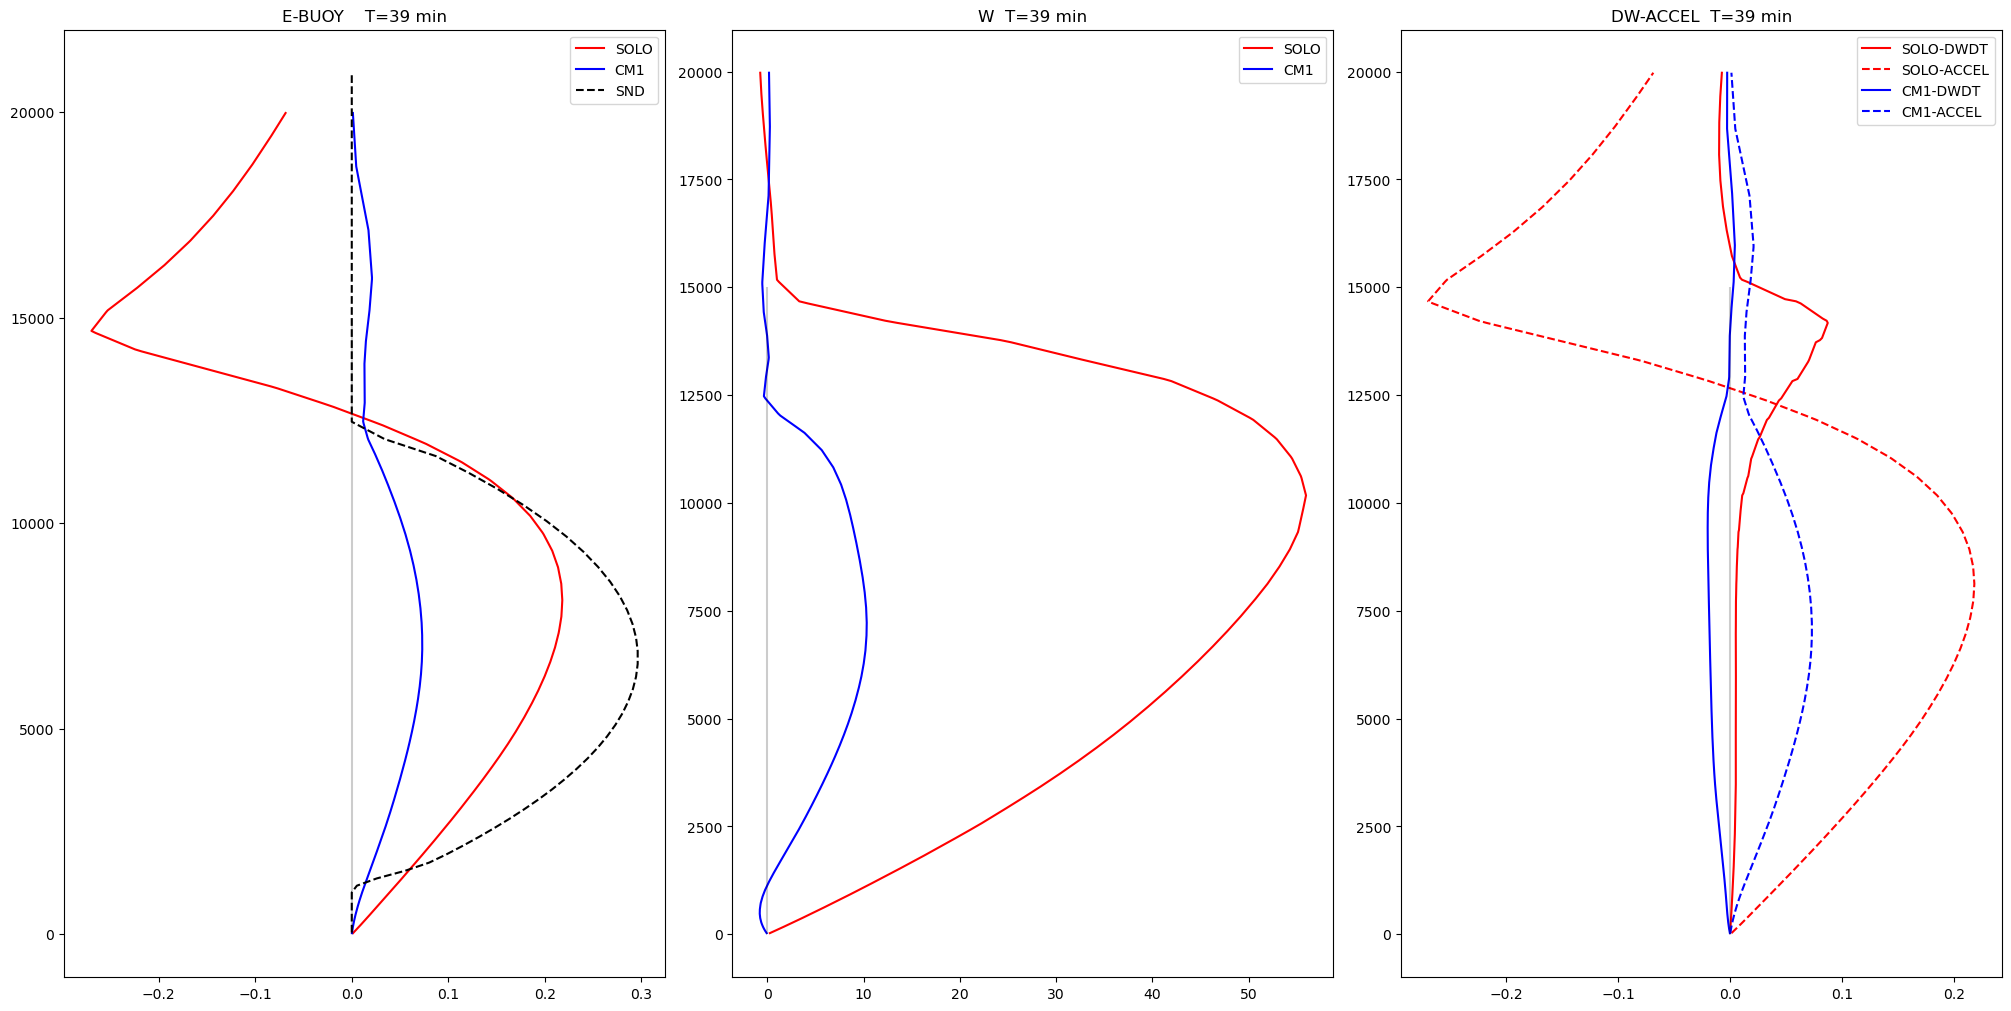

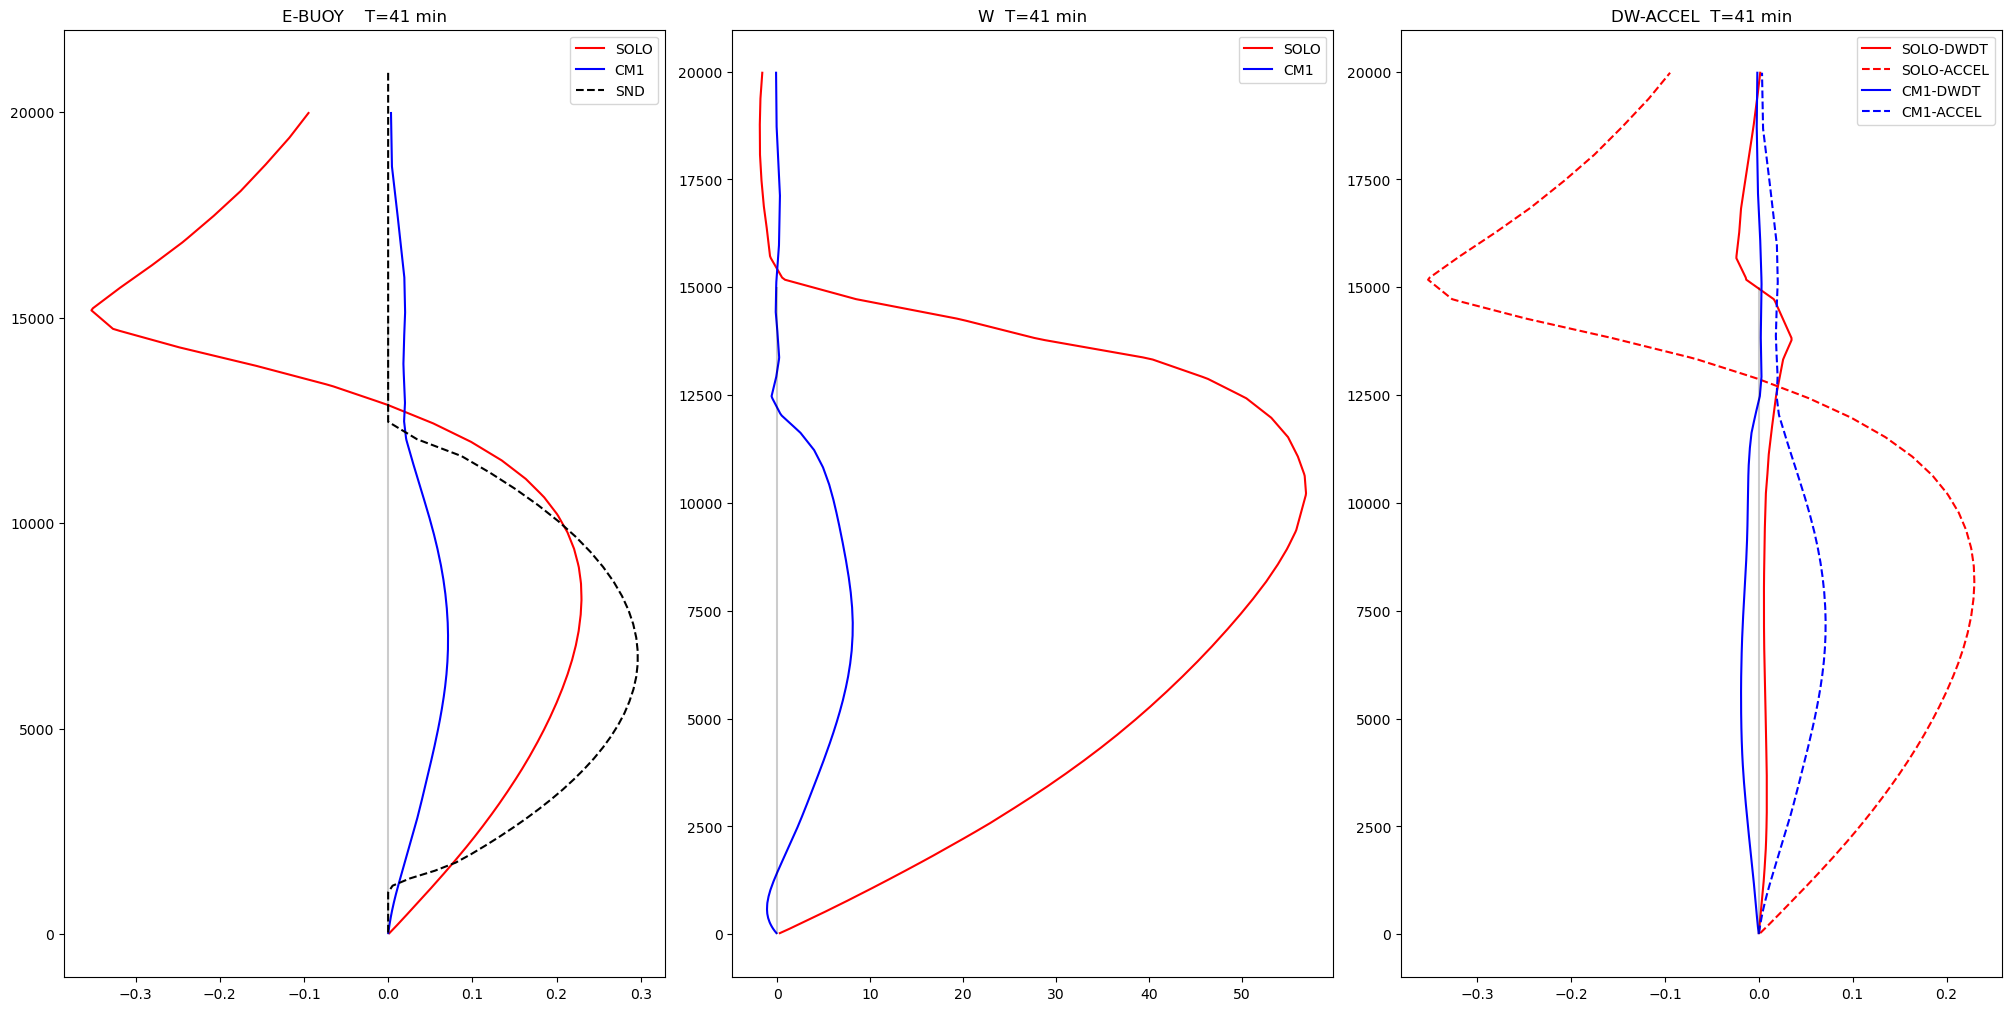

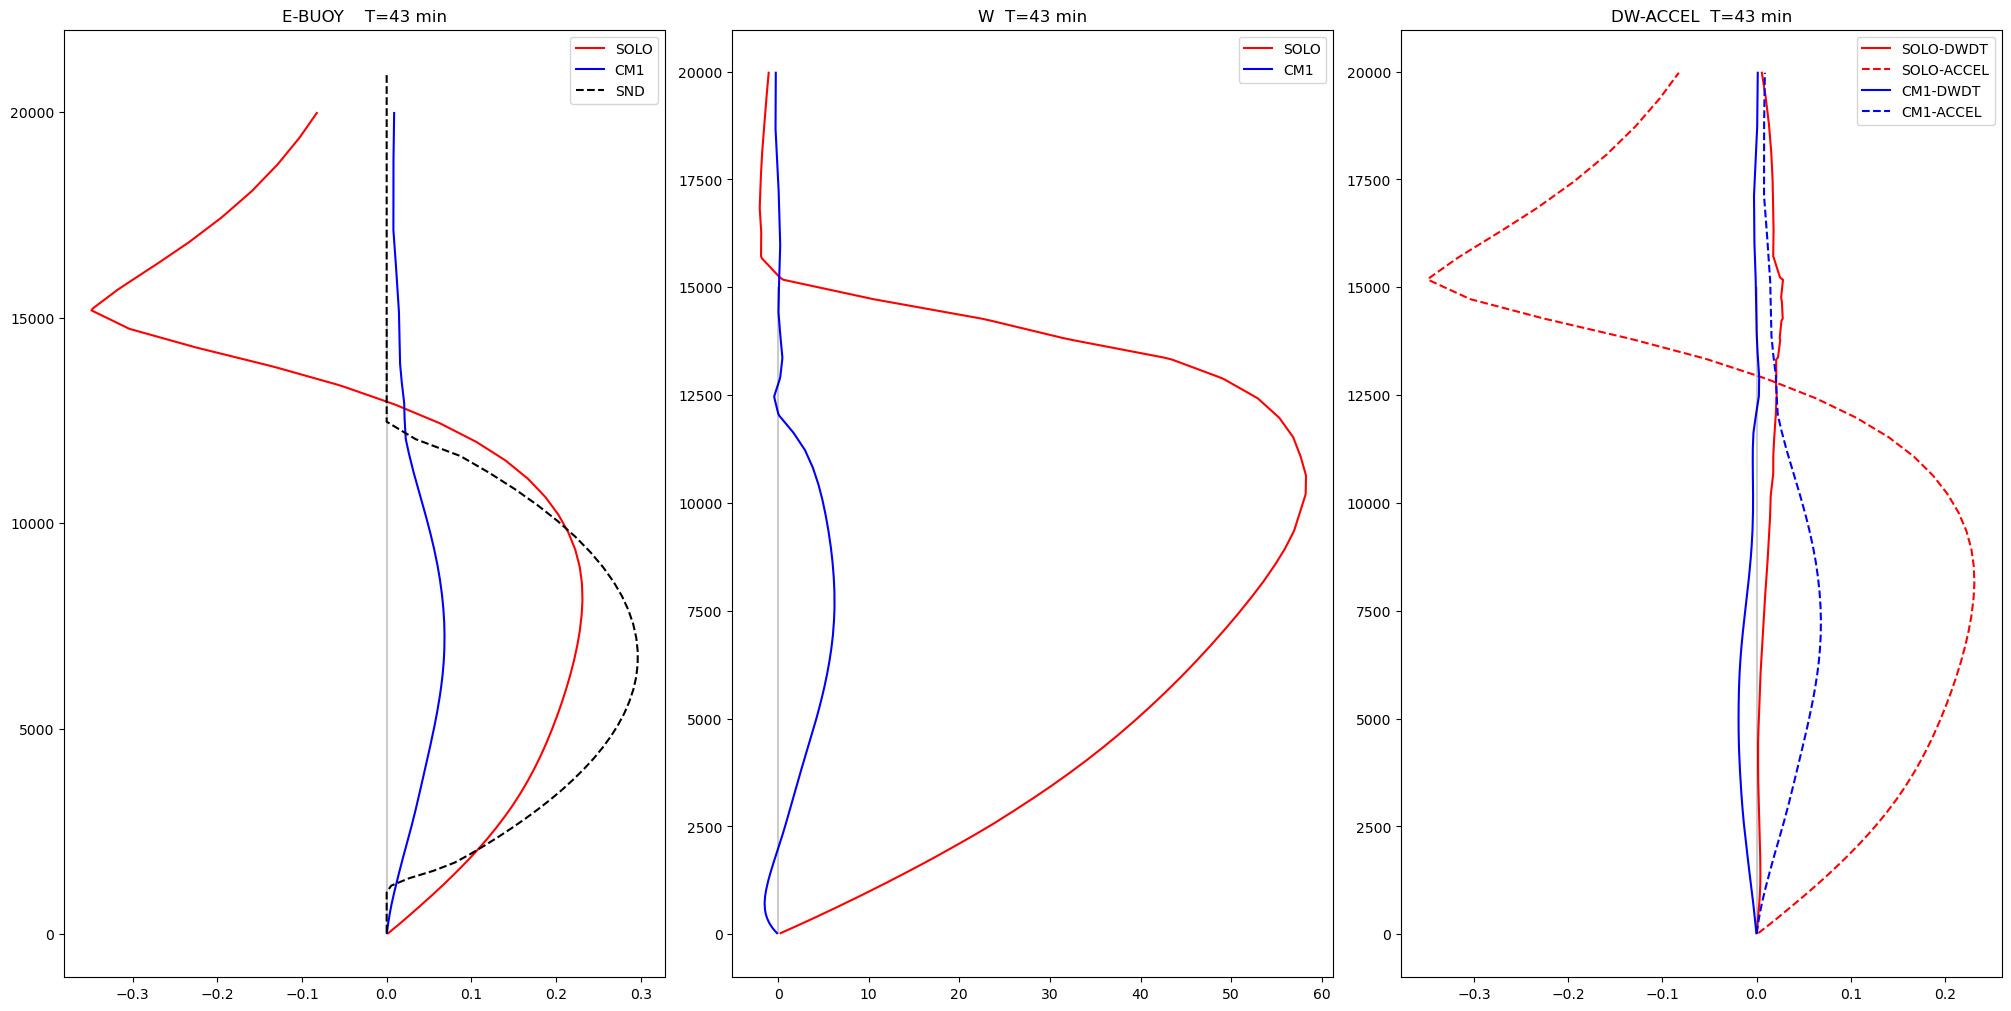

In [4]:
# compute acceleration

for tloc in 5+2*np.arange(20):

    jlocm, jlocp = 31,31
    ilocm, ilocp = 31,31

    if jlocm == jlocp:
        solo_beta = solo[0]['beta'][tloc,:,jlocm,ilocm]
        solo_buoy = solo[0]['buoy'][tloc,:,jlocm,ilocm]
        solo_w    = solo[0]['w'][tloc,:,jlocm,ilocm]
        cm1_beta  = cm1[0]['beta'][tloc+1,:,jlocm,ilocm]
        cm1_buoy  = cm1[0]['buoy'][tloc+1,:,jlocm,ilocm]
        cm1_w     = cm1[0]['w'][tloc+1,:,jlocm,ilocm]
        if tloc > 1:
            solo_dwdt = (solo[0]['w'][tloc+1,:,jlocm,ilocm] - solo[0]['w'][tloc,:,jlocm,ilocm])/60.
            cm1_dwdt  = ( cm1[0]['w'][tloc+2,:,jlocm,ilocm] -  cm1[0]['w'][tloc+1,  :,jlocm,ilocm])/60.
    else:
        solo_beta = solo[0]['beta'][tloc,:,jlocm:jlocp,ilocm:ilocp].mean(axis=(1,2))
        cm1_beta  =  cm1[0]['beta'][tloc+1,:,jlocm:jlocp,ilocm:ilocp].mean(axis=(1,2))
        solo_buoy = solo[0]['buoy'][tloc,:,jlocm:jlocp,ilocm:ilocp].mean(axis=(1,2))
        cm1_buoy  =  cm1[0]['buoy'][tloc+1,:,jlocm:jlocp,ilocm:ilocp].mean(axis=(1,2))

    fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))

    np = 0
    ax[np].plot(solo_beta, zlevels, color='r', label='SOLO')
    ax[np].plot(cm1_beta, zlevels, color='b', label='CM1')
    ax[np].plot(buoy_data[:,2], buoy_data[:,0], color='k', linestyle='--', label='SND')
    ax[np].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    ax[np].set_title('E-BUOY    T=%d min'%(tloc))

    np = 1
    ax[np].plot(solo_w, zlevels, color='r', label='SOLO')
    ax[np].plot(cm1_w,  zlevels, color='b', label='CM1')
    ax[np].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    ax[np].set_title('W  T=%d min'%(tloc))

    if tloc > 1:
        np = 2
        ax[np].plot(solo_dwdt, zlevels, color='r', label='SOLO-DWDT')
        ax[np].plot(solo_beta, zlevels, color='r', linestyle='--', label='SOLO-ACCEL')
        ax[np].plot(cm1_dwdt,  zlevels, color='b', label='CM1-DWDT')
        ax[np].plot(cm1_beta,  zlevels, color='b', linestyle='--', label='CM1-ACCEL')
        ax[np].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
        ax[np].set_title('DW-ACCEL  T=%d min'%(tloc))

    # np = 3
    # ax[np].plot(solo_buoy, zlevels, color='r', label='SOLO')
    # ax[np].plot(cm1_buoy, zlevels, color='b', label='CM1')
    # ax[np].plot(buoy_data[:,2], buoy_data[:,0], color='k', linestyle='--', label='SND')
    # ax[np].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    # ax[np].set_title('PARCEL BUOY    T=%d min'%(tloc))

    # np = 4
    # ax[np].plot(solo_beta - solo_buoy, zlevels, color='r', label='SOLO')
    # ax[np].plot(cm1_beta  - cm1_buoy,  zlevels, color='b', label='CM1')
    # ax[np].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    # ax[np].set_title('DPDZ   T=%d min'%(tloc))
    
    for item in ax.flatten():
        item.legend();

    #plt.savefig("plotcenter_%2.2d.png" % tloc)


In [5]:
paths = {}
paths['cm1_3km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_DENSEOUTPUT_hdd125_C2000_00'

cm2 = []

for key in paths:
    
    beta_file = os.path.join(beta_dir, "%s_%s_beta_out.nc" % ('cm1', os.path.basename(paths[key]) ))
    print("Reading: ",key, beta_file)
    cm2.append( read_cm1_fields(paths[key], vars = ['w','den','buoy'], ret_beta=beta_file, zinterp=zlevels) )
    paths = {}


Reading:  cm1_3km_hdd125 /work/wicker/CAM_analysis_tools/ideal_cases/beta_diagnostic/cm1_bubble_3km_DENSEOUTPUT_hdd125_C2000_00_beta_out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_DENSEOUTPUT_hdd125_C2000_00/cm1out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_DENSEOUTPUT_hdd125_C2000_00/cm1out.nc 

 Reading BETA from /work/wicker/CAM_analysis_tools/ideal_cases/beta_diagnostic/cm1_bubble_3km_DENSEOUTPUT_hdd125_C2000_00_beta_out.nc
 Completed reading in:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_DENSEOUTPUT_hdd125_C2000_00/cm1out.nc 

------------------------------------------------------------------------------------------------------------------------
 Interpolating fields to sin

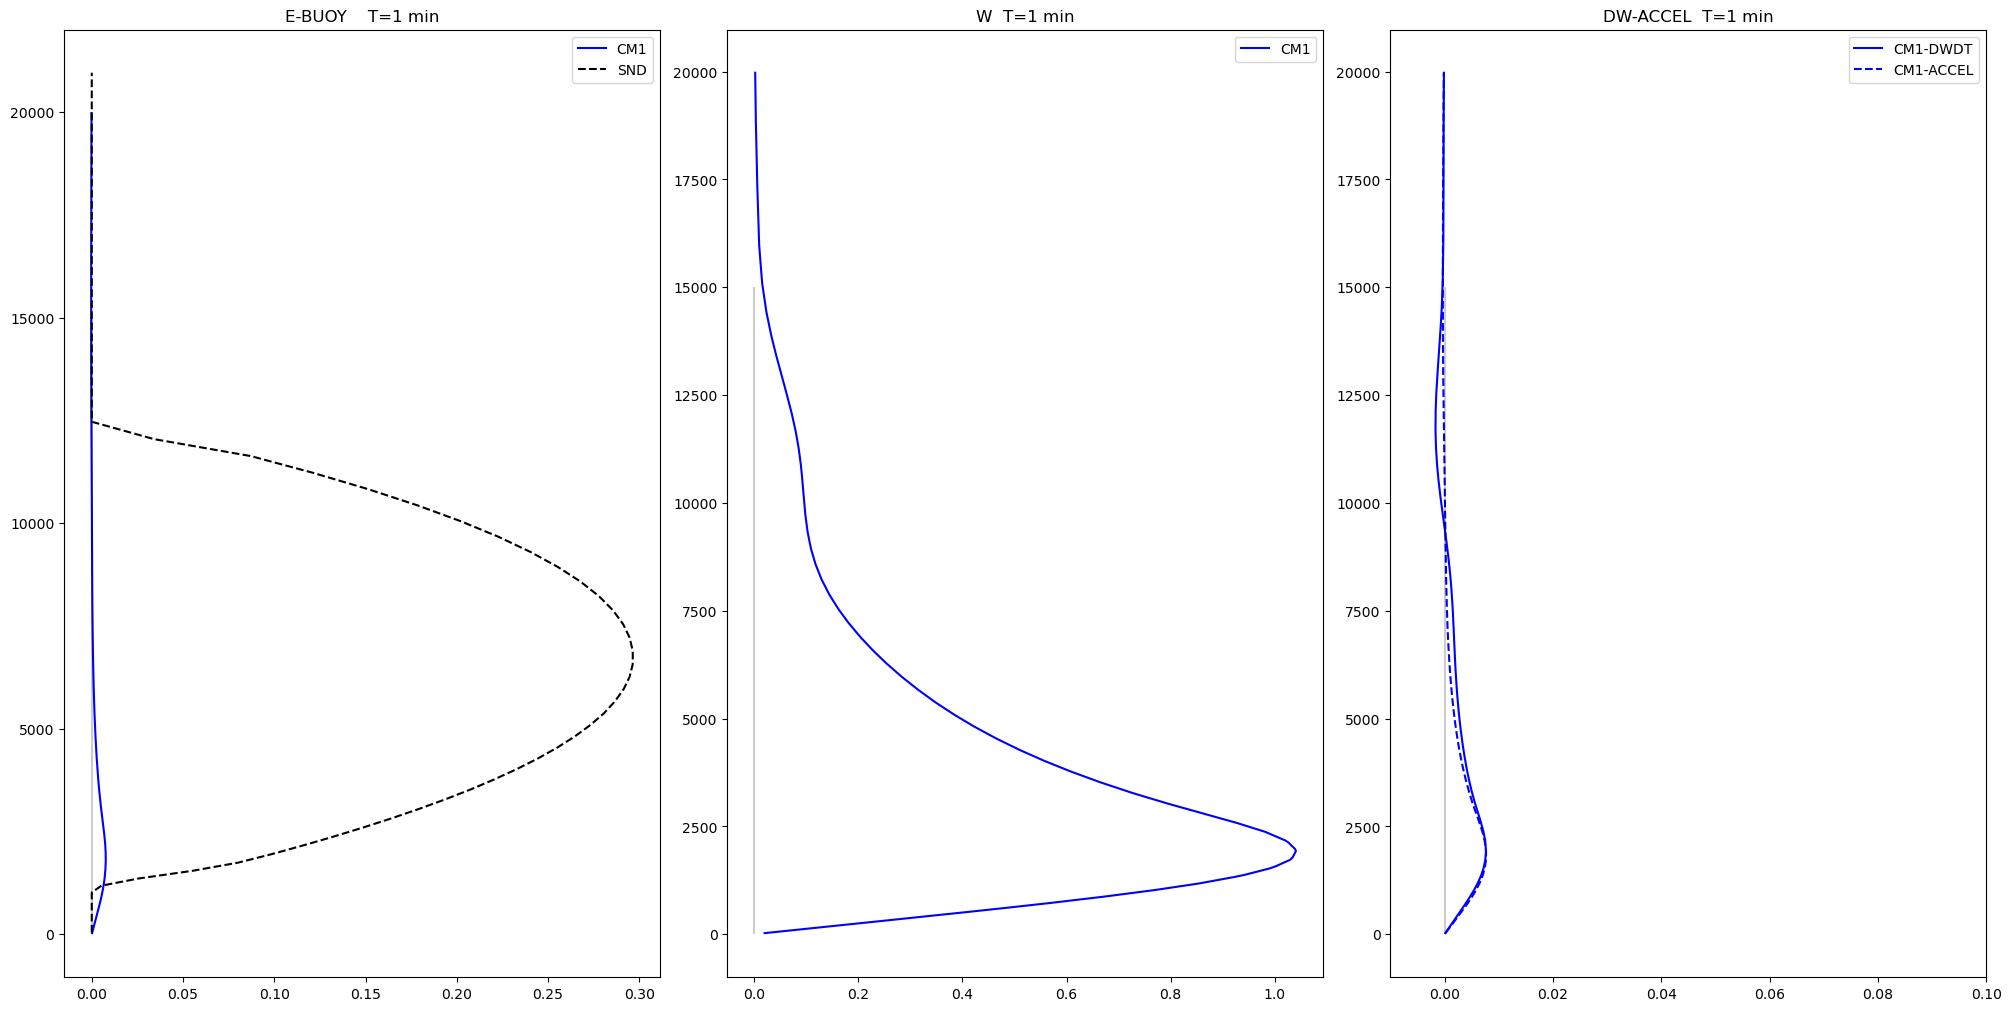

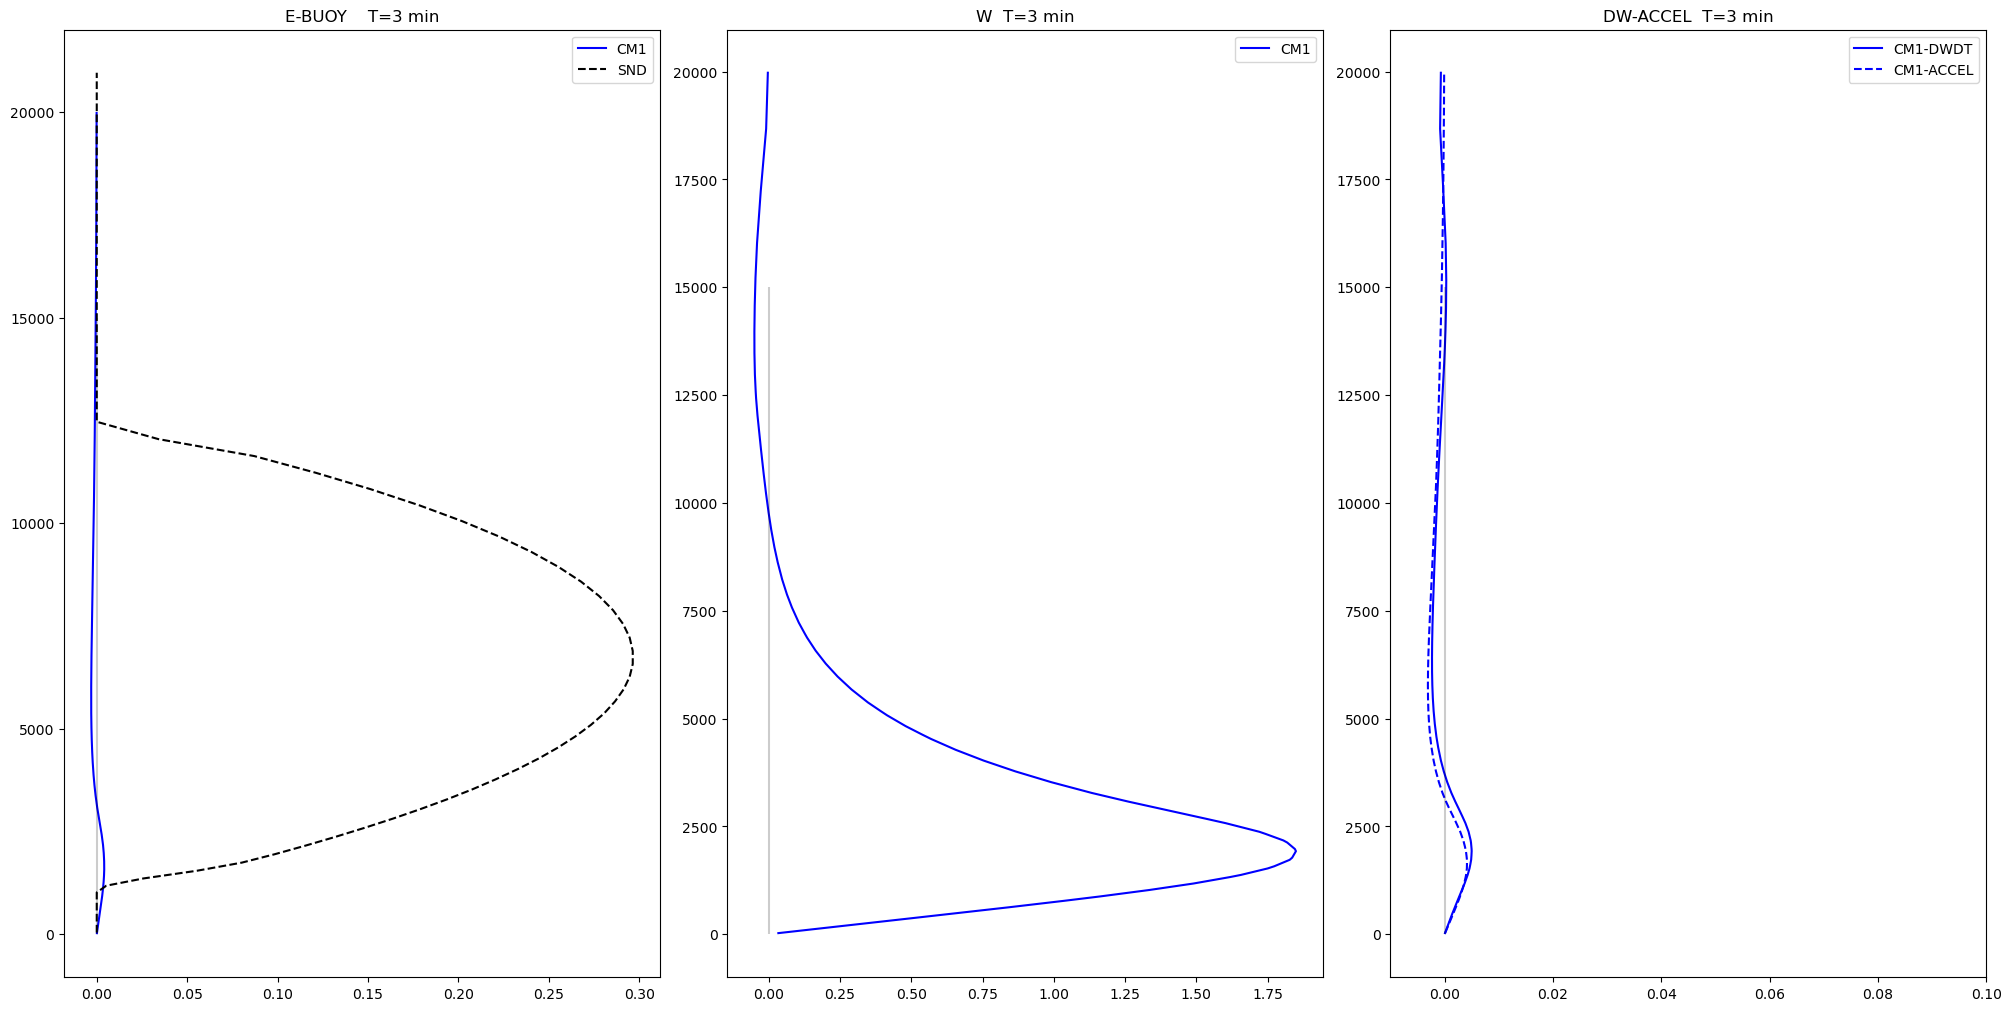

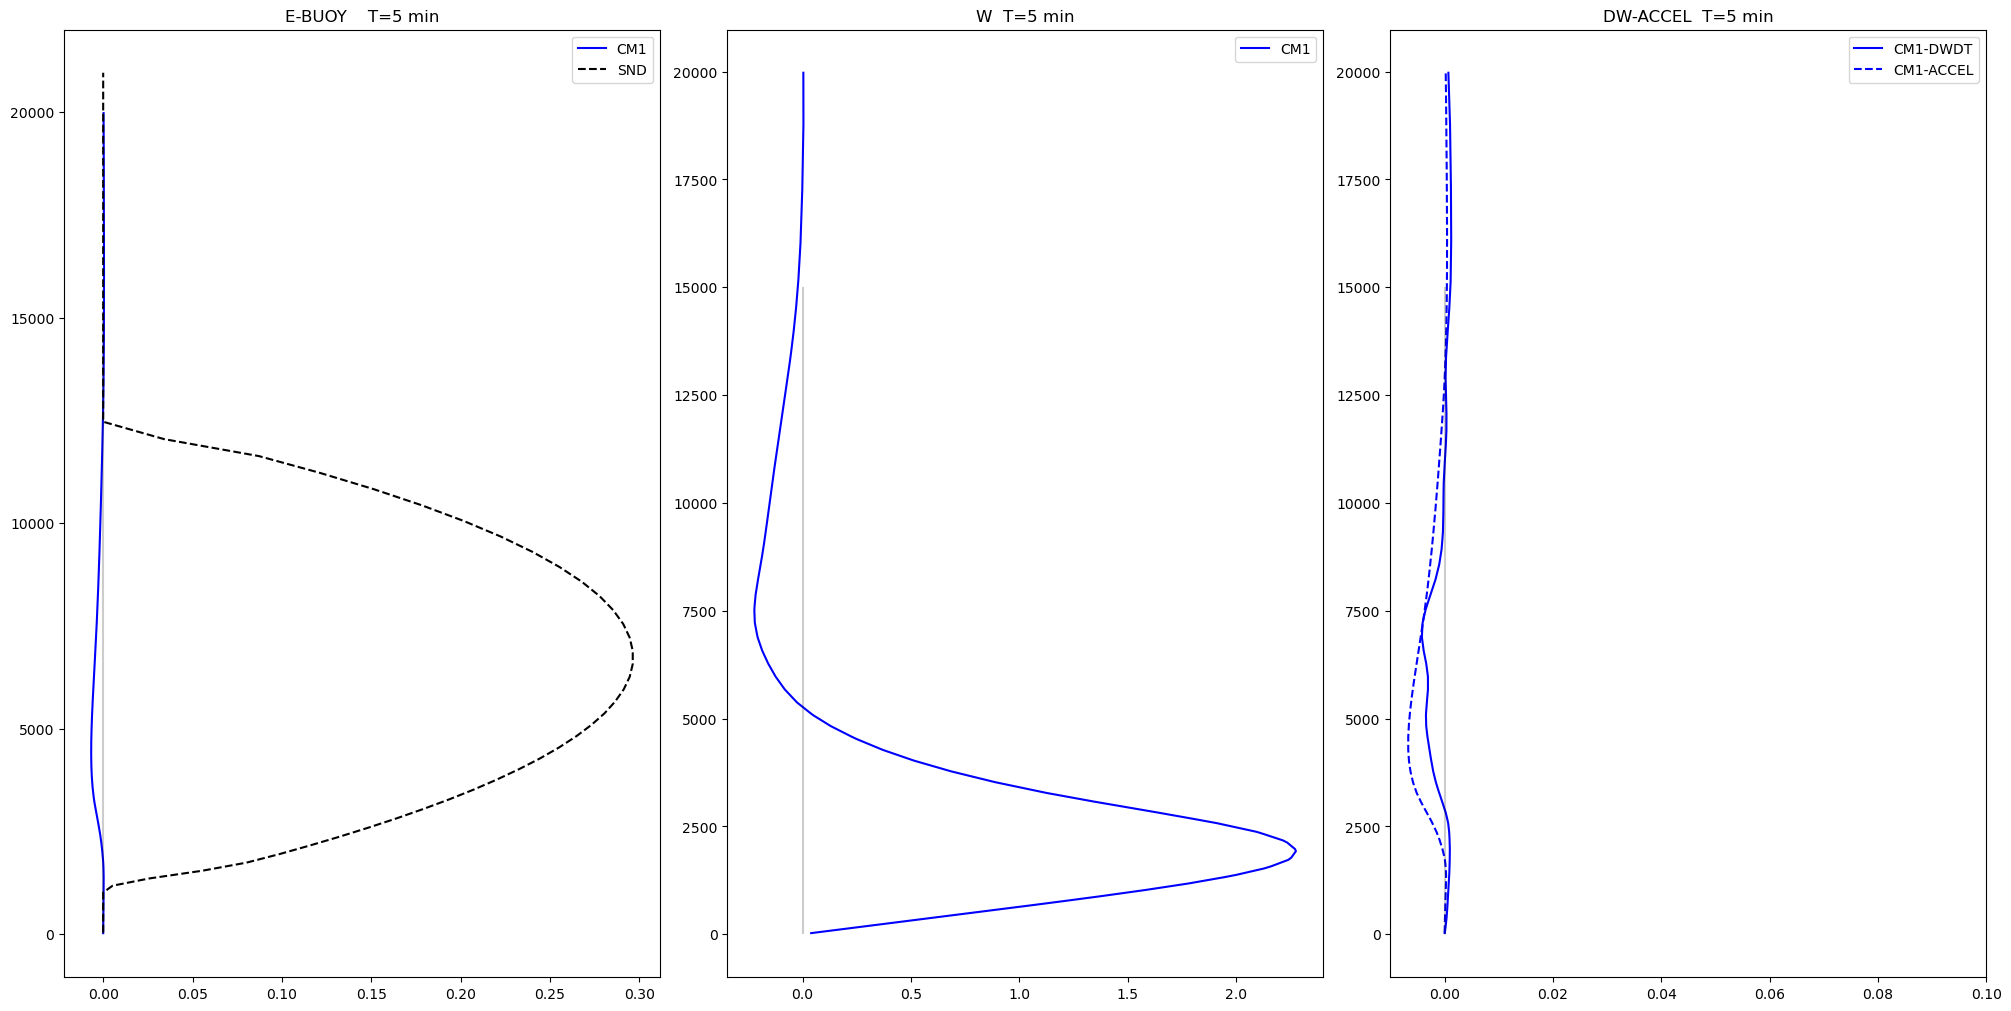

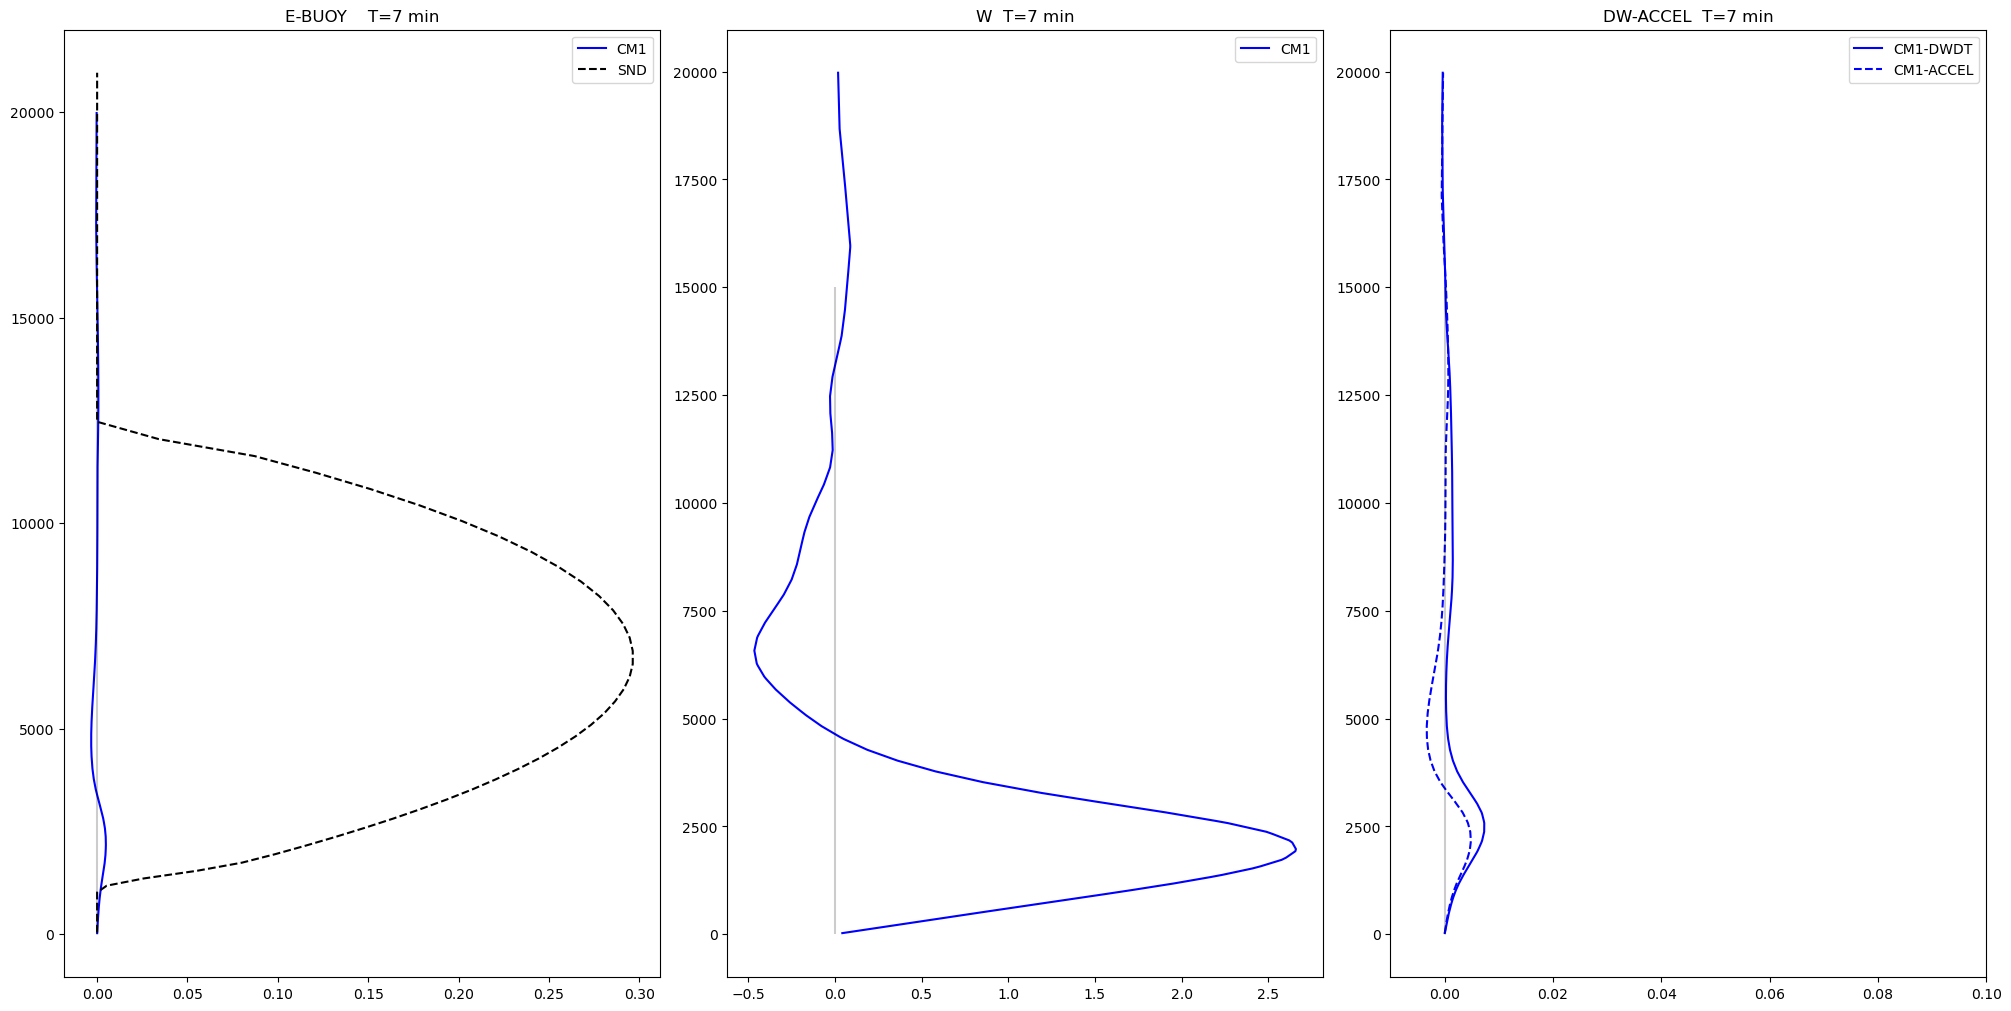

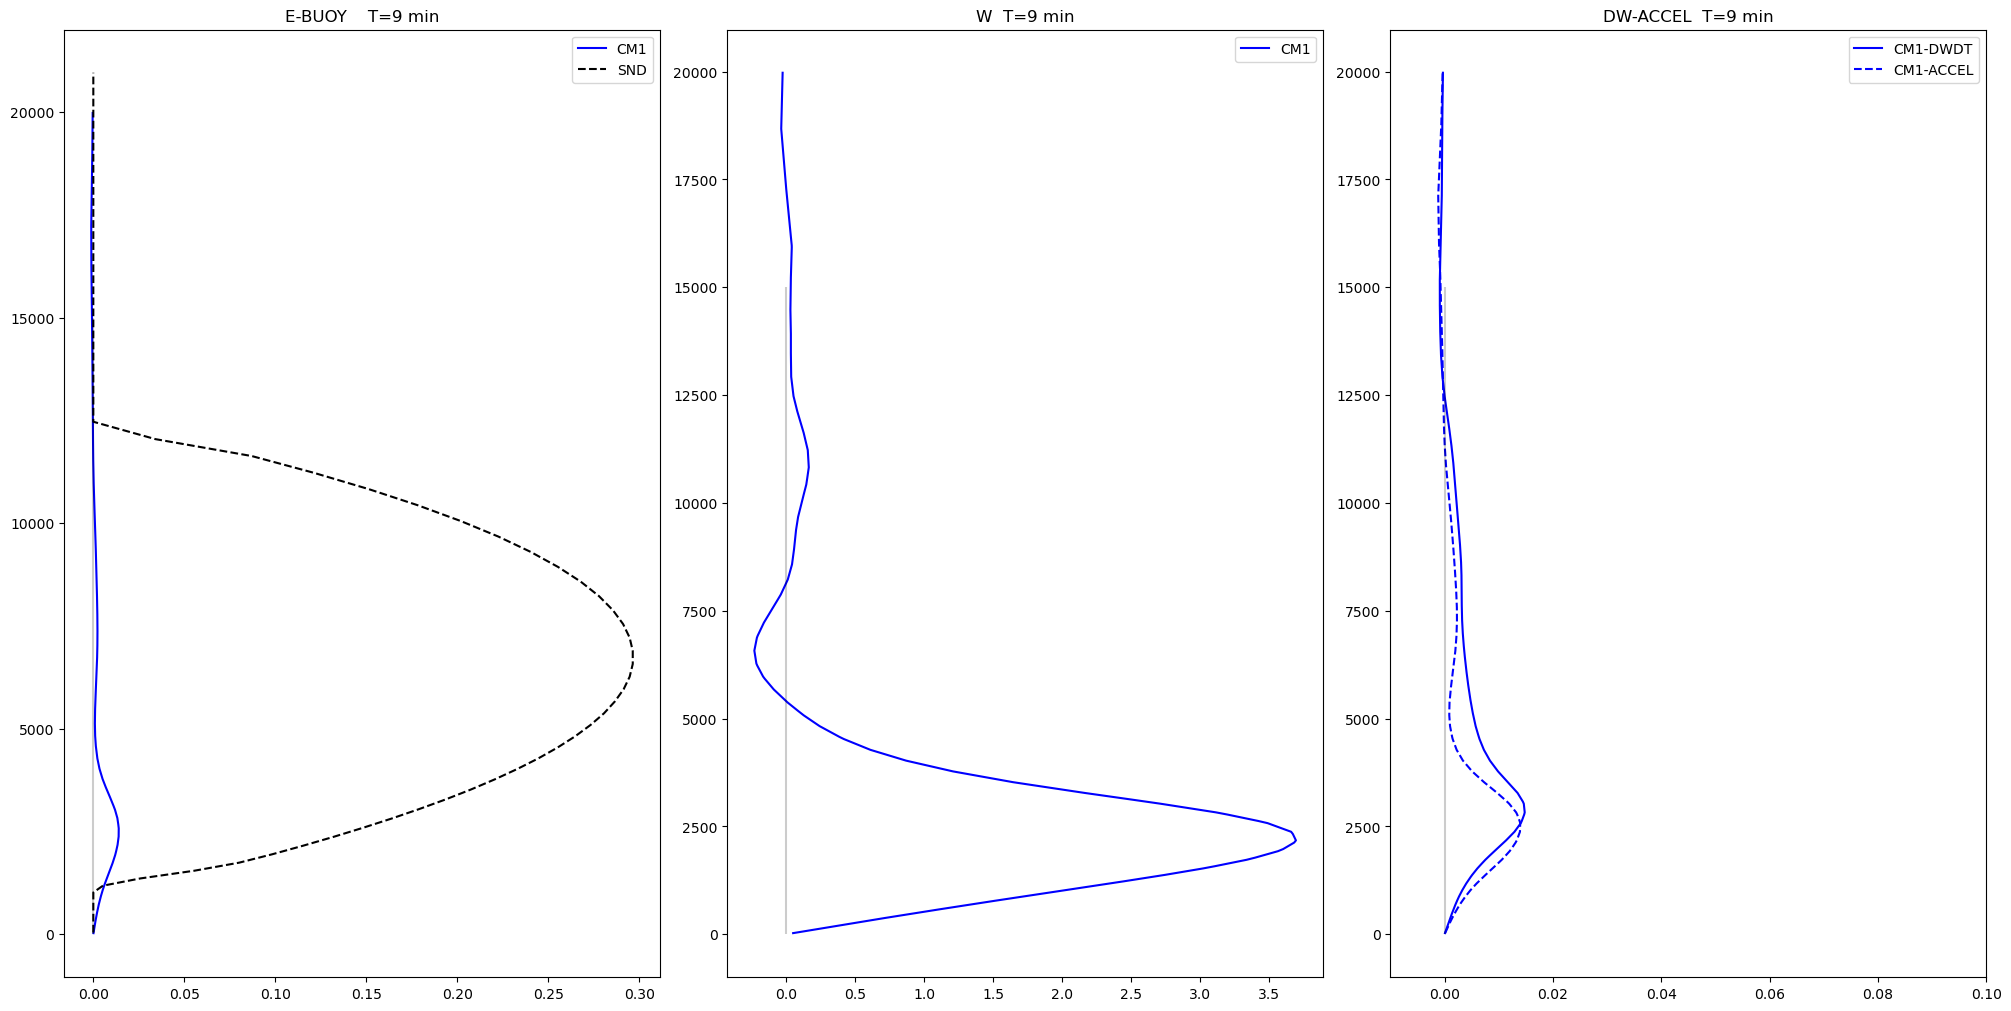

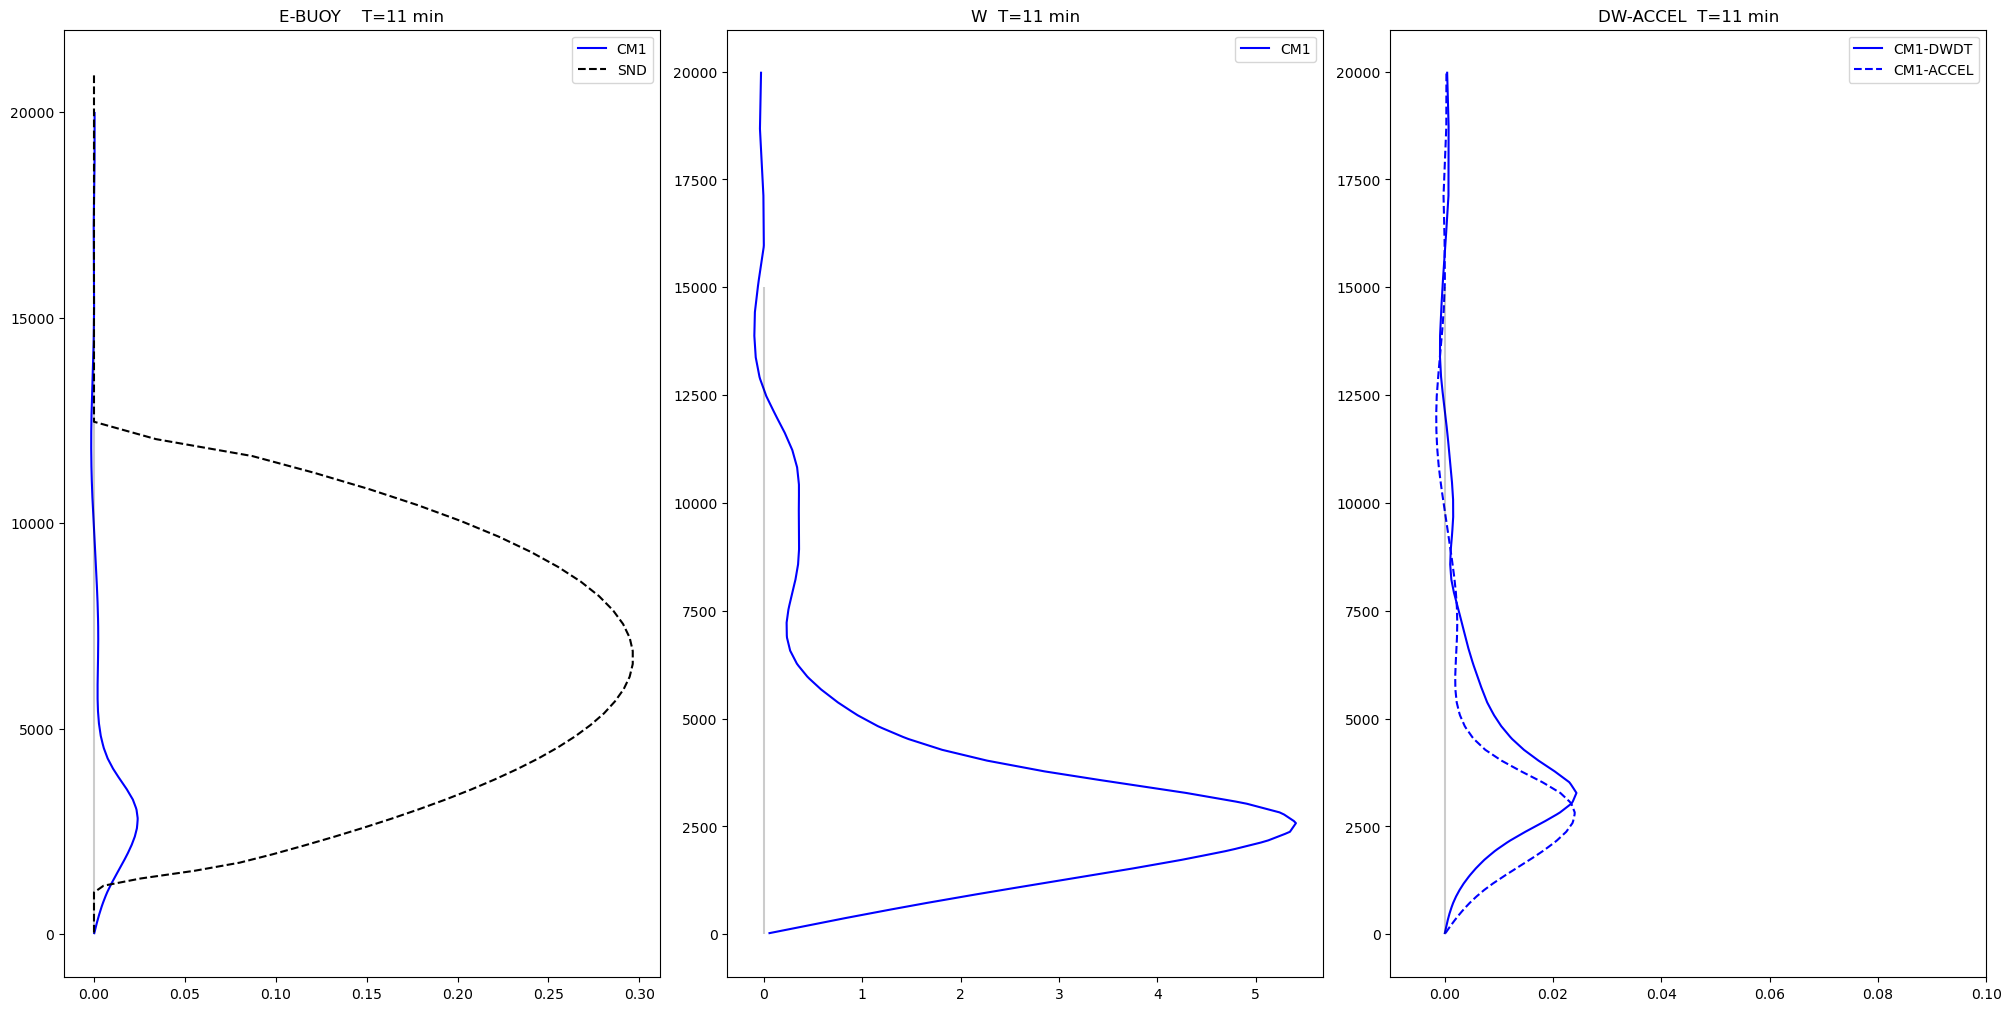

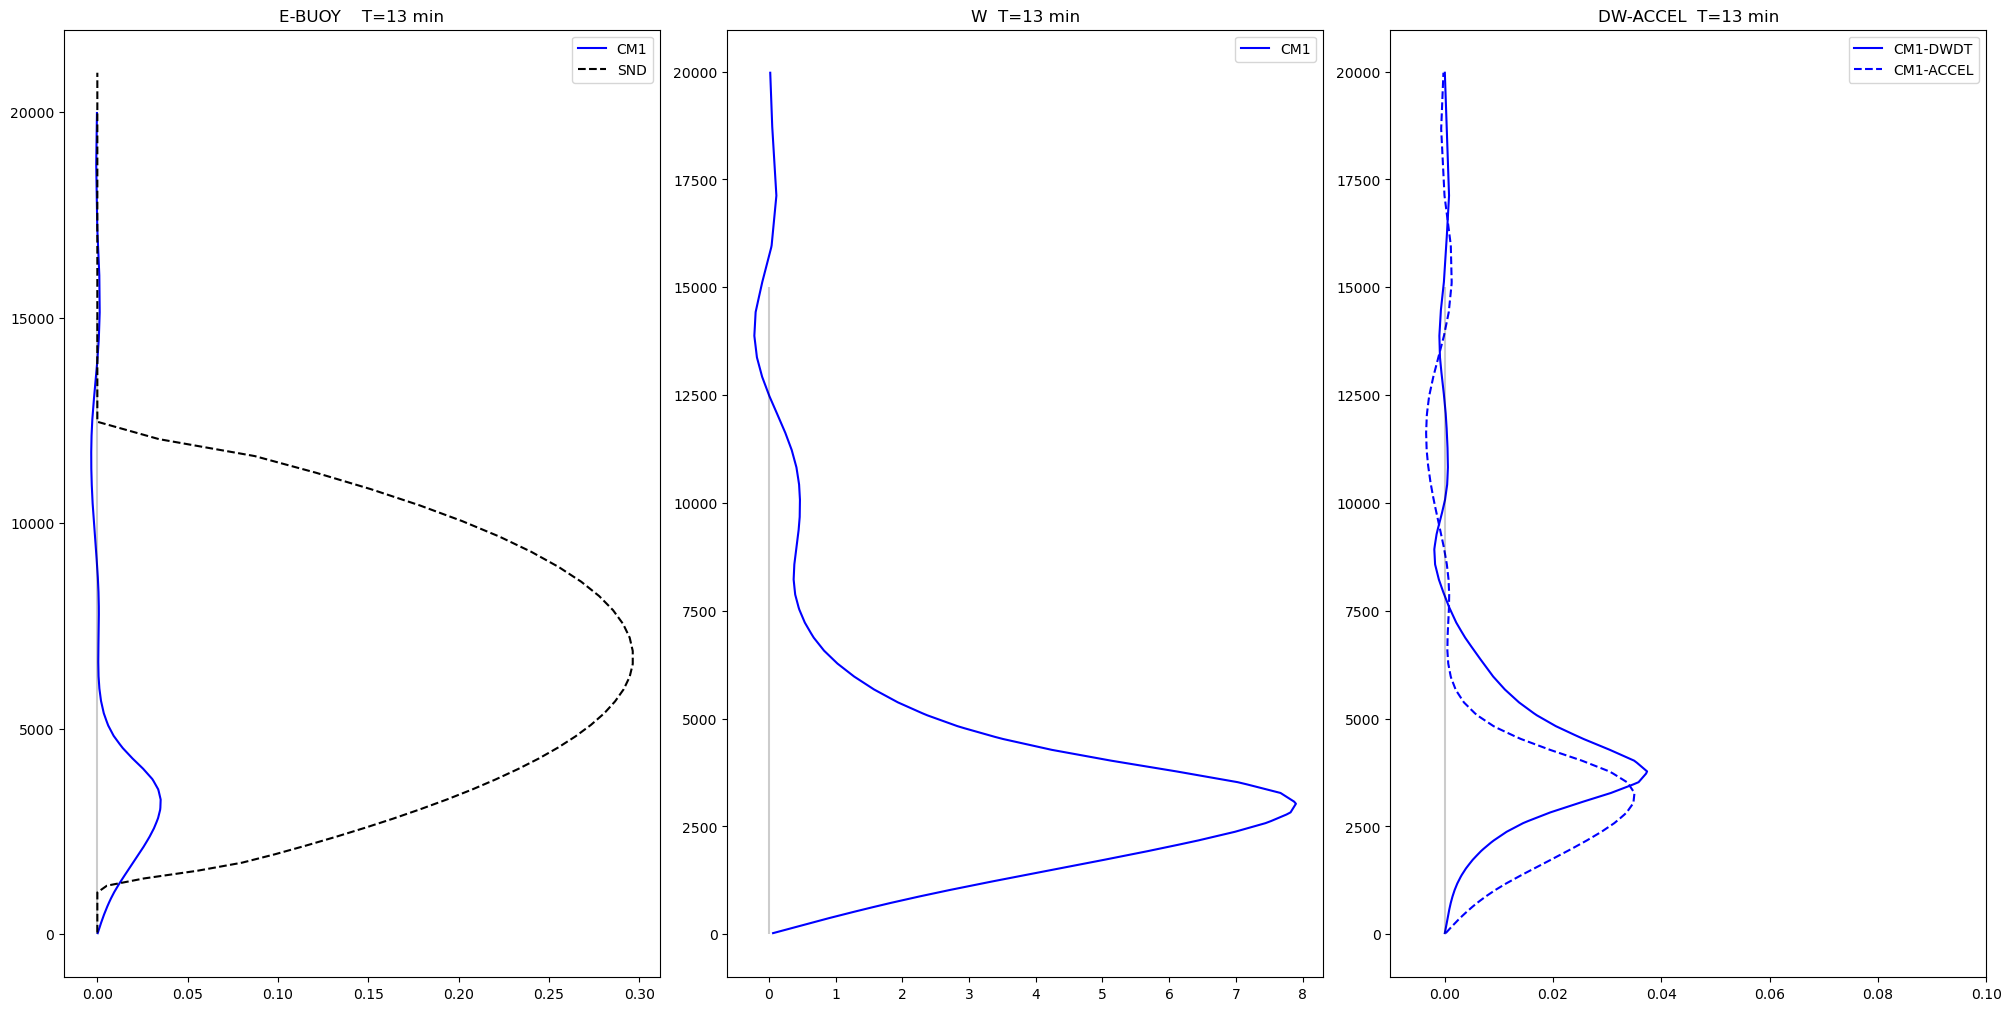

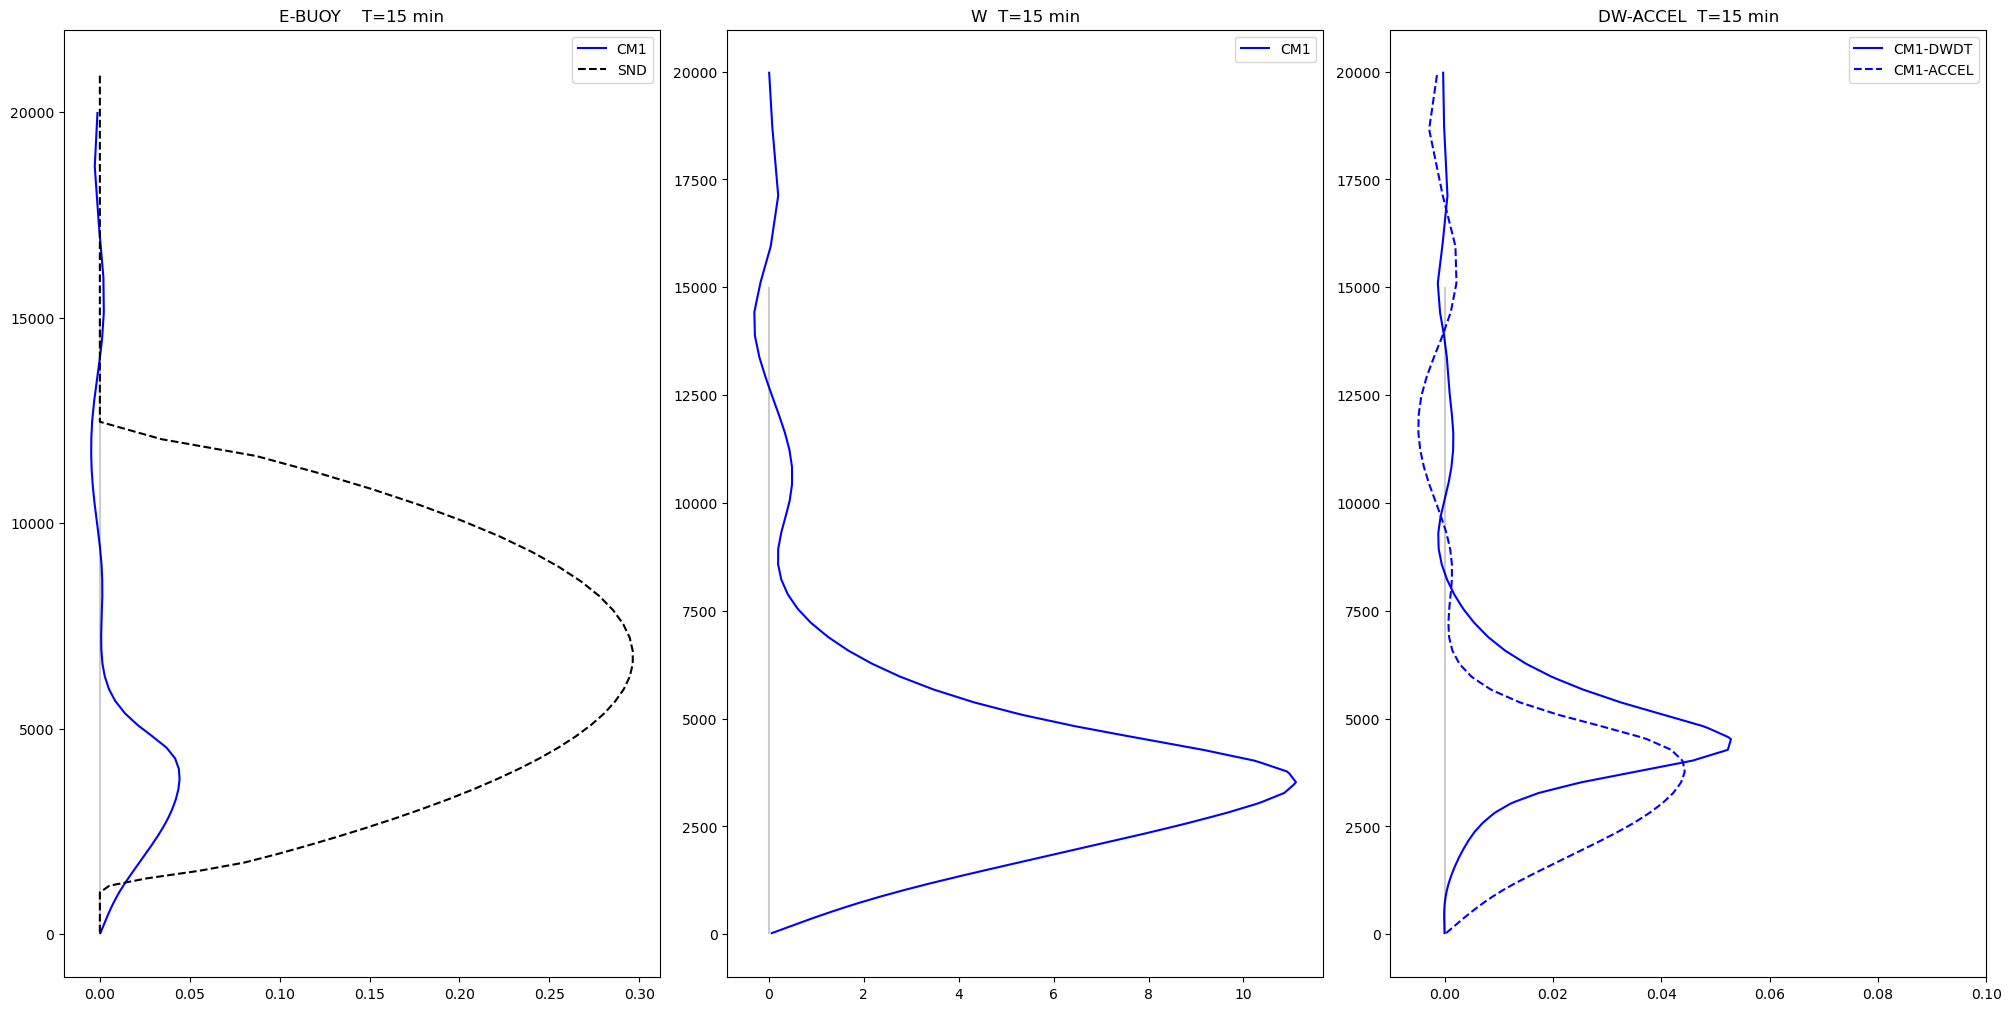

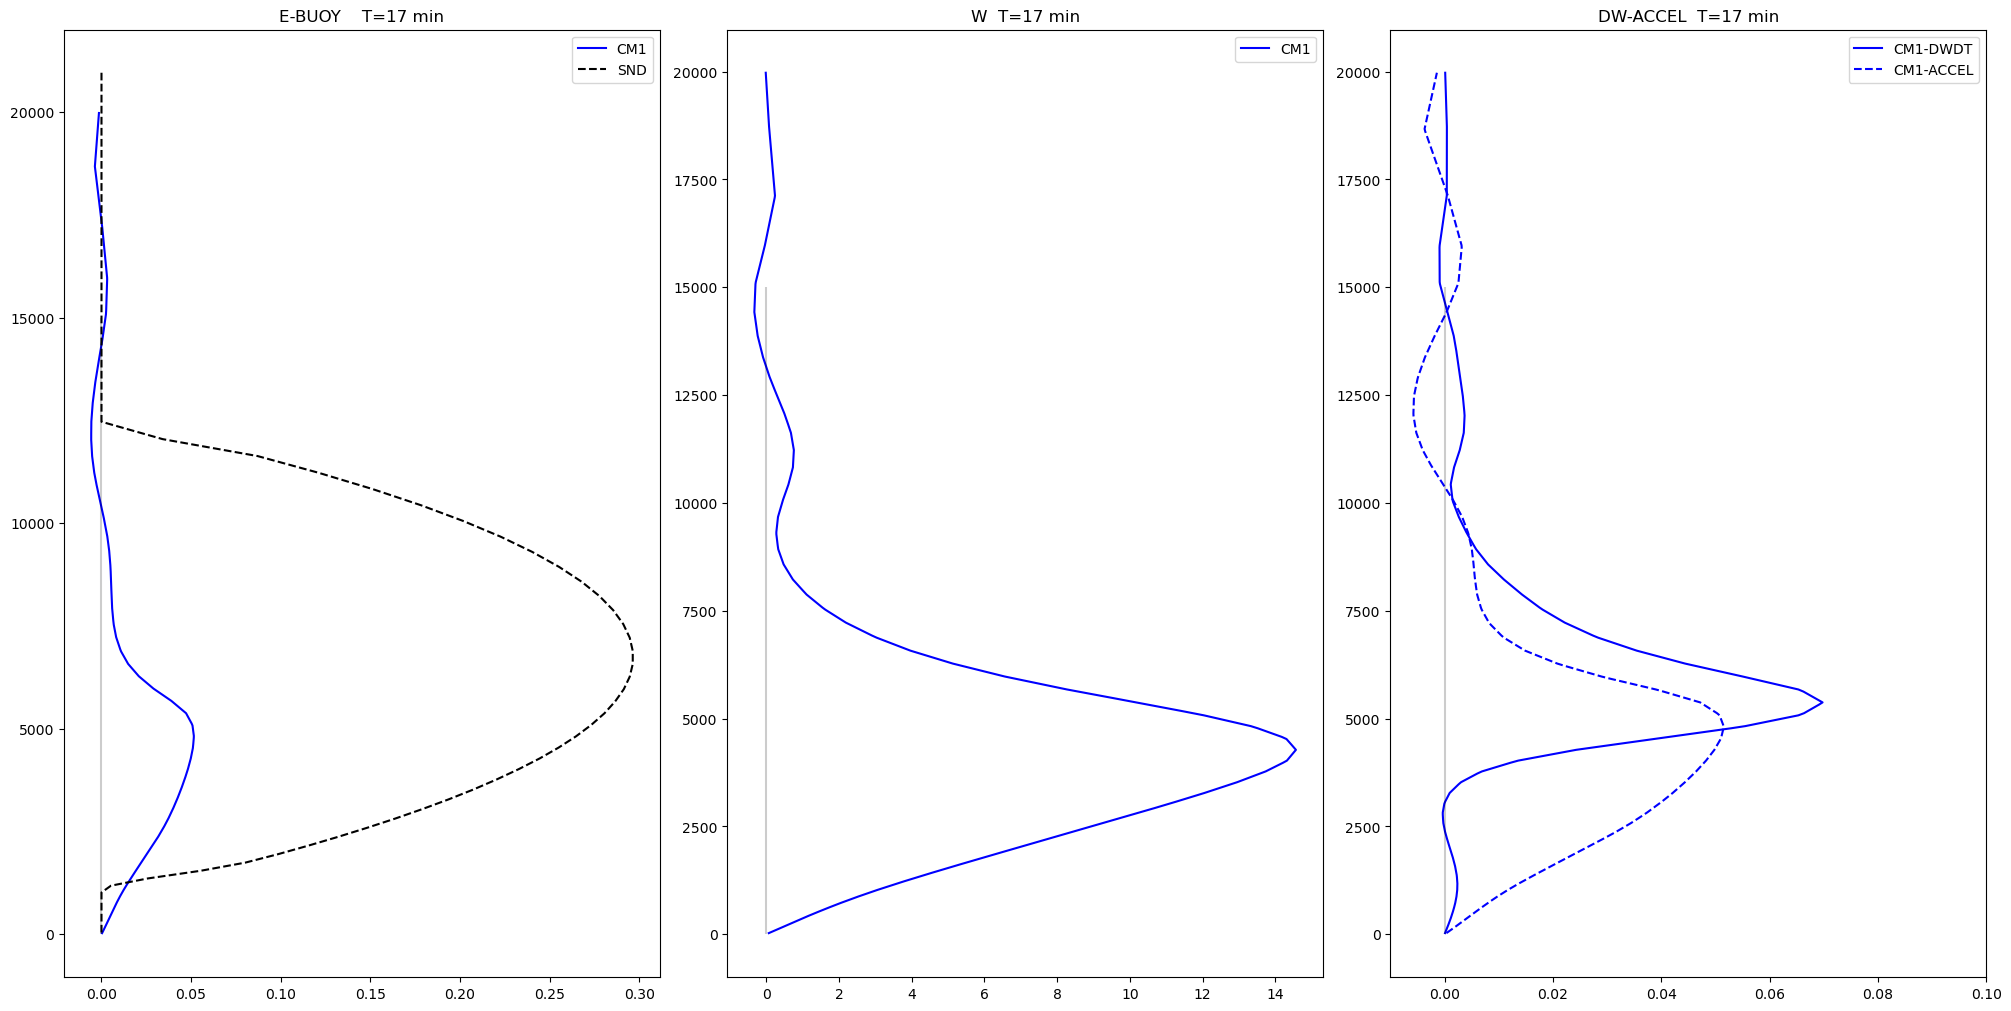

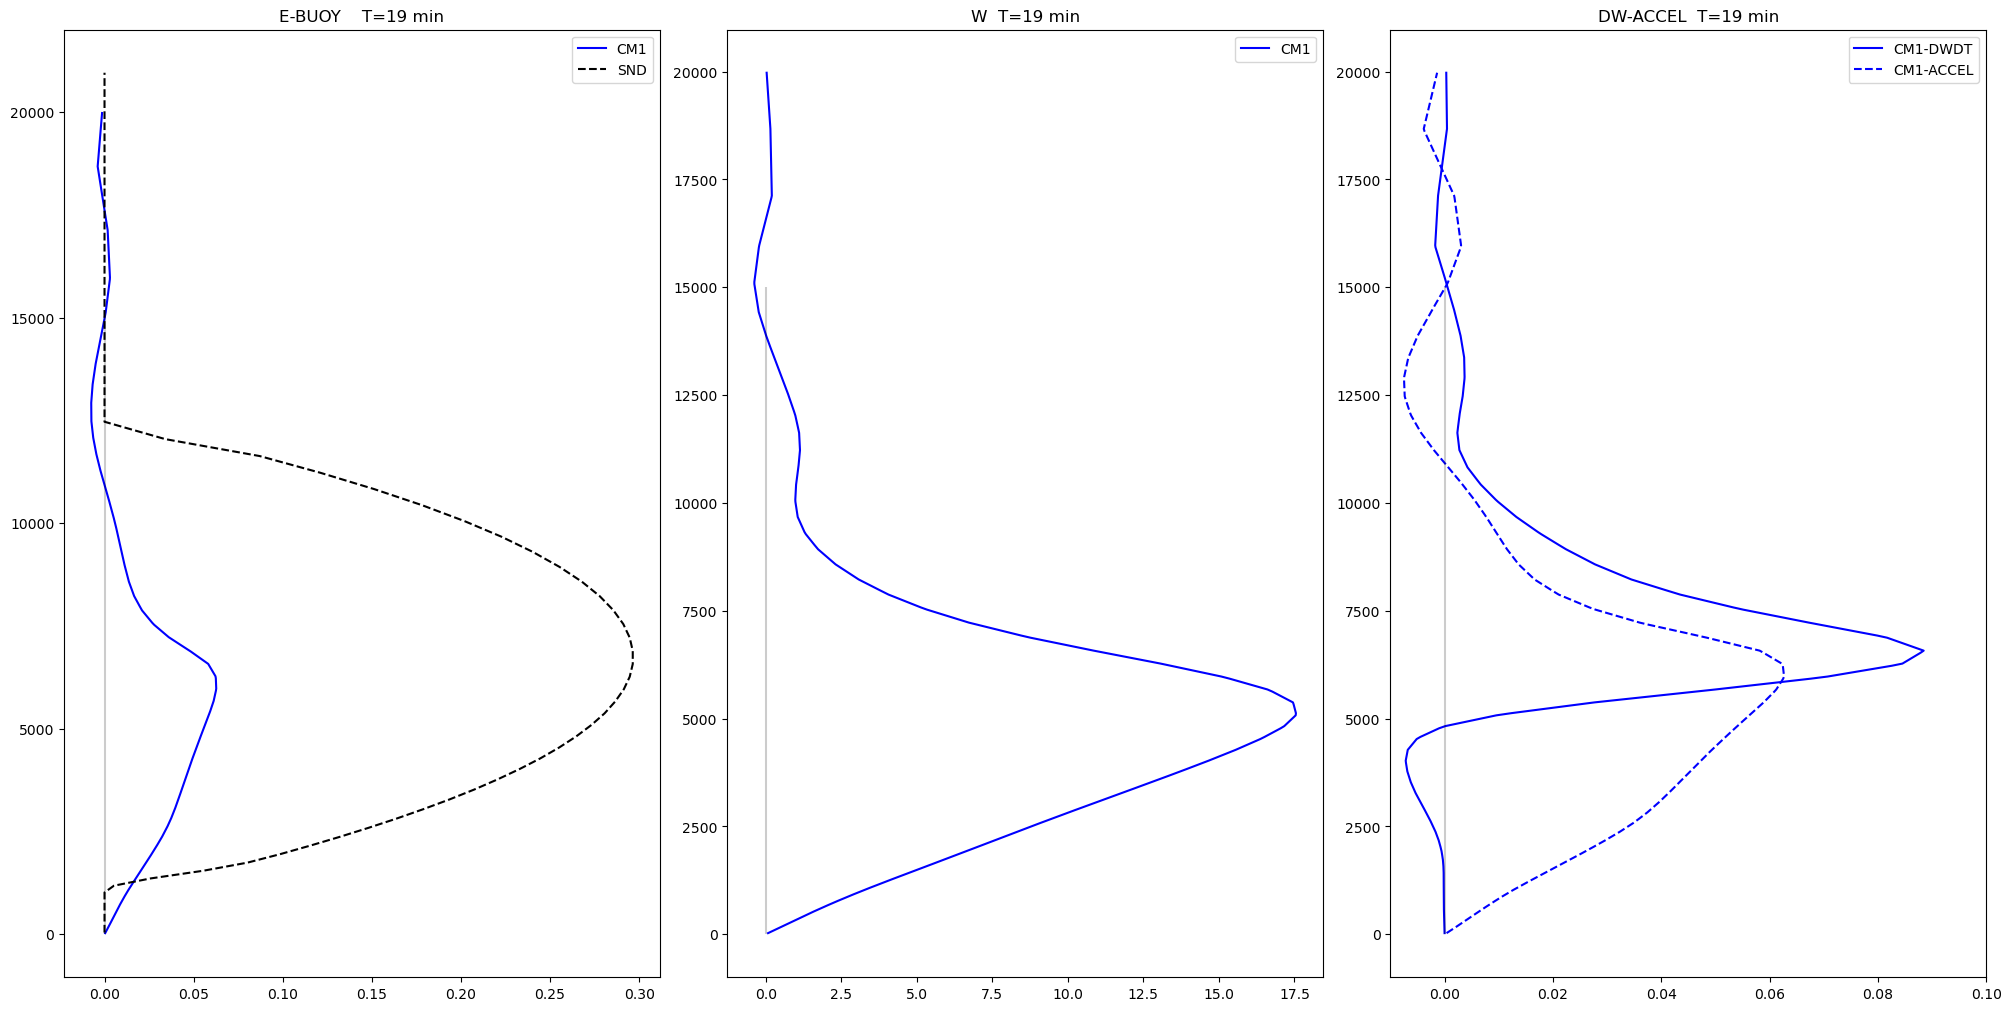

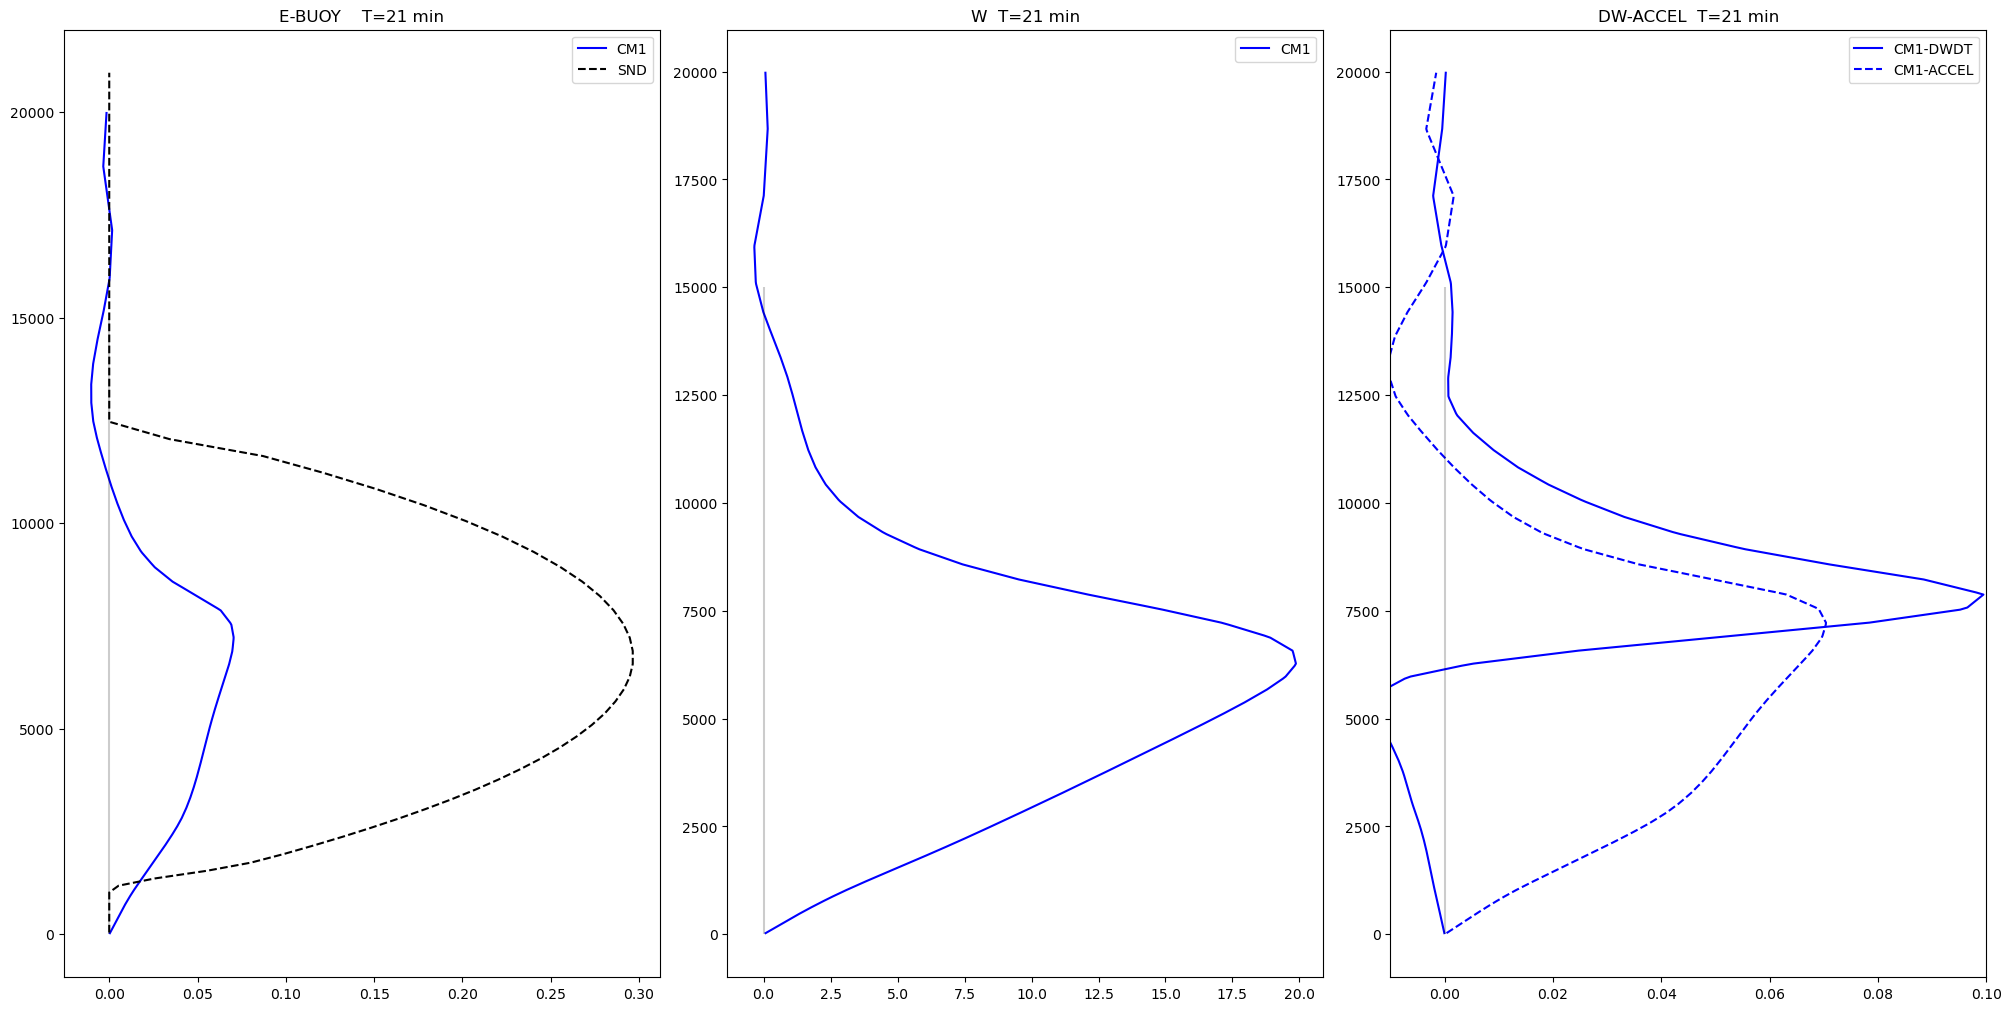

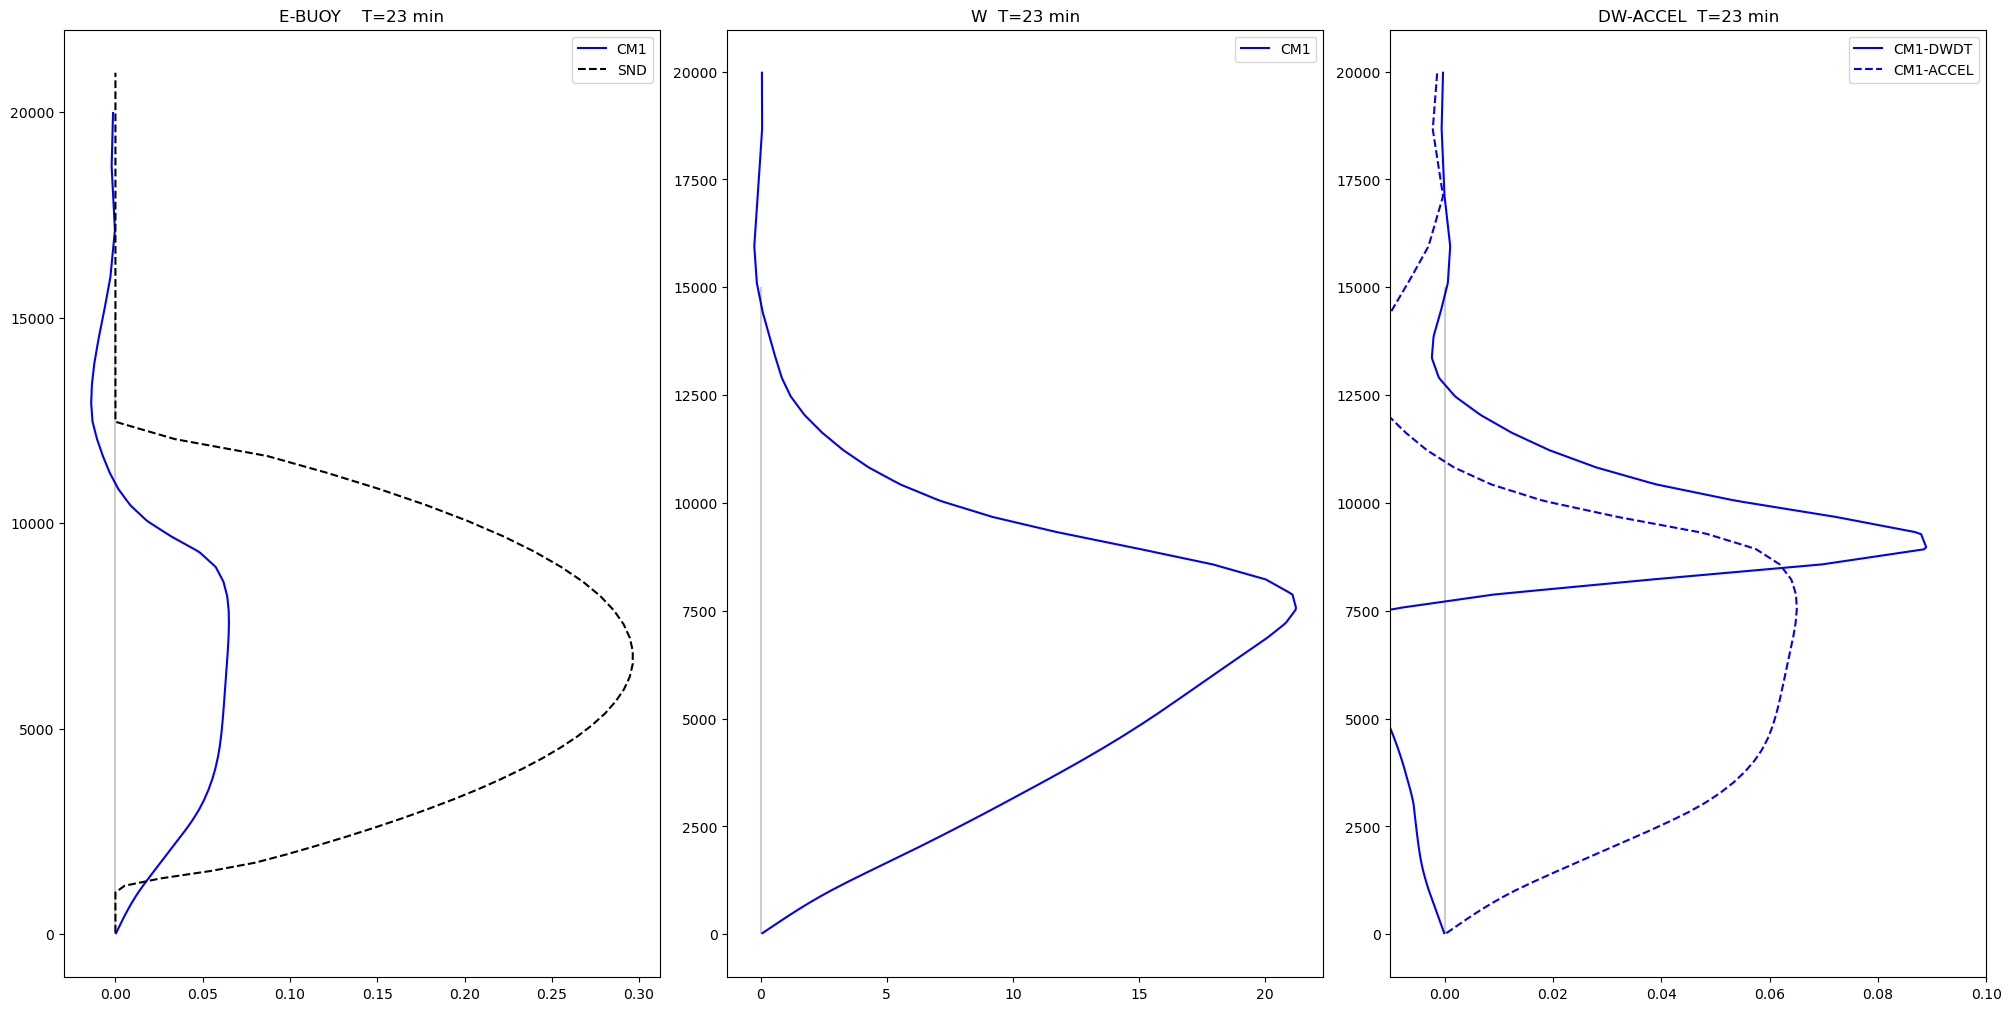

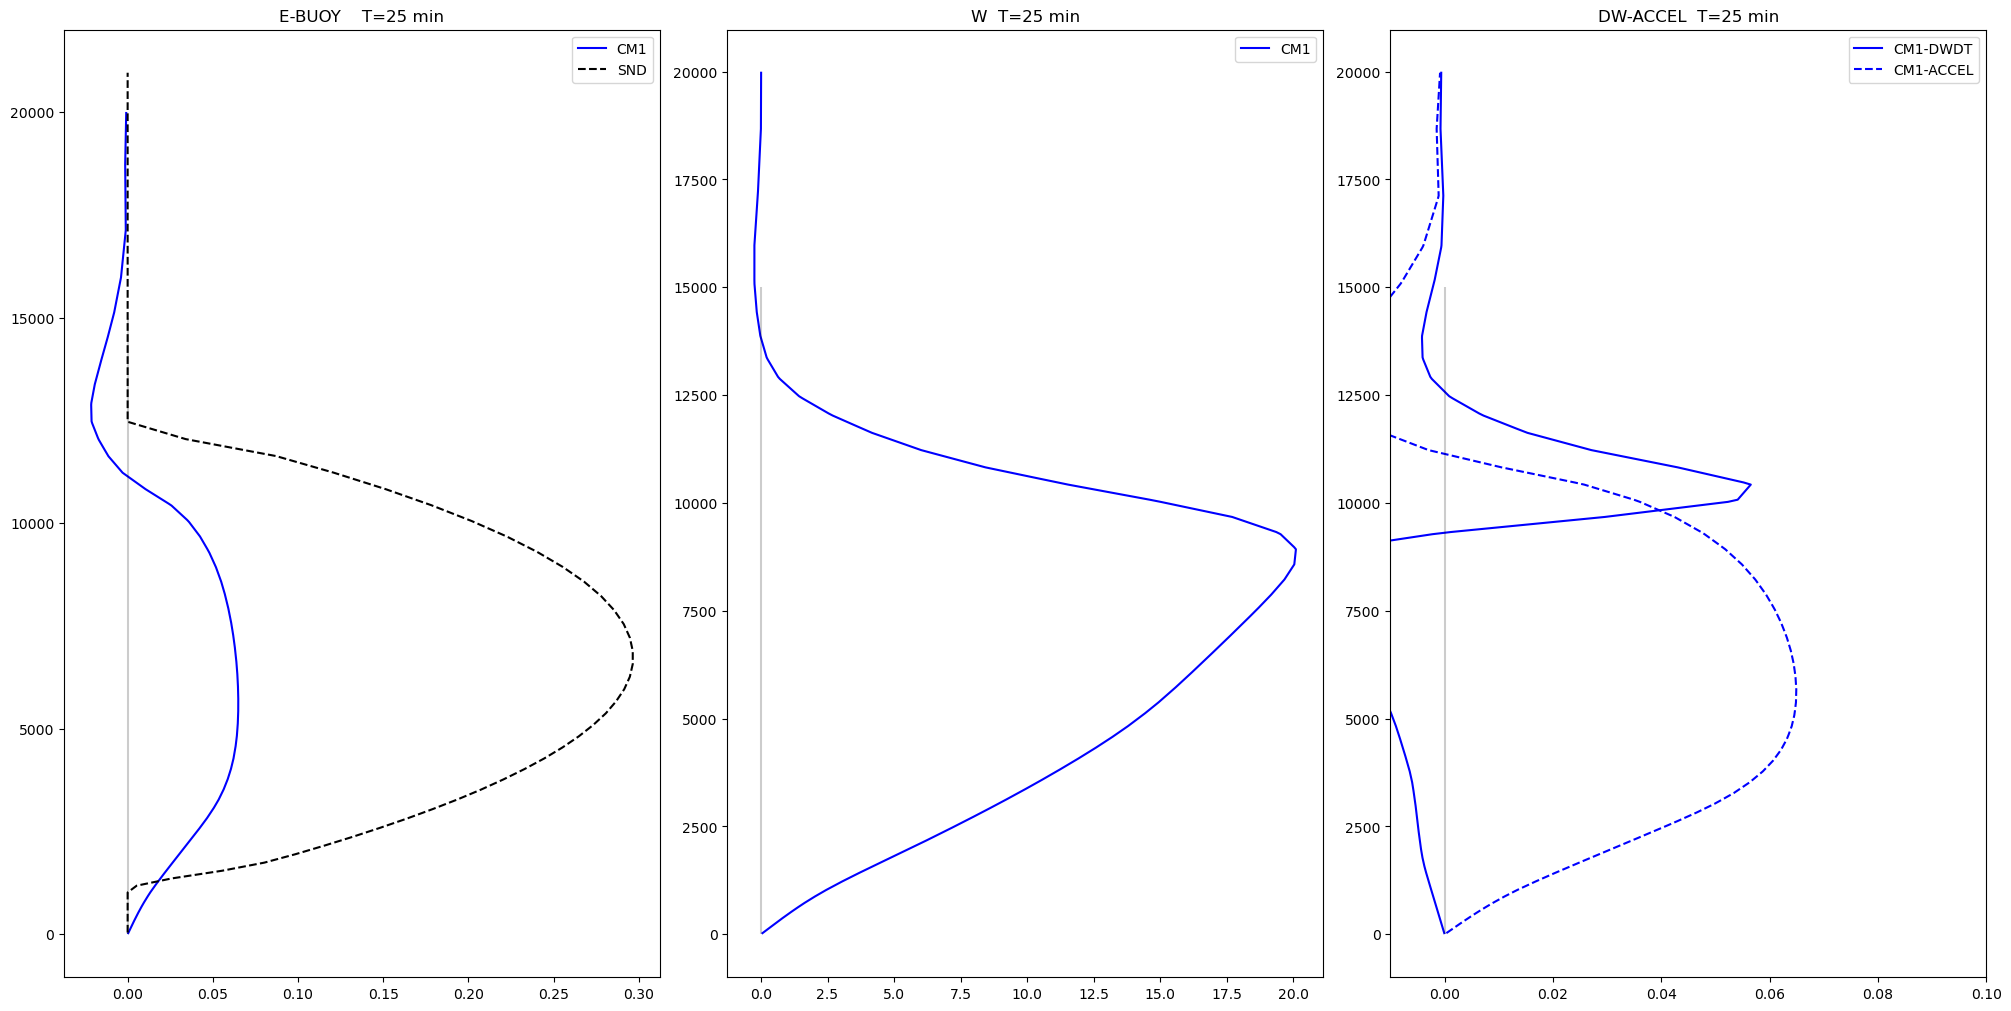

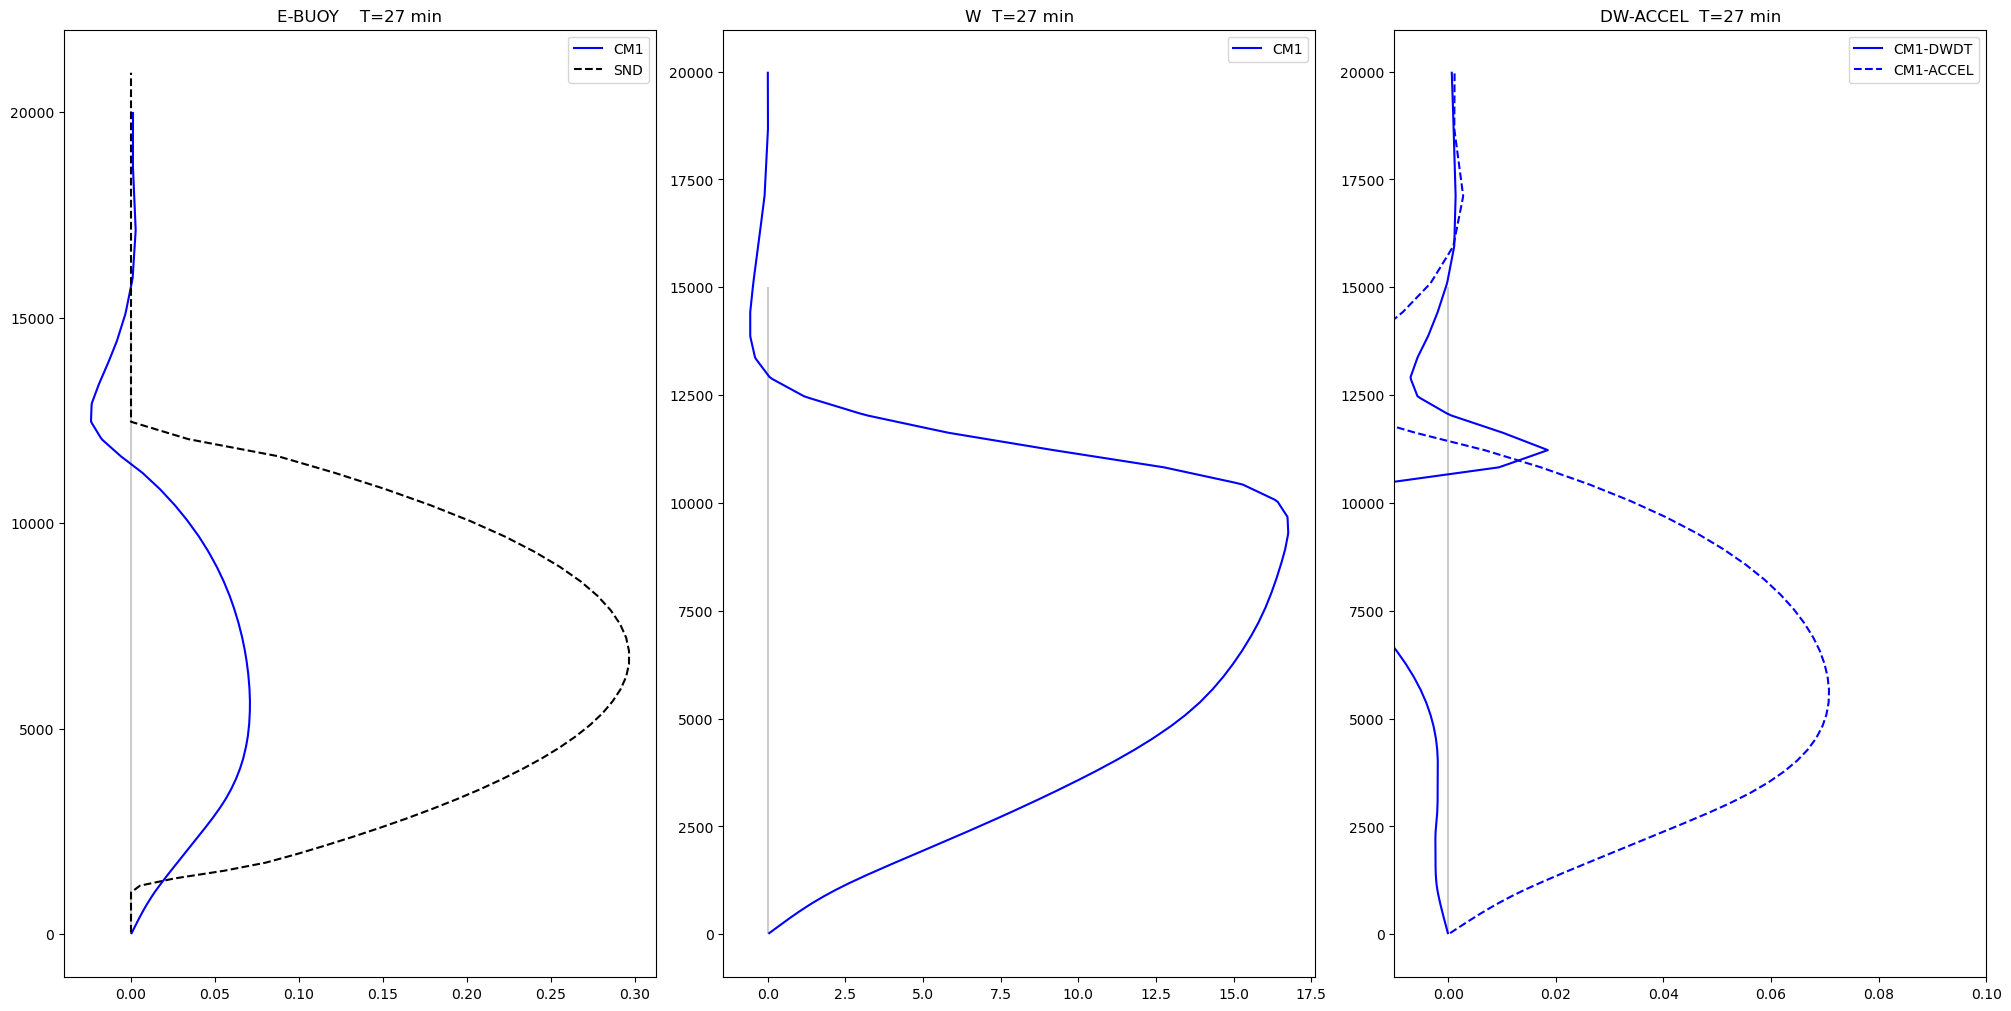

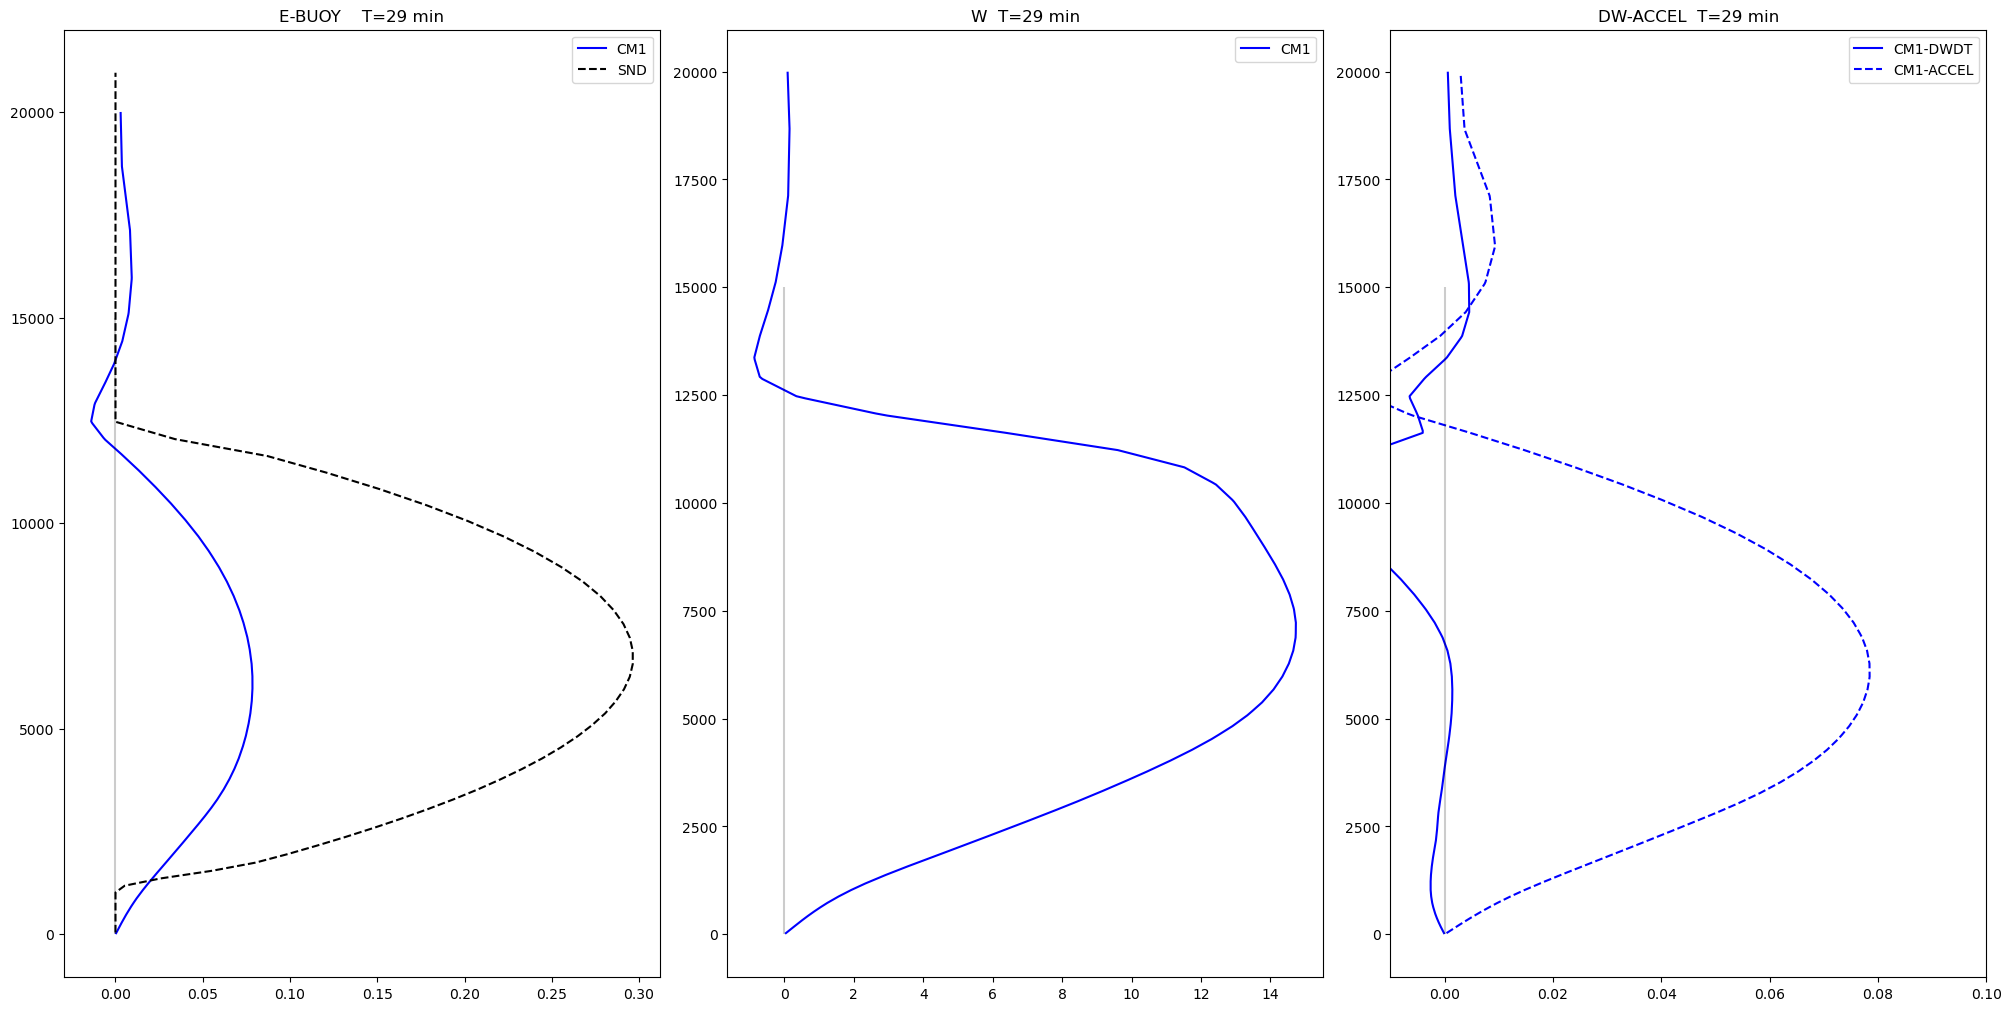

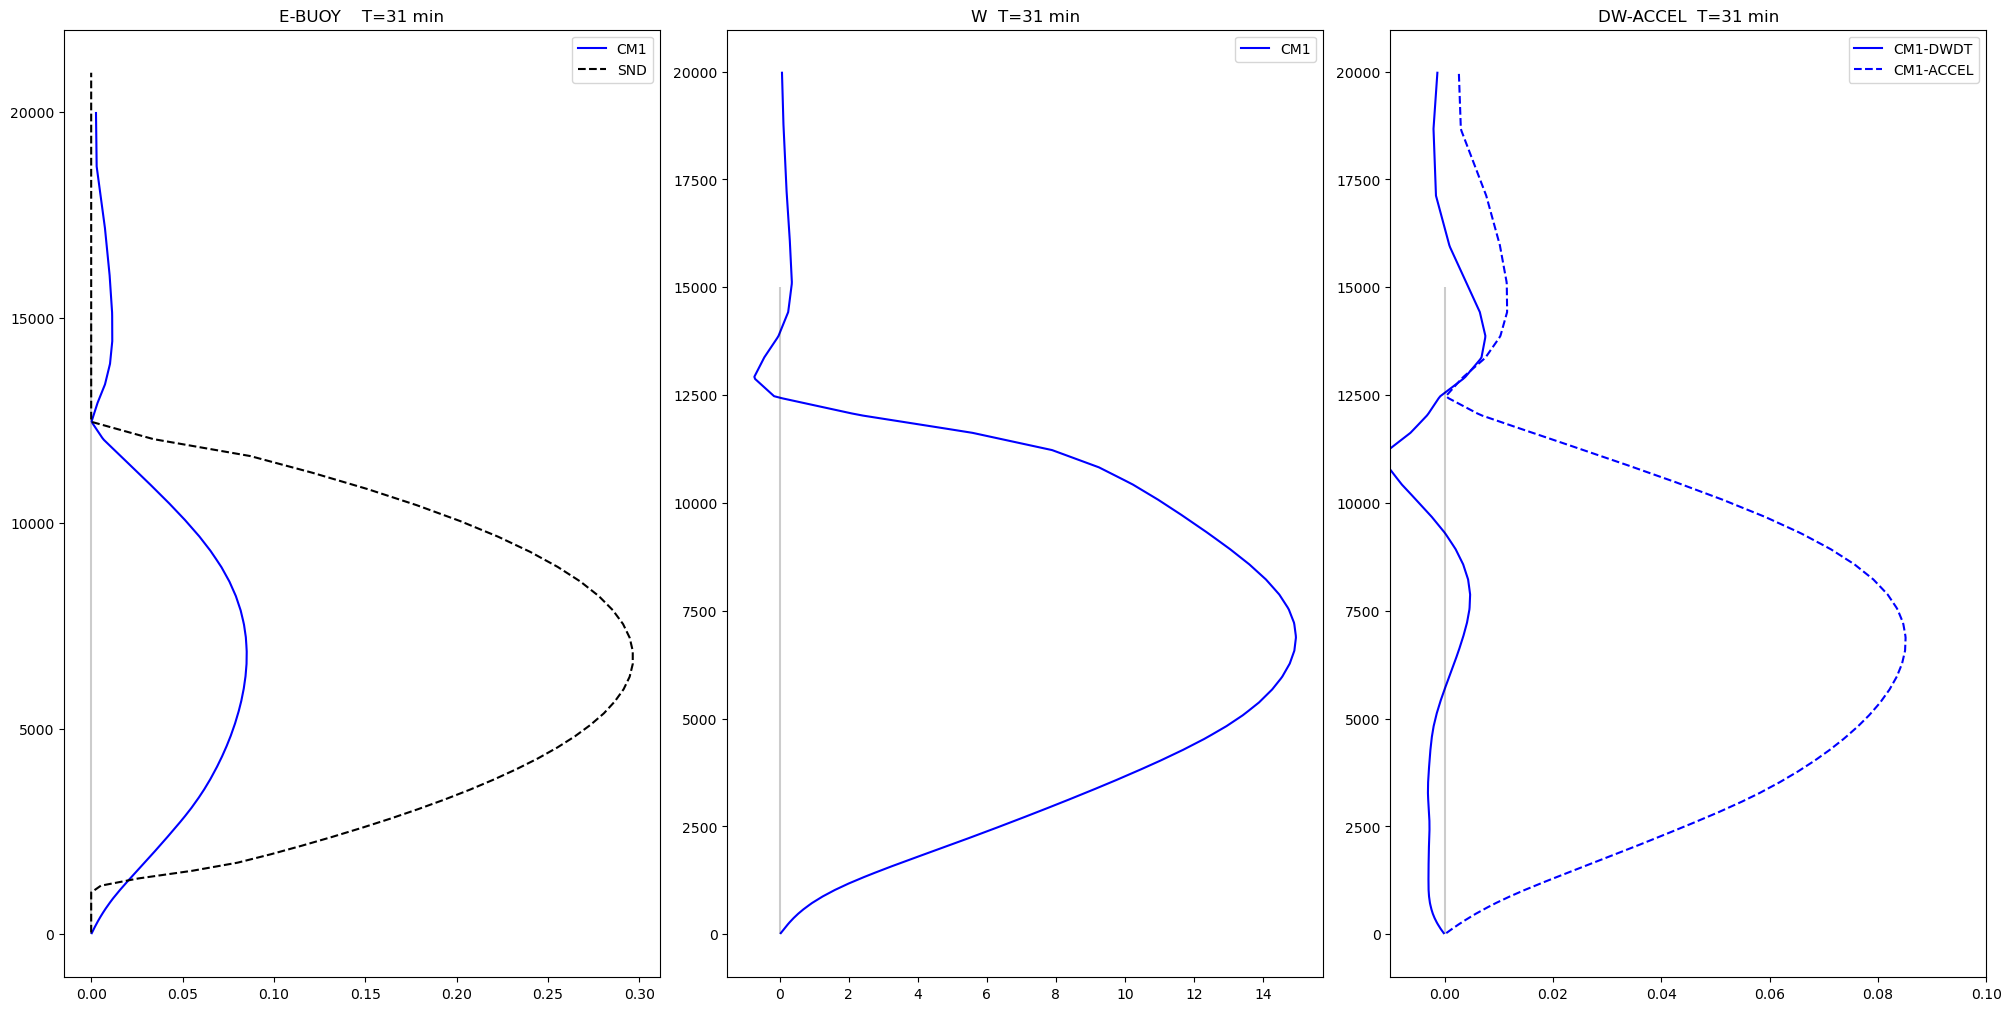

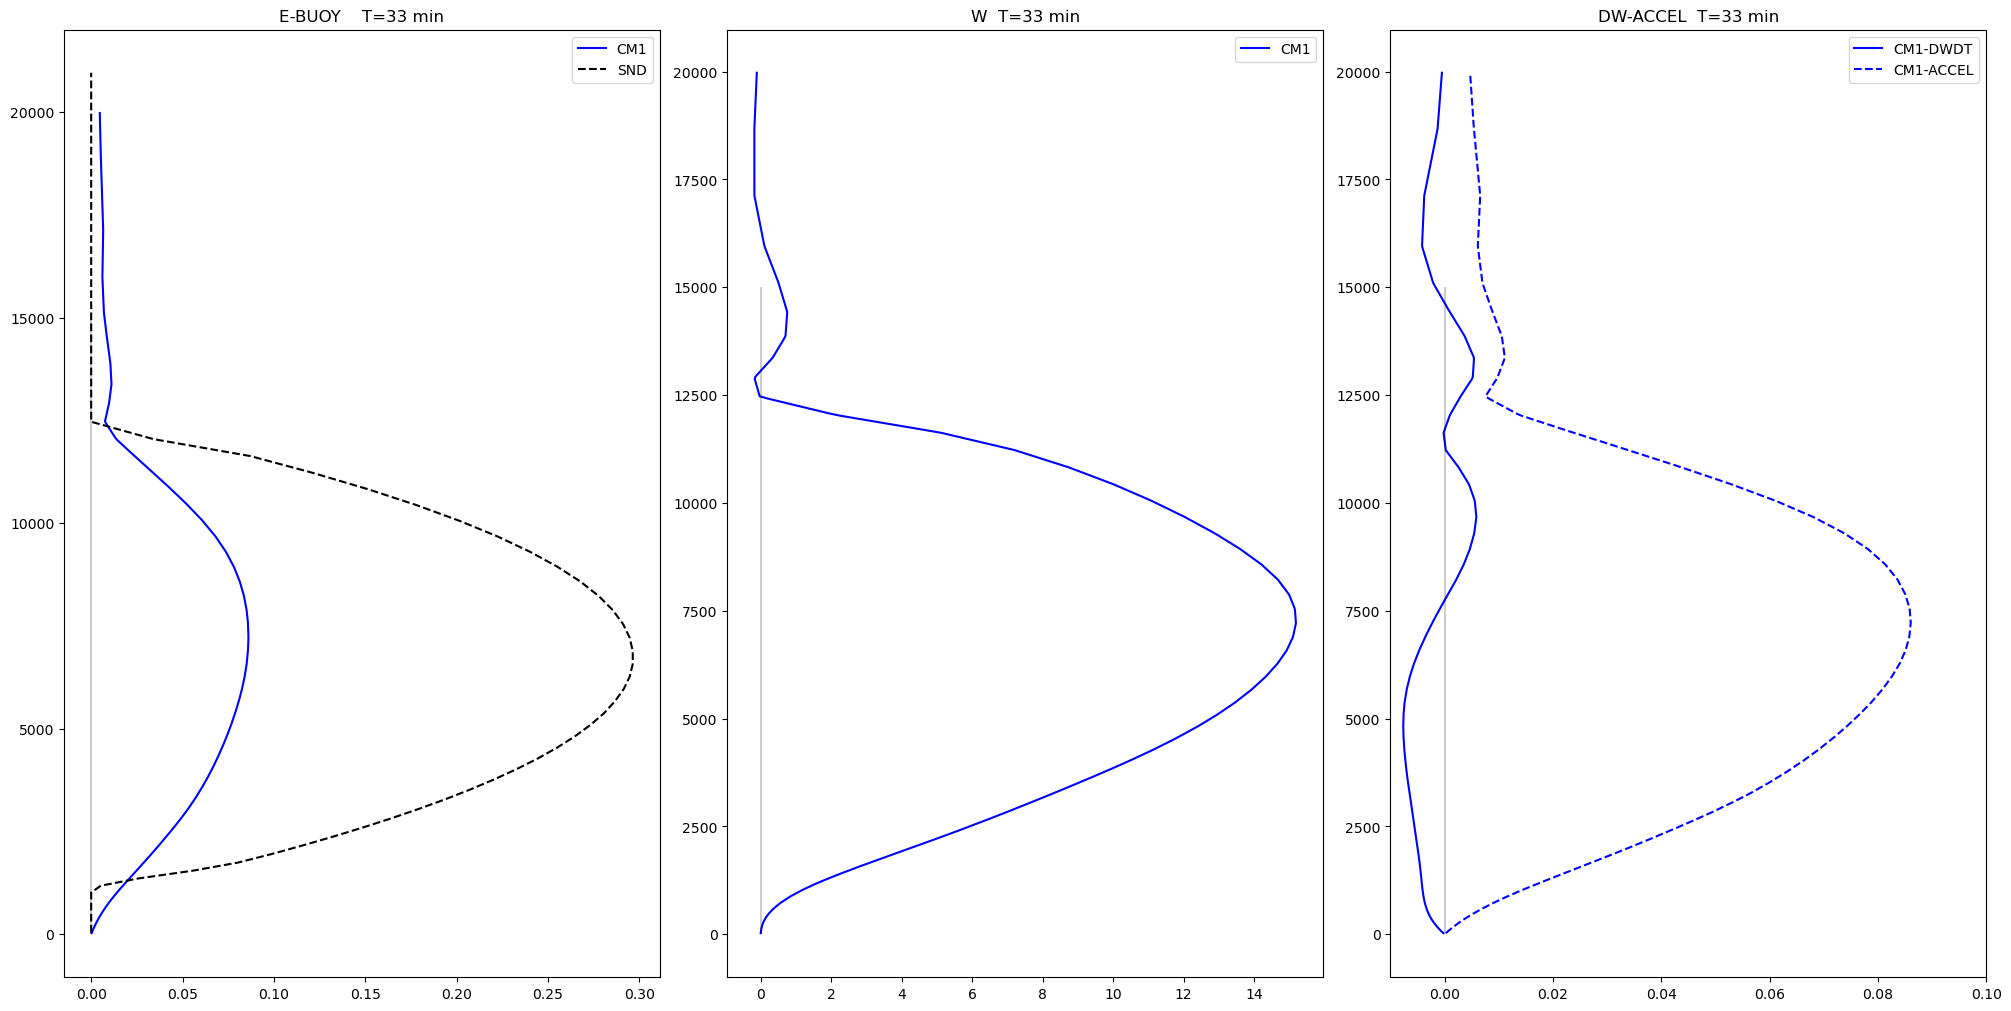

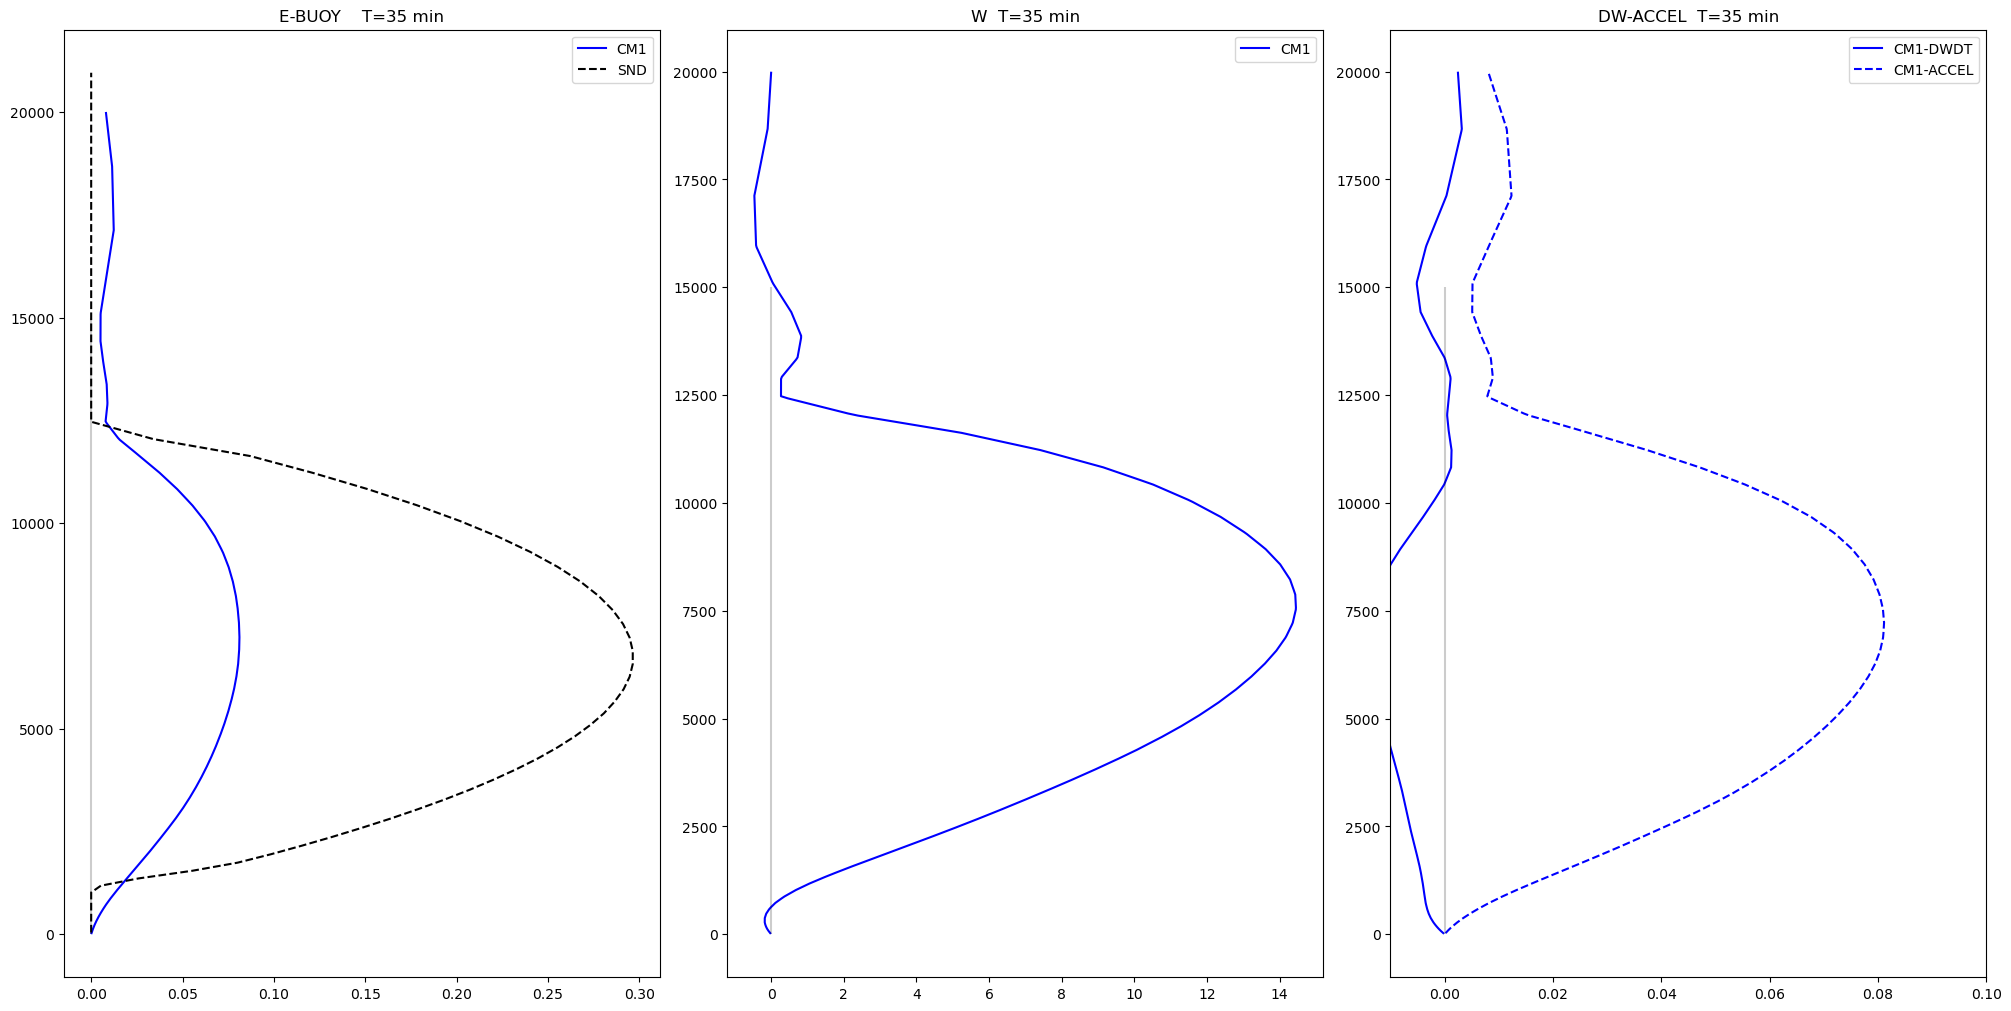

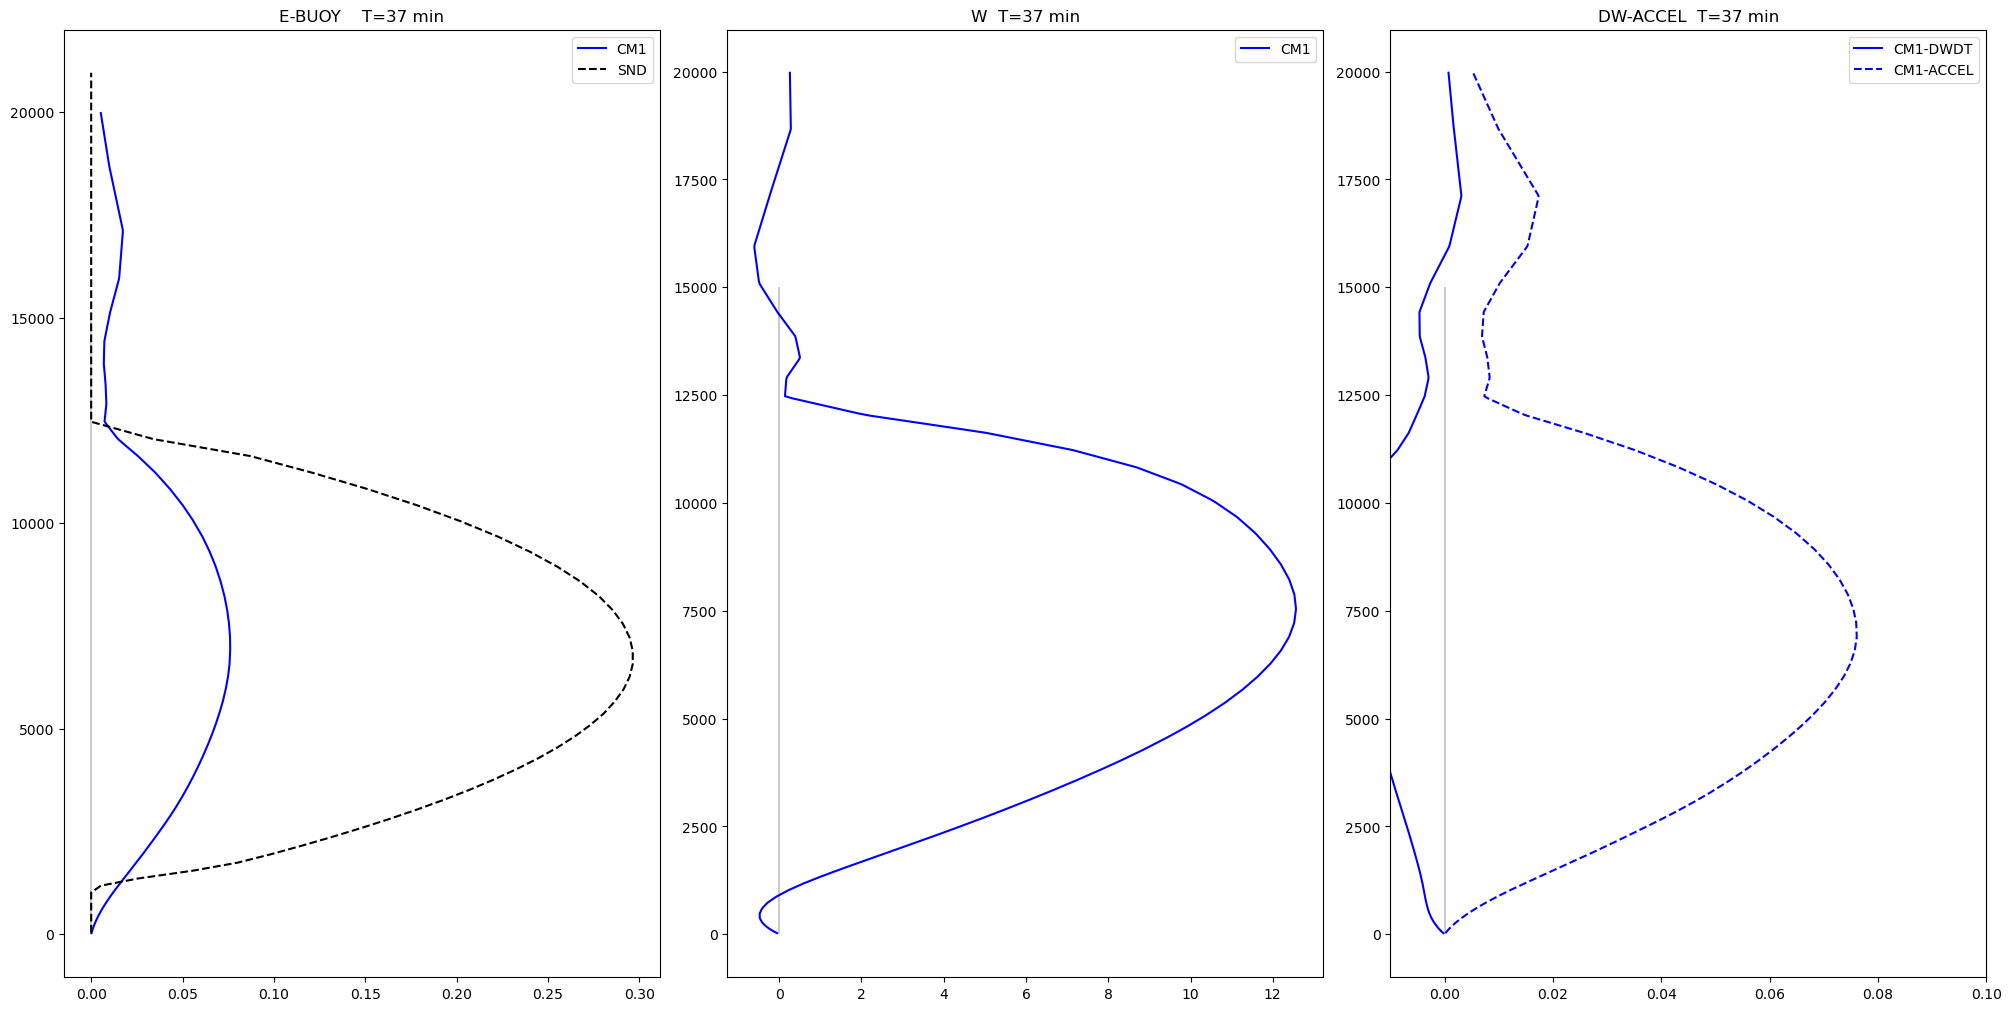

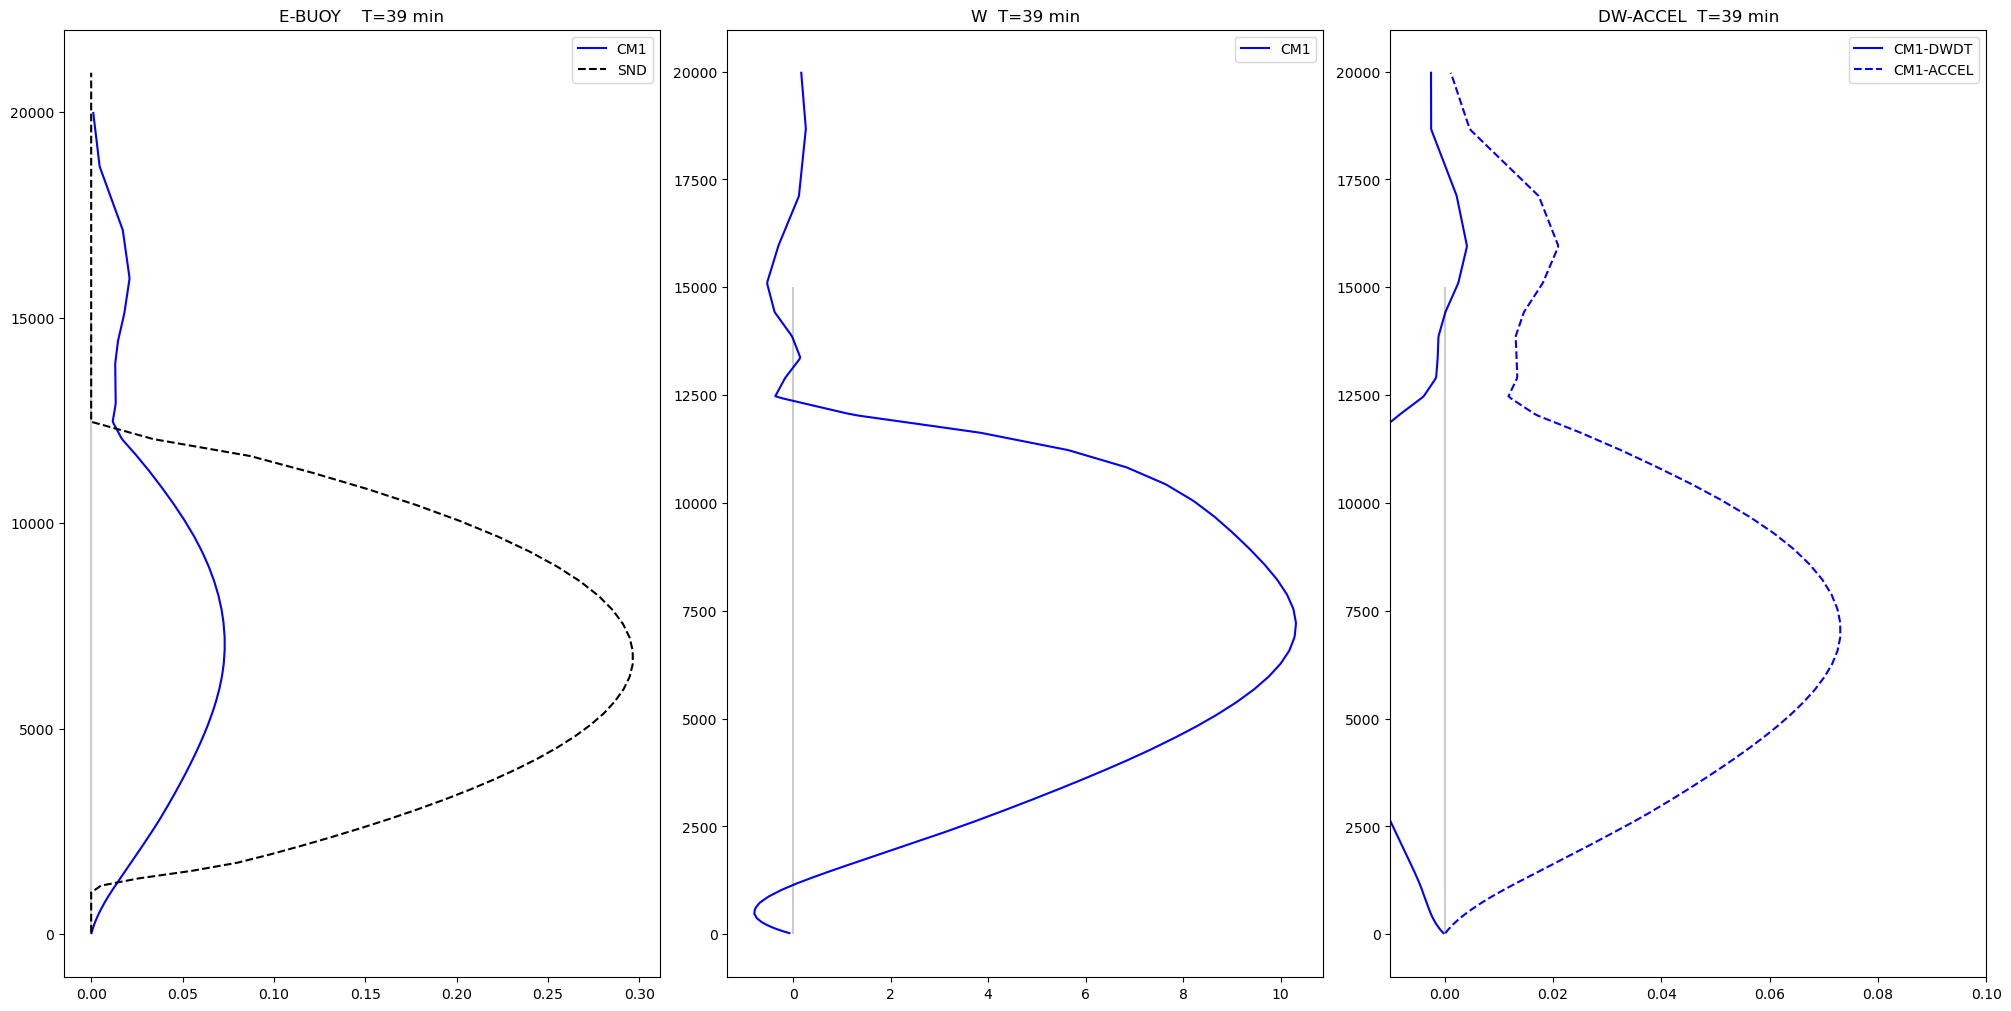

In [17]:
# compute acceleration

for tloc in 5+6*np.arange(20):

    tim = int(tloc/3)

    jlocm, jlocp = 31,31
    ilocm, ilocp = 31,31

    if jlocm == jlocp:
        cm1_beta  = cm2[0]['beta'][tloc+1,:,jlocm,ilocm]
        cm1_buoy  = cm2[0]['buoy'][tloc+1,:,jlocm,ilocm]
        cm1_w     = cm2[0]['w'][tloc+1,:,jlocm,ilocm]
        if tloc > 1:
            cm1_dwdt  = ( cm2[0]['w'][tloc+2,:,jlocm,ilocm] -  cm2[0]['w'][tloc+1,  :,jlocm,ilocm])/20.

    fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))

    nplot = 0
    ax[nplot].plot(cm1_beta, zlevels, color='b', label='CM1')
    ax[nplot].plot(buoy_data[:,2], buoy_data[:,0], color='k', linestyle='--', label='SND')
    ax[nplot].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    ax[nplot].set_title('E-BUOY    T=%d min'%(tim))

    nplot = 1
    ax[nplot].plot(cm1_w,  zlevels, color='b', label='CM1')
    ax[nplot].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
    ax[nplot].set_title('W  T=%d min'%(tim))

    if tloc > 1:
        nplot = 2
        ax[nplot].plot(cm1_dwdt,  zlevels, color='b', label='CM1-DWDT')
        ax[nplot].plot(cm1_beta,  zlevels, color='b', linestyle='--', label='CM1-ACCEL')
        ax[nplot].vlines(0.0, 0.0, 15000., color='k', alpha=0.2)
        ax[nplot].set_title('DW-ACCEL  T=%d min'%(tim))
        ax[nplot].set_xlim(-0.01,0.1)
    
    for item in ax.flatten():
        item.legend();

    #plt.savefig("plotcenter_%2.2d.png" % tloc)